In [31]:
import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('max_colwidth', 300)
df = pd.read_csv("./temp_data/entail/entail_SDG_1.csv", sep="\t")[['company','url']]
df[(df.company != "Jubilant Pharmova Ltd")&(df.company != "Pfizer Inc")&(df.company != "Grasim Industries Ltd")]
# [['company','url','statement','type','label']]

company  \
1                          Danone SA   
2                          Alcon Inc   
3                          Kroger Co   
4                     Morgan Stanley   
6   Raiffeisen Bank International AG   
8                American Express Co   
9                         Salmar ASA   
10          United Overseas Bank Ltd   

                                                                                                                                                                                                                                              url  
1                                                                                                                                                                            https://www.danone.com/impact/un-sustainable-developement-goals.html  
2                                                                                                                                             https://www.alcon.com/sites/g/files/rbvwei496/files/2020-07/Argyle_ESG_Report_FINAL-publication.pdf  
3                                                                                                                                                                                                     https://www.thekrogerco.com/sustainability/  
4                                                                                                                           https://www.morganstanley.com/content/dam/msdotcom/sustainability/Morgan-Stanley_2020-Sustainability-Report_Final.pdf  
6   https://www.rbinternational.com/en/sustainability/sustainability-report/_jcr_content/root/responsivegrid/tabaccordioncontaine/tabAccordionElements/tabaccordionelement_/items/downloadlist.download.html/0/Sustainability%20Report%202019.pdf  
8                                                                                                           https://www.americanexpress.com/content/dam/amex/au/about-us/corporate-social-responsibility/American-Express-CSR-Report-ANZ-2020.pdf  
9                                                                                                                                                            https://www.salmar.no/en/sustainability-and-social-responsibility-with-hse-in-focus/  
10                                                                                                                                                 https://www.uobgroup.com/investor-relations/sustainability/our-approach-to-sustainability.html

In [1]:
import pandas as pd
df = pd.read_csv("./wiki_data/wiki_graph_data_2hop.csv")
df

Unnamed: 0 property wikidata_id_start wikidata_id_end
0                0      P17          Q1614044             Q55
1                1     P131          Q1614044           Q9924
2                2      P31          Q1614044        Q1852859
3                3      P31          Q1614044         Q338313
4                4     P421          Q1614044           Q6655
...            ...      ...               ...             ...
180835       28607      P31          Q3674725         Q891723
180836       28608     P159          Q3674725           Q8646
180837       28609     P414          Q3674725         Q496672
180838       28610     P452          Q3674725          Q11469
180839       28611     P112          Q3674725       Q11098046

[180840 rows x 4 columns]

In [2]:
import grequests
import requests
class Test(object):
    def __init__(self, urls):
        self.urls = urls

    def exception(self, request, exception):
        print("Problem: {}: {}".format(request.url, exception))

    def async1(self):
        results = grequests.map((grequests.get(u) for u in self.urls), exception_handler=self.exception, size=200)
        # print(results)
        return results
    
from tqdm import tqdm
from tqdm.contrib import tzip
# tqdm.pandas()
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def flatten_data(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out

# get property name for wikidata relations
# from bs4 import BeautifulSoup
# "https://www.wikidata.org/w/api.php?action=wbgetentities&ids=P31&languages=en"
# tqdm.pandas()
def get_property_name(property_id):
    url = 'https://www.wikidata.org/w/api.php?action=wbgetentities&languages=en&format=json&ids={}'.format(property_id)
    req = requests.get(url)
    return req.json()["entities"][property_id]['labels']["en"]["value"]

queries = df["property"].values.tolist()
urls_list = []
for x in queries:
    urls_list.append('https://www.wikidata.org/w/api.php?action=wbgetentities&languages=en&format=json&ids={}'.format(x))
    
prop_names = []
for i in tqdm(list(chunks(range(0, len(urls_list)), 200))):
    urls = urls_list[i.start:i.stop]
    names = queries[i.start:i.stop]
    test = Test(urls)
    results = test.async1()
    for req, name in zip(results, names):
        if req != None:
            if req.status_code == 200:
                prop_names.append(req.json()["entities"][name]['labels']["en"]["value"])
                                
df["property_name"] = prop_names

100%|████████████████████████████████████████████████████████████████████████████████| 905/905 [57:07<00:00,  3.79s/it]
C:\Users\qhuca\anaconda3\envs\python3.7\lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [4]:
df.to_csv("./extra/property_name.csv")

In [2]:
import pandas as pd
df = pd.read_csv("./extra/property_name.csv")

In [3]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

<AxesSubplot:xlabel='relations', ylabel='count'>

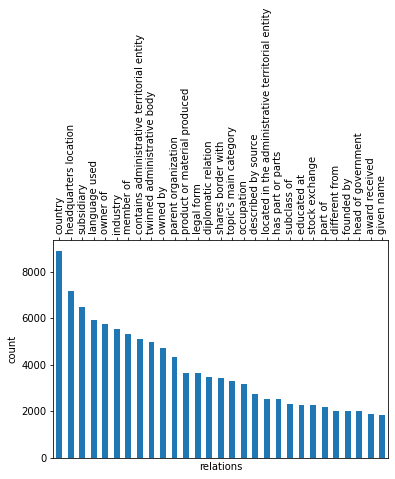

In [4]:
import matplotlib as plt
df['property_name'].value_counts().reset_index().iloc[1:30,:].rename(columns={"index":"relations"}).plot(kind="bar", x="relations",y="property_name",legend=False, ylabel="count")


# ax.xaxis.set_ticks_position('top') 

In [5]:
set(df["wikidata_id_start"].values.tolist() + df["wikidata_id_end"].values.tolist())
# ['property_name'].value_counts().reset_index()

{'Q2393592',
 'Q2003087',
 'Q701410',
 'Q2607880',
 'Q1434048',
 'Q16798217',
 'Q14018439',
 'Q46107',
 'Q6377671',
 'Q394733',
 'Q569714',
 'Q37017656',
 'Q851668',
 'Q846686',
 'Q7214526',
 'Q105763627',
 'Q1780',
 'Q1895183',
 'Q9227704',
 'Q180910',
 'Q7112800',
 'Q659651',
 'Q85389',
 'Q796927',
 'Q653884',
 'Q7978779',
 'Q223852',
 'Q105859935',
 'Q10650421',
 'Q549536',
 'Q125731',
 'Q1162751',
 'Q92648',
 'Q59491380',
 'Q2277744',
 'Q4732334',
 'Q220437',
 'Q575207',
 'Q5583854',
 'Q551401',
 'Q6712608',
 'Q948990',
 'Q2916896',
 'Q2076679',
 'Q79049177',
 'Q1604208',
 'Q998675',
 'Q7978385',
 'Q20021676',
 'Q16638812',
 'Q6812050',
 'Q14900498',
 'Q26882580',
 'Q1386924',
 'Q2944976',
 'Q1498800',
 'Q8503559',
 'Q11407404',
 'Q84969390',
 'Q5333756',
 'Q658270',
 'Q7112544',
 'Q23892969',
 'Q58623416',
 'Q495372',
 'Q15331623',
 'Q3485977',
 'Q63615569',
 'Q1114146',
 'Q232641',
 'Q497964',
 'Q18012233',
 'Q16825795',
 'Q1368318',
 'Q909510',
 'Q1155010',
 'Q3739',
 'Q2359812'

In [6]:

import networkx as nx
G=nx.from_pandas_edgelist(df, "wikidata_id_start", "wikidata_id_end")

In [ ]:
nx.info(G)

In [ ]:
nx.density(G)

In [54]:
# average degrees
sum_degrees = 0
for element in list(G.degree):
    sum_degrees += element[1]
sum_degrees/74840

4.302351683591662

In [177]:
data

degree  count
0         1  52475
1         2   5833
2         4   2318
3         3   2031
4         5   1594
..      ...    ...
195     134      1
196    1154      1
197     216      1
198     239      1
199     280      1

[200 rows x 2 columns]

<StemContainer object of 3 artists>

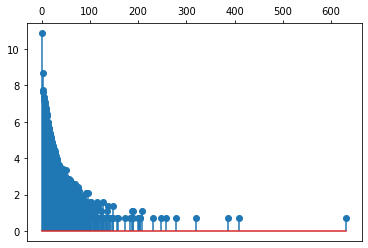

In [7]:
import collections
import matplotlib.pyplot as plt
degrees = [G.degree(n) for n in G.nodes()]
data = pd.Series(degrees).value_counts().reset_index()
data[0] = np.log(data[0])
data = data.rename(columns={"index":"degree",0:"count"}).iloc[0:200]
data = data[data["count"]!=0]
# import numpy as np
# import seaborn as sns

# sns.set_style('whitegrid')
# sns.barplot(x=data["degree"].tolist(),y=np.log(data["count"].tolist()))

# data.plot(kind="bar",x="degree", y="count", legend=False)
plt.stem(data["degree"],data['count'])
# ,xlabel="node degree",ylabel="log(node count)"

In [8]:
G = nx.convert_node_labels_to_integers(G)

In [ ]:
from tqdm import tqdm
shortest_path_dict = {}

for i in tqdm(range(74840)):
    for j in range(74840):
        i1 = i
        j1 = j
        if i == j:
            shortest_path_dict[(i1,j1)] = 10000
        if i != j and i < j:
            try:
                shortest_path_dict[(i1,j1)] = nx.shortest_path_length(G, source=i, target=j)
                shortest_path_dict[(j1,i1)] = shortest_path_dict[(i1,j1)]
            except:
                shortest_path_dict[(i1,j1)] = 10000
                shortest_path_dict[(j1,i1)] = 10000

  0%|                                                                             | 2/74840 [00:07<76:14:57,  3.67s/it]

In [9]:
degree_hist = nx.degree_histogram(G)

In [6]:
# degree_hist = [i for i in degree_hist if i != 0]

C:\Users\qhuca\anaconda3\envs\python3.7\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'degree')

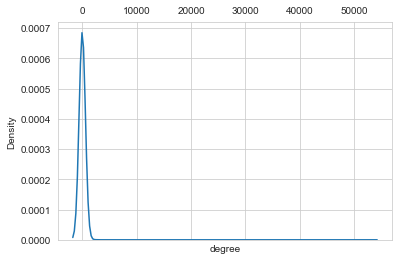

In [10]:
degree_hist = nx.degree_histogram(G)
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')
sns.kdeplot(np.array(degree_hist), bw=0.8)
plt.xlabel("degree", fontsize=10)

In [38]:
nx.average_clustering(G)

0.058726874452862794

In [69]:
# # Next, use nx.connected_components to get the list of components,
# # then use the max() command to find the largest one:
# components = nx.connected_components(G)
# largest_component = max(components, key=len)

# # Create a "subgraph" of just the largest component
# # Then calculate the diameter of the subgraph, just like you did with density.
# #

# subgraph = G.subgraph(largest_component)
# diameter = nx.diameter(subgraph)
# print("Network diameter of largest component:", diameter)

In [70]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.007418109278458922


In [66]:
# deg = G.degree()
# deg = dict(deg)
# deg = {key:val for key, val in deg.items() if val <= 1}
# G.remove_nodes_from(list(deg.keys()))

In [82]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 74840\nNumber of edges: 160994\nAverage degree:   4.3024'

In [79]:
# remove = [node for node,degree in dict(G.degree()).items() if degree == ]
# G.remove_nodes_from(remove)

In [11]:
import pandas as pd
df = pd.read_csv("./extra/property_name.csv")

In [12]:
df = df[df.property_name.isin(["product or material produced", "parent organization", "owner of", "owned by", "member of", "industry", "manufacturer"])]

In [13]:

import networkx as nx
G=nx.from_pandas_edgelist(df, "wikidata_id_start", "wikidata_id_end")

In [14]:
companies_wiki_id = pd.read_csv("./wiki_data/wikidata.csv").wikidata_id.dropna().values.tolist()

In [15]:
from tqdm import tqdm
shortest_path_dict = {}

for i in tqdm(companies_wiki_id):
    for j in companies_wiki_id:
        i1 = i
        j1 = j
        if i == j:
            shortest_path_dict[(i1,j1)] = 10000
        if i != j and ((i1,j1) not in shortest_path_dict) and ((j1,i1) not in shortest_path_dict):
            try:
                shortest_path_dict[(i1,j1)] = nx.shortest_path_length(G, source=i, target=j)
                shortest_path_dict[(j1,i1)] = 10000
            except:
                shortest_path_dict[(i1,j1)] = 10000
                shortest_path_dict[(j1,i1)] = 10000

100%|██████████████████████████████████████████████████████████████████████████████| 1852/1852 [01:13<00:00, 25.12it/s]


In [16]:
set(shortest_path_dict.values())

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 10000}

In [17]:
shortest_path_dict = {key:val for key, val in shortest_path_dict.items() if val <= 13}

In [18]:
from tqdm import tqdm
all_keys = []
for (key,value) in tqdm(shortest_path_dict.items()):
    all_keys.append(key[0])
    all_keys.append(key[1])
all_keys = list(set(all_keys))

100%|███████████████████████████████████████████████████████████████████| 1004657/1004657 [00:00<00:00, 3326820.13it/s]


In [19]:
all_keys_number = range(len(all_keys))
zip_iterator = zip(all_keys, all_keys_number)
a_dictionary = dict(zip_iterator)

In [20]:
b_dictionary = {v: k for k, v in a_dictionary.items()}

In [21]:
shortest_path_dict2 = {}
for (key,value) in shortest_path_dict.items():
    shortest_path_dict2[a_dictionary[key[0]],a_dictionary[key[1]]] = value

In [22]:
shortest_path_dict2

{(632, 762): 4,
 (632, 366): 8,
 (632, 466): 8,
 (632, 414): 6,
 (632, 1320): 7,
 (632, 289): 7,
 (632, 639): 6,
 (632, 357): 4,
 (632, 162): 7,
 (632, 1286): 4,
 (632, 288): 8,
 (632, 387): 7,
 (632, 1074): 6,
 (632, 591): 6,
 (632, 1332): 5,
 (632, 1065): 7,
 (632, 1168): 7,
 (632, 256): 6,
 (632, 595): 6,
 (632, 1413): 7,
 (632, 269): 4,
 (632, 804): 8,
 (632, 1116): 4,
 (632, 36): 6,
 (632, 991): 7,
 (632, 1262): 6,
 (632, 15): 7,
 (632, 1235): 7,
 (632, 977): 6,
 (632, 863): 6,
 (632, 249): 6,
 (632, 626): 4,
 (632, 629): 8,
 (632, 894): 7,
 (632, 635): 6,
 (632, 962): 6,
 (632, 514): 7,
 (632, 1062): 6,
 (632, 1303): 6,
 (632, 195): 7,
 (632, 590): 6,
 (632, 939): 6,
 (632, 1207): 6,
 (632, 284): 6,
 (632, 842): 6,
 (632, 1146): 7,
 (632, 50): 7,
 (632, 265): 8,
 (632, 1044): 7,
 (632, 846): 8,
 (632, 813): 4,
 (632, 1263): 7,
 (632, 1119): 6,
 (632, 1070): 7,
 (632, 1093): 7,
 (632, 1326): 5,
 (632, 119): 6,
 (632, 950): 6,
 (632, 627): 6,
 (632, 1060): 4,
 (632, 1001): 6,
 (632

In [23]:
def dict_to_matrix(the_dict: dict) -> list:
    # Number of rows and columns in the matrix
    nrows = max(key[0] for key in the_dict) + 1
    ncols = max(key[1] for key in the_dict) + 1

    # Initialize the matrix (can use `numpy.empty` here)
    the_matrix = [[None]*ncols for _ in range(nrows)]

    # Fill the matrix
    for (i, j), the_matrix[i][j] in the_dict.items():
        ...

    # Could also do this,
    # but the loop above is more fun, IMO
    # for (i, j), value in the_dict.items():
    #    the_matrix[i][j] = value

    return the_matrix

In [24]:
import numpy as np
D = dict_to_matrix(shortest_path_dict2)
D = np.asarray(D)
D

array([[None, None, None, ..., None, None, None],
       [4, None, 4, ..., 4, 3, 5],
       [4, None, None, ..., 2, 5, 6],
       ...,
       [5, None, None, ..., None, None, None],
       [5, None, None, ..., 5, None, 6],
       [5, None, None, ..., 6, None, None]], dtype=object)

In [25]:
D[D==None]=[10000]   

In [26]:
D

array([[10000, 10000, 10000, ..., 10000, 10000, 10000],
       [4, 10000, 4, ..., 4, 3, 5],
       [4, 10000, 10000, ..., 2, 5, 6],
       ...,
       [5, 10000, 10000, ..., 10000, 10000, 10000],
       [5, 10000, 10000, ..., 5, 10000, 6],
       [5, 10000, 10000, ..., 6, 10000, 10000]], dtype=object)

In [27]:
df_temp = pd.Series(D.flatten()).value_counts().reset_index().rename(columns = {"index":"distance",0:"count"})
df_temp

distance    count
0      10000  1028819
1          6   261146
2          4   239699
3          5   235029
4          7   113603
5          8    54839
6          3    39242
7          2    35714
8          9    19065
9         10     4820
10        11     1153
11         1      176
12        12      148
13        13       23

In [28]:
len(companies_wiki_id)

1852

In [29]:
df_temp = df_temp[df_temp.distance!=10000]
# .plot(kind="bar",x="distance",y="count")

In [30]:
df_temp['percentage'] = df_temp["count"] / df_temp["count"].sum()
df_temp

C:\Users\qhuca\anaconda3\envs\python3.7\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


distance   count  percentage
1          6  261146    0.259935
2          4  239699    0.238588
3          5  235029    0.233940
4          7  113603    0.113076
5          8   54839    0.054585
6          3   39242    0.039060
7          2   35714    0.035548
8          9   19065    0.018977
9         10    4820    0.004798
10        11    1153    0.001148
11         1     176    0.000175
12        12     148    0.000147
13        13      23    0.000023

In [31]:
# apply a threshold
D_adj = D < 3

In [32]:
1*D_adj

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components

graph = csr_matrix(1*D_adj)
n_components, labels = connected_components(csgraph=graph, directed=False, return_labels=True)

In [34]:
import networkx as nx
graph2 = nx.from_numpy_matrix(D_adj)

In [35]:
start_list = []
end_list = []
for element in list(graph2.edges()):
    start_list.append(b_dictionary[element[0]])
    end_list.append(b_dictionary[element[1]])

In [36]:
df_graph = pd.DataFrame()
df_graph["wikidata_id_start"] = start_list
df_graph["wikidata_id_end"] = end_list
df_graph

wikidata_id_start wikidata_id_end
0              Q4022370         Q663679
1              Q4022370        Q7039614
2              Q4022370        Q1544339
3              Q4022370        Q1579151
4              Q4022370         Q585314
...                 ...             ...
35885          Q4854122         Q909613
35886          Q3425637         Q193326
35887           Q193326         Q806653
35888           Q193326         Q909613
35889           Q806653         Q909613

[35890 rows x 2 columns]

In [37]:
df_graph.to_csv("./wiki_data/wiki_graph_data_2hop_cleaned.csv")

In [38]:
df_wiki_node = pd.DataFrame()
df_wiki_node["wikidata_id"] = list(set(df_graph.wikidata_id_start.values.tolist()+df_graph.wikidata_id_end.values.tolist()))
df_wiki_node

wikidata_id
0       Q4022370
1       Q2852426
2       Q2423252
3        Q274591
4        Q200687
...          ...
1356      Q73251
1357    Q6818611
1358     Q909613
1359     Q752084
1360    Q7433758

[1361 rows x 1 columns]

In [40]:
b_dictionary

{0: 'Q55595435',
 1: 'Q30693638',
 2: 'Q4763422',
 3: 'Q16545085',
 4: 'Q65091423',
 5: 'Q3313471',
 6: 'Q7504181',
 7: 'Q662174',
 8: 'Q942471',
 9: 'Q1964784',
 10: 'Q543449',
 11: 'Q1793182',
 12: 'Q1993312',
 13: 'Q1053422',
 14: 'Q92639564',
 15: 'Q73251',
 16: 'Q1141173',
 17: 'Q16966841',
 18: 'Q1665653',
 19: 'Q292292',
 20: 'Q2414097',
 21: 'Q3146728',
 22: 'Q16958009',
 23: 'Q1581562',
 24: 'Q1264404',
 25: 'Q1322011',
 26: 'Q1604631',
 27: 'Q63035278',
 28: 'Q1858144',
 29: 'Q630125',
 30: 'Q806653',
 31: 'Q667865',
 32: 'Q632240',
 33: 'Q2006989',
 34: 'Q1359568',
 35: 'Q11463',
 36: 'Q609466',
 37: 'Q1274362',
 38: 'Q2990393',
 39: 'Q19661172',
 40: 'Q1551220',
 41: 'Q5950695',
 42: 'Q5842736',
 43: 'Q1351484',
 44: 'Q4922539',
 45: 'Q4039380',
 46: 'Q1135278',
 47: 'Q732670',
 48: 'Q902650',
 49: 'Q666703',
 50: 'Q672230',
 51: 'Q1272525',
 52: 'Q909856',
 53: 'Q11464265',
 54: 'Q9401',
 55: 'Q1584297',
 56: 'Q25103691',
 57: 'Q18674747',
 58: 'Q462984',
 59: 'Q16975567',

In [29]:
n_components

78

In [39]:
G2 = nx.from_numpy_matrix(D_adj)

In [40]:
nx.info(G2)

'Graph with 1426 nodes and 35890 edges'

In [249]:
nx.density(G2)

0.035323933958317955

In [250]:
triadic_closure = nx.transitivity(G2)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.6883678243647476


In [251]:
nx.average_clustering(G2)

0.735385954659995

C:\Users\qhuca\anaconda3\envs\python3.7\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'degree')

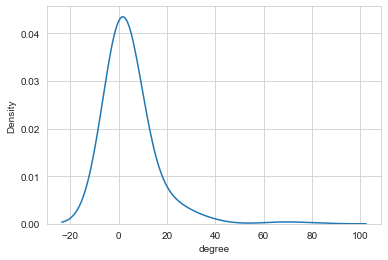

In [253]:
degree_hist = nx.degree_histogram(G2)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.kdeplot(np.array(degree_hist), bw=0.8)
plt.xlabel("degree", fontsize=10)

In [42]:
data

degree     count
0        0  4.727388
1        1  4.007333
2        2  3.583519
3        3  2.708050
4        4  2.639057
5        7  2.302585
6        5  2.197225
7        6  1.791759
8       15  1.386294
9       23  1.098612
10       8  1.098612
11      11  1.098612
12      24  1.098612
13      20  1.098612
14       9  1.098612
15      19  0.693147
16      14  0.693147
17      18  0.693147

<StemContainer object of 3 artists>

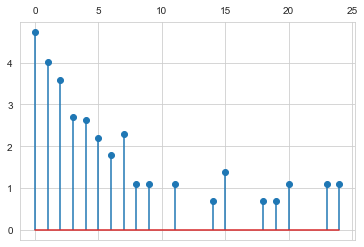

In [44]:
import collections
import matplotlib.pyplot as plt
degrees = nx.degree_histogram(G2)
data = pd.Series(degrees).value_counts().reset_index()
data[0] = np.log(data[0])
data = data.rename(columns={"index":"degree",0:"count"}).iloc[0:200]
data = data[data["count"]!=0]
# import numpy as np
# import seaborn as sns

# sns.set_style('whitegrid')
# sns.barplot(x=data["degree"].tolist(),y=np.log(data["count"].tolist()))

# data.plot(kind="bar",x="degree", y="count", legend=False)
plt.stem(data["degree"],data['count'])
# ,xlabel="node degree",ylabel="log(node count)"

<AxesSubplot:xlabel='relations', ylabel='count'>

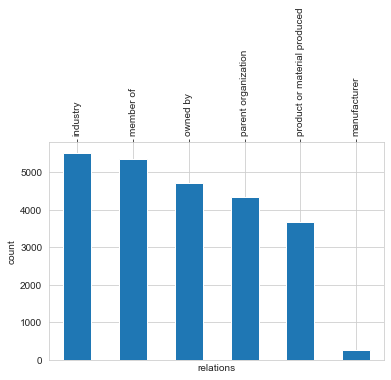

In [256]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
df['property_name'].value_counts().reset_index().iloc[1:30,:].rename(columns={"index":"relations"}).plot(kind="bar", x="relations",y="property_name",legend=False, ylabel="count")


In [58]:
import matplotlib as plt
properties_list = df['property_name'].value_counts().reset_index()["index"].values.tolist()
# .iloc[1:30,:]
# .rename(columns={"index":"relations"}).plot(kind="bar", x="relations",y="property_name",legend=False, ylabel="count")
# zero shot


In [56]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

In [97]:
sequence_to_classify = "company's ownership or supply chain activities"
candidate_labels = properties_list[0:100]
ranked = classifier(sequence_to_classify, candidate_labels)["labels"]

In [103]:
properties_list

['instance of',
 'country',
 'headquarters location',
 'subsidiary',
 'language used',
 'owner of',
 'industry',
 'member of',
 'contains administrative territorial entity',
 'twinned administrative body',
 'owned by',
 'parent organization',
 'product or material produced',
 'legal form',
 'diplomatic relation',
 'shares border with',
 "topic's main category",
 'occupation',
 'described by source',
 'located in the administrative territorial entity',
 'has part or parts',
 'subclass of',
 'educated at',
 'stock exchange',
 'part of',
 'different from',
 'founded by',
 'head of government',
 'award received',
 'given name',
 'sex or gender',
 'country of citizenship',
 'replaces',
 'located in time zone',
 'place of birth',
 'family name',
 'capital of',
 'location of formation',
 'chief executive officer',
 'located in or next to body of water',
 'board member',
 'employer',
 'languages spoken, written or signed',
 'category of associated people',
 'follows',
 'category for people bor

In [1]:
candidate_labels = ['ownership', '']
properties_relevant = []
for element in tqdm(properties_list):
    properties_relevant.append(classifier(element, candidate_labels)["labels"][0])

In [63]:
temp = pd.DataFrame()
temp["property"] = properties_list
temp["label"] = properties_relevant
temp[temp.label == "it is related to supply chain"]

property                          label
0                  instance of  it is related to supply chain
2        headquarters location  it is related to supply chain
3                   subsidiary  it is related to supply chain
4                language used  it is related to supply chain
5                     owner of  it is related to supply chain
..                         ...                            ...
599  NZTCS conservation status  it is related to supply chain
601                  presenter  it is related to supply chain
604               inhibitor of  it is related to supply chain
605            stereoisomer of  it is related to supply chain
607             offers view on  it is related to supply chain

[434 rows x 2 columns]

In [1]:
# sustainbility reports
import pandas as pd
df = pd.read_csv("./temp_data/entail/entail_SDG_13.csv", sep="\t", index_col=0)

In [2]:
df.statement.values[0]

'Reducing carbon footprint As Australias leading waste management and recycling company, we continue to take action on climate change by reducing our greenhouse gas emissions, by the responsible management of our landfill gas, and by assisting our customers and the community in managing their waste impacts'

In [2]:
# import torch
# from transformers import BertForQuestionAnswering
# from transformers import BertTokenizer

# #Model
# model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

# #Tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad', truncation = True)

# from tqdm import tqdm
# tqdm.pandas()
# def summarize_help(x):
#     question = '''what action does the company take?"'''
#     paragraph = x[0:512]  
#     encoding = tokenizer.encode_plus(text=question,text_pair=paragraph, add_special=True)
#     inputs = encoding['input_ids']  #Token embeddings
#     sentence_embedding = encoding['token_type_ids']  #Segment embeddings
#     tokens = tokenizer.convert_ids_to_tokens(inputs) #input tokens
    
#     mymodel = model(input_ids=torch.tensor([inputs]), token_type_ids=torch.tensor([sentence_embedding]))
#     start_scores = mymodel['start_logits']
#     end_scores = mymodel['end_logits']
    
#     start_index = torch.argmax(start_scores)

#     end_index = torch.argmax(end_scores)

#     answer = ' '.join(tokens[start_index:end_index+1])
    
#     corrected_answer = ''

#     for word in answer.split():

#         #If it's a subword token
#         if word[0:2] == '##':
#             corrected_answer += word[2:]
#         else:
#             corrected_answer += ' ' + word
            
#     return corrected_answer

# df["summarize_statement"] = df["statement"].progress_apply(summarize_help)


In [10]:
# df.to_csv("temp.csv")

In [94]:
import pandas as pd
count_companies = []
for i in range(1,18):
    count_companies.append(len(pd.read_csv("./temp_data/entail/entail_SDG_{}.csv".format(i), sep="\t", index_col=0).company.unique()))

<AxesSubplot:xlabel='17 SDGs', ylabel='number of companies'>

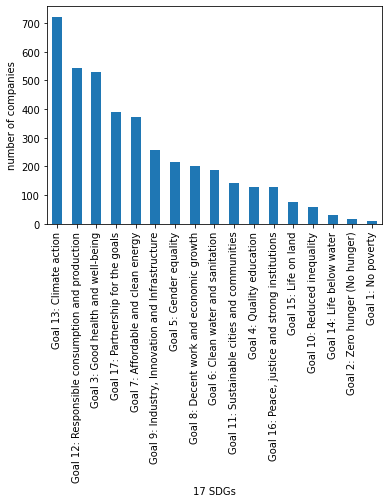

In [103]:
df_temp = pd.DataFrame()
df_temp["number of companies"] = count_companies
df_temp["17 SDGs"] = ["Goal 1: No poverty","Goal 2: Zero hunger (No hunger)","Goal 3: Good health and well-being", "Goal 4: Quality education", "Goal 5: Gender equality", "Goal 6: Clean water and sanitation", "Goal 7: Affordable and clean energy", "Goal 8: Decent work and economic growth", "Goal 9: Industry, Innovation and Infrastructure", "Goal 10: Reduced inequality", "Goal 11: Sustainable cities and communities", "Goal 12: Responsible consumption and production", "Goal 13: Climate action", "Goal 14: Life below water", "Goal 15: Life on land", "Goal 16: Peace, justice and strong institutions", "Goal 17: Partnership for the goals"]
df_temp.sort_values("number of companies", ascending=False).plot(kind="bar",x="17 SDGs", y="number of companies", ylabel="number of companies", legend=False)

In [31]:
import pandas as pd 
df = pd.read_csv("temp.csv")
# sustainbility reports


In [ ]:

# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.dropna().statement:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [92]:
# df.dropna().sort_values(by="summarize_statement", key=lambda x: x.str.len())
df.dropna()[["company","type","summarize_statement"]].iloc[0:50].sort_values(by="summarize_statement", key=lambda x: x.str.len(), ascending=False).iloc[0:20]
# .to_csv("./extra/sus_sdg13_evidence_sample.csv")

company    type  \
20                         Jubilant Pharmova Ltd     web   
10  Cie Generale des Etablissements Michelin SCA  report   
0                 Cleanaway Waste Management Ltd     web   
22                            Honda Motor Co Ltd  report   
14                                  Prologis Inc  report   
47                                      Aegon NV  report   
40                                 Hydro One Ltd  report   
12                   Reckitt Benckiser Group PLC  report   
42                          Saudi Electricity Co  report   
39                                Morgan Stanley  report   
43                              CLP Holdings Ltd     web   
1               Singapore Telecommunications Ltd  report   
23                    Great Portland Estates PLC     web   
13                               McDonald's Corp  report   
17                                       SSE PLC  report   
15                    CF Industries Holdings Inc  report   
25                         ON Semiconductor Corp     web   
16                                       NEL ASA  report   
35                                       NEL ASA     web   
5                                    Swiss Re AG  report   

                                                                                                                                                                                                                               summarize_statement  
20   we reduced specific ghg emissions from our facilities year on year , by continuously working on reduction in energy consumption , waste generation , increase in renewable energy share and enhancing the carbon sinks by planting more trees  
10         taking action both downstream from its operations to ght climate change , conserve natural protect objectives for 2050 to make all the production plants , supply chain operations and raw material and component inputs carbon neutral  
0                                                                  by reducing our greenhouse gas emissions , by the responsible management of our landfill gas , and by assisting our customers and the community in managing their waste impacts  
22                                                                          honda in the asia oceania region tackles its mission in the region of climate change and energy have established our internal voluntary co2 emission reduction targets  
14                                                                                        measuring our impact , reducing emissions wherever possible and investing in new technologies and offsets for emissions that , today , cannot be avoided  
47                                                                                                      aegon endorses the reports drafted by the international panel on climate change and supports the objectives of the paris climate agreement  
40                                                                                                                     takes into account the risks of climate change through our plan , design and build a grid for the future strategic priority  
12                                                                                                                     our business strategy sees the macro - trend of climate change as a key factor influencing both our development and society  
42                                                                                                                      diversifying the electricity generation and fuel mix into a cleaner portfolio consistent with the national energy strategy  
39                                                                                                                         our climate strategy encompasses our products and solutions , governance and risk management , operations and reporting  
43                                                                                   

In [5]:
import scattertext as st
import spacy
from pprint import pprint
nlp = spacy.load("en_core_web_sm")
corpus = st.CorpusFromPandas(df, category_col='company', text_col='statement',nlp=nlp).build()


In [7]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df

Cleanaway Waste Management Ltd freq  \
term                                                       
reducing                                               2   
carbon                                                 2   
footprint                                              1   
as                                                     1   
australias                                             1   
...                                                  ...   
gases electricity                                      0   
electricity grid                                       0   
grid transmission                                      0   
distribution losses                                    0   
losses employee                                        0   

                     Singapore Telecommunications Ltd freq  \
term                                                         
reducing                                                 0   
carbon                                                  18   
footprint                                                4   
as                                                       3   
australias                                               0   
...                                                    ...   
gases electricity                                        0   
electricity grid                                         0   
grid transmission                                        0   
distribution losses                                      0   
losses employee                                          0   

                     GlaxoSmithKline PLC freq  Mapfre SA freq  \
term                                                            
reducing                                    0               3   
carbon                                      7               2   
footprint                                   0               1   
as                                          5               2   
australias                                  0               0   
...                                       ...             ...   
gases electricity                           0               0   
electricity grid                            0               0   
grid transmission                           0               0   
distribution losses                         0               0   
losses employee                             0               0   

                     Carrefour SA freq  Swiss Re AG freq  \
term                                                       
reducing                             2                 2   
carbon                               0                 6   
footprint                            0                 0   
as                                   1                 5   
australias                           0                 0   
...                                ...               ...   
gases electricity                    0                 0   
electricity grid                     0                 0   
grid transmission                    0                 0   
distribution losses                  0                 0   
losses employee                      0                 0   

                     NextEra Energy Inc freq  Solvay SA freq  \
term                                                           
reducing                                   2               0   
carbon                                     2               1   
footprint                                  0               1   
as                                         6               0   
australias                                 0               0   
...                                      ...             ...   
gases electricity                          0               0   
electricity grid                           0               0   
grid transmission                          0               0   
distribution losses                        0               0   
losses employee                       

In [11]:
term_freq_df['Morgan Stanley Score'] = corpus.get_scaled_f_scores('Morgan Stanley')
term_freq_df['Cleanaway Waste Management Ltd Score'] = corpus.get_scaled_f_scores('Cleanaway Waste Management Ltd')
# pprint(list(term_freq_df.sort_values(by='Morgan Stanley Score', ascending=False).index[:10]))

In [13]:
html = st.produce_scattertext_explorer(corpus,
                                       category='Morgan Stanley',
                                       category_name='Morgan Stanley',
                                       not_category_name='Cleanaway Waste Management Ltd',
                                       width_in_pixels=1000,
                                       metadata=df['statement'])
open("./extra/text_comparison/Convention-Visualization.html", 'wb').write(html.encode('utf-8'))

4751591

In [106]:
df["merged_text"] = df[['company','statement']].groupby(['company'])['statement'].transform(lambda x: ','.join(x))

In [108]:
df_differentiate = df[['company','merged_text']].drop_duplicates()

In [110]:
df_differentiate.company.values.tolist()

['Cleanaway Waste Management Ltd',
 'Singapore Telecommunications Ltd',
 'GlaxoSmithKline PLC',
 'Mapfre SA',
 'Carrefour SA',
 'Swiss Re AG',
 'NextEra Energy Inc',
 'Solvay SA',
 'Crown Holdings Inc',
 'Enagas SA',
 'Cie Generale des Etablissements Michelin SCA',
 'Reckitt Benckiser Group PLC',
 "McDonald's Corp",
 'Prologis Inc',
 'CF Industries Holdings Inc',
 'NEL ASA',
 'SSE PLC',
 'Catalent Inc',
 'Elia Group SA/NV',
 'Jubilant Pharmova Ltd',
 'Stora Enso Oyj',
 'Honda Motor Co Ltd',
 'Great Portland Estates PLC',
 'AstraZeneca PLC',
 'ON Semiconductor Corp',
 'Tenaga Nasional Bhd',
 'Church & Dwight Co Inc',
 'Enel Chile SA',
 'Fiserv Inc',
 'Signify NV',
 'Neste Oyj',
 'SCOR SE',
 'PVH Corp',
 'Morgan Stanley',
 'Hydro One Ltd',
 'Westpac Banking Corp',
 'Saudi Electricity Co',
 'CLP Holdings Ltd',
 'Sasol Ltd',
 'Goodman Group',
 'LyondellBasell Industries NV',
 'Aegon NV',
 'PetroChina Co Ltd',
 'Xinjiang Goldwind Science & Technology Co Ltd',
 'KION Group AG',
 'Medtronic P

In [112]:
import spacy
from scattertext import SampleCorpora, PhraseMachinePhrases, dense_rank, RankDifference, AssociationCompactor, produce_scattertext_explorer
from scattertext.CorpusFromPandas import CorpusFromPandas

corpus = (CorpusFromPandas(df_differentiate,
                           category_col='company',
                           text_col='merged_text',
                           feats_from_spacy_doc=PhraseMachinePhrases(),
                           nlp=nlp)
          .build().compact(AssociationCompactor(4000)))

html = produce_scattertext_explorer(corpus,
                                    category='PetroChina Co Ltd',
                                    category_name='PetroChina Co Ltd',
                                    not_category_name='Petronet LNG Ltd',
                                    minimum_term_frequency=0,
                                    pmi_threshold_coefficient=0,
                                    transform=dense_rank,
                                    metadata=corpus.get_df()['merged_text'],
                                    term_scorer=RankDifference(),
                                    width_in_pixels=1000)
open("./extra/text_comparison/Convention-Visualization.html", 'wb').write(html.encode('utf-8'))

C:\Users\qhuca\anaconda3\envs\python3.7\lib\site-packages\scattertext\termscoring\ScaledFScore.py:130: RuntimeWarning: invalid value encountered in true_divide
  recall = cat_word_counts * 1. / cat_word_counts.sum()
C:\Users\qhuca\anaconda3\envs\python3.7\lib\site-packages\scipy\stats\_distn_infrastructure.py:1953: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\qhuca\anaconda3\envs\python3.7\lib\site-packages\scattertext\termscoring\ScaledFScore.py:296: RuntimeWarning: invalid value encountered in true_divide
  recall = cat_word_counts * 1. / cat_word_counts.sum()


4561827

In [108]:
import pandas as pd
SDG12 = pd.DataFrame()
SDG12["report"] = pd.read_csv("./temp_data/entail/entail_SDG_12.csv", sep="\t", index_col=0).statement.values
SDG12["category"] = "SDG12:Responsible Consumption and Production"

SDG13 = pd.DataFrame()
SDG13["report"] = pd.read_csv("./temp_data/entail/entail_SDG_13.csv", sep="\t", index_col=0).statement.values
SDG13["category"] = "SDG13:Climate Action"

In [109]:
df = pd.concat([SDG12,SDG13])

In [110]:
import scattertext as st
import spacy
from pprint import pprint
nlp = spacy.load("en_core_web_sm")
corpus = st.CorpusFromPandas(df, category_col='category', text_col='report',nlp=nlp).build()


In [111]:
import spacy
from scattertext import SampleCorpora, PhraseMachinePhrases, dense_rank, RankDifference, AssociationCompactor, produce_scattertext_explorer
from scattertext.CorpusFromPandas import CorpusFromPandas

corpus = (CorpusFromPandas(df,
                           category_col='category',
                           text_col='report',
                           feats_from_spacy_doc=PhraseMachinePhrases(),
                           nlp=nlp)
          .build().compact(AssociationCompactor(4000)))



In [124]:
html = produce_scattertext_explorer(corpus,
                                    category='SDG12:Responsible Consumption and Production',
                                    category_name='SDG12:Responsible Consumption and Production',
                                    not_category_name='SDG13:Climate Action',
                                    minimum_term_frequency=15,
                                    pmi_threshold_coefficient=0,
                                    transform=dense_rank,
                                    metadata=corpus.get_df()['report'],
                                    term_scorer=RankDifference(),
                                    width_in_pixels=1250,
                                    enable_term_category_description=False,
                                    show_cross_axes=True,
                                    jitter=0.5,
                                    top_terms_left_buffer=10)
open("./extra/text_comparison/Convention-Visualization.html", 'wb').write(html.encode('utf-8'))

C:\Users\qhuca\anaconda3\envs\python3.7\lib\site-packages\scattertext\termscoring\ScaledFScore.py:296: RuntimeWarning: invalid value encountered in true_divide
  recall = cat_word_counts * 1. / cat_word_counts.sum()


5147511

In [52]:
import pandas as pd
SDG12 = pd.DataFrame()
SDG12["report"] = pd.read_csv("./temp_data/entail/entail_SDG_3.csv", sep="\t", index_col=0).statement.values
SDG12["category"] = "SDG3:Good Health and Well-being"

SDG13 = pd.DataFrame()
SDG13["report"] = pd.read_csv("./temp_data/entail/entail_SDG_13.csv", sep="\t", index_col=0).statement.values
SDG13["category"] = "SDG13:Climate Action"

df = pd.concat([SDG12,SDG13])

import scattertext as st
import spacy
from pprint import pprint
nlp = spacy.load("en_core_web_sm")
corpus = st.CorpusFromPandas(df, category_col='category', text_col='report',nlp=nlp).build()

import spacy
from scattertext import SampleCorpora, PhraseMachinePhrases, dense_rank, RankDifference, AssociationCompactor, produce_scattertext_explorer
from scattertext.CorpusFromPandas import CorpusFromPandas

corpus = (CorpusFromPandas(df,
                           category_col='category',
                           text_col='report',
                           feats_from_spacy_doc=PhraseMachinePhrases(),
                           nlp=nlp)
          .build().compact(AssociationCompactor(4000)))

html = produce_scattertext_explorer(corpus,
                                    category='SDG3:Good Health and Well-being',
                                    category_name='SDG3:Good Health and Well-being',
                                    not_category_name='SDG13:Climate Action',
                                    minimum_term_frequency=5,
                                    pmi_threshold_coefficient=0,
                                    transform=dense_rank,
                                    metadata=corpus.get_df()['report'],
                                    term_scorer=RankDifference(),
                                    width_in_pixels=1550,
                                    enable_term_category_description=False,
                                    show_cross_axes=True)
open("./extra/text_comparison/Convention-Visualization2.html", 'wb').write(html.encode('utf-8'))

C:\Users\qhuca\anaconda3\envs\python3.7\lib\site-packages\scattertext\termscoring\ScaledFScore.py:296: RuntimeWarning: invalid value encountered in true_divide
  recall = cat_word_counts * 1. / cat_word_counts.sum()


5083785

In [54]:
import pandas as pd
SDG12 = pd.DataFrame()
SDG12["report"] = pd.read_csv("./temp_data/entail/entail_SDG_17.csv", sep="\t", index_col=0).statement.values
SDG12["category"] = "SDG17:Partnerships for the Goals"

SDG13 = pd.DataFrame()
SDG13["report"] = pd.read_csv("./temp_data/entail/entail_SDG_13.csv", sep="\t", index_col=0).statement.values
SDG13["category"] = "SDG13:Climate Action"

df = pd.concat([SDG12,SDG13])

import scattertext as st
import spacy
from pprint import pprint
nlp = spacy.load("en_core_web_sm")
corpus = st.CorpusFromPandas(df, category_col='category', text_col='report',nlp=nlp).build()

import spacy
from scattertext import SampleCorpora, PhraseMachinePhrases, dense_rank, RankDifference, AssociationCompactor, produce_scattertext_explorer
from scattertext.CorpusFromPandas import CorpusFromPandas

corpus = (CorpusFromPandas(df,
                           category_col='category',
                           text_col='report',
                           feats_from_spacy_doc=PhraseMachinePhrases(),
                           nlp=nlp)
          .build().compact(AssociationCompactor(4000)))

html = produce_scattertext_explorer(corpus,
                                    category='SDG17:Partnerships for the Goals',
                                    category_name='SDG17:Partnerships for the Goals',
                                    not_category_name='SDG13:Climate Action',
                                    minimum_term_frequency=5,
                                    pmi_threshold_coefficient=0,
                                    transform=dense_rank,
                                    metadata=corpus.get_df()['report'],
                                    term_scorer=RankDifference(),
                                    width_in_pixels=1550,
                                    enable_term_category_description=False,
                                    show_cross_axes=True)
open("./extra/text_comparison/Convention-Visualization3.html", 'wb').write(html.encode('utf-8'))

C:\Users\qhuca\anaconda3\envs\python3.7\lib\site-packages\scattertext\termscoring\ScaledFScore.py:296: RuntimeWarning: invalid value encountered in true_divide
  recall = cat_word_counts * 1. / cat_word_counts.sum()


4562856

In [ ]:
import pandas as pd
SDG12 = pd.DataFrame()
SDG12["report"] = pd.read_csv("./temp_data/entail/entail_SDG_17.csv", sep="\t", index_col=0).statement.values
SDG12["category"] = "SDG17:Partnerships for the Goals"

SDG13 = pd.DataFrame()
SDG13["report"] = pd.read_csv("./temp_data/entail/entail_SDG_13.csv", sep="\t", index_col=0).statement.values
SDG13["category"] = "SDG13:Climate Action"

df = pd.concat([SDG12,SDG13])

import scattertext as st
import spacy
from pprint import pprint
nlp = spacy.load("en_core_web_sm")
corpus = st.CorpusFromPandas(df, category_col='category', text_col='report',nlp=nlp).build()

import spacy
from scattertext import SampleCorpora, PhraseMachinePhrases, dense_rank, RankDifference, AssociationCompactor, produce_scattertext_explorer
from scattertext.CorpusFromPandas import CorpusFromPandas

corpus = (CorpusFromPandas(df,
                           category_col='category',
                           text_col='report',
                           feats_from_spacy_doc=PhraseMachinePhrases(),
                           nlp=nlp)
          .build().compact(AssociationCompactor(4000)))

html = produce_scattertext_explorer(corpus,
                                    category='SDG17:Partnerships for the Goals',
                                    category_name='SDG17:Partnerships for the Goals',
                                    not_category_name='SDG13:Climate Action',
                                    minimum_term_frequency=5,
                                    pmi_threshold_coefficient=0,
                                    transform=dense_rank,
                                    metadata=corpus.get_df()['report'],
                                    term_scorer=RankDifference(),
                                    width_in_pixels=1550,
                                    enable_term_category_description=False,
                                    show_cross_axes=True)
open("./extra/text_comparison/Convention-Visualization3.html", 'wb').write(html.encode('utf-8'))

In [57]:
import pandas as pd
SDG12 = pd.DataFrame()
SDG12["report"] = pd.read_csv("./temp_data/entail/entail_SDG_7.csv", sep="\t", index_col=0).statement.values
SDG12["category"] = "SDG7:Affordable and Clean Energy"

SDG13 = pd.DataFrame()
SDG13["report"] = pd.read_csv("./temp_data/entail/entail_SDG_13.csv", sep="\t", index_col=0).statement.values
SDG13["category"] = "SDG13:Climate Action"

df = pd.concat([SDG12,SDG13])

import scattertext as st
import spacy
from pprint import pprint
nlp = spacy.load("en_core_web_sm")
corpus = st.CorpusFromPandas(df, category_col='category', text_col='report',nlp=nlp).build()

import spacy
from scattertext import SampleCorpora, PhraseMachinePhrases, dense_rank, RankDifference, AssociationCompactor, produce_scattertext_explorer
from scattertext.CorpusFromPandas import CorpusFromPandas

corpus = (CorpusFromPandas(df,
                           category_col='category',
                           text_col='report',
                           feats_from_spacy_doc=PhraseMachinePhrases(),
                           nlp=nlp)
          .build().compact(AssociationCompactor(4000)))

html = produce_scattertext_explorer(corpus,
                                    category='SDG7:Affordable and Clean Energy',
                                    category_name='SDG7:Affordable and Clean Energy',
                                    not_category_name='SDG13:Climate Action',
                                    minimum_term_frequency=5,
                                    pmi_threshold_coefficient=0,
                                    transform=dense_rank,
                                    metadata=corpus.get_df()['report'],
                                    term_scorer=RankDifference(),
                                    width_in_pixels=1550,
                                    enable_term_category_description=False,
                                    show_cross_axes=True)
open("./extra/text_comparison/Convention-Visualization4.html", 'wb').write(html.encode('utf-8'))

C:\Users\qhuca\anaconda3\envs\python3.7\lib\site-packages\scattertext\termscoring\ScaledFScore.py:296: RuntimeWarning: invalid value encountered in true_divide
  recall = cat_word_counts * 1. / cat_word_counts.sum()


4639665

In [58]:
import pandas as pd
SDG12 = pd.DataFrame()
SDG12["report"] = pd.read_csv("./temp_data/entail/entail_SDG_9.csv", sep="\t", index_col=0).statement.values
SDG12["category"] = "SDG9:Industry, Innovation and Infrastructure"

SDG13 = pd.DataFrame()
SDG13["report"] = pd.read_csv("./temp_data/entail/entail_SDG_13.csv", sep="\t", index_col=0).statement.values
SDG13["category"] = "SDG13:Climate Action"

df = pd.concat([SDG12,SDG13])

import scattertext as st
import spacy
from pprint import pprint
nlp = spacy.load("en_core_web_sm")
corpus = st.CorpusFromPandas(df, category_col='category', text_col='report',nlp=nlp).build()

import spacy
from scattertext import SampleCorpora, PhraseMachinePhrases, dense_rank, RankDifference, AssociationCompactor, produce_scattertext_explorer
from scattertext.CorpusFromPandas import CorpusFromPandas

corpus = (CorpusFromPandas(df,
                           category_col='category',
                           text_col='report',
                           feats_from_spacy_doc=PhraseMachinePhrases(),
                           nlp=nlp)
          .build().compact(AssociationCompactor(4000)))

html = produce_scattertext_explorer(corpus,
                                    category='SDG9:Industry, Innovation and Infrastructure',
                                    category_name='SDG9:Industry, Innovation and Infrastructure',
                                    not_category_name='SDG13:Climate Action',
                                    minimum_term_frequency=5,
                                    pmi_threshold_coefficient=0,
                                    transform=dense_rank,
                                    metadata=corpus.get_df()['report'],
                                    term_scorer=RankDifference(),
                                    width_in_pixels=1550,
                                    enable_term_category_description=False,
                                    show_cross_axes=Truegray_zero_scores = True)
open("./extra/text_comparison/Convention-Visualization5.html", 'wb').write(html.encode('utf-8'))

C:\Users\qhuca\anaconda3\envs\python3.7\lib\site-packages\scattertext\termscoring\ScaledFScore.py:296: RuntimeWarning: invalid value encountered in true_divide
  recall = cat_word_counts * 1. / cat_word_counts.sum()


4246476

In [125]:
import pandas as pd
SDG12 = pd.DataFrame()
SDG12["report"] = pd.read_csv("./temp_data/entail/entail_SDG_9.csv", sep="\t", index_col=0).statement.values
SDG12["report"] = SDG12["report"].str.replace('\d+', '')
SDG12["category"] = "SDG9:Industry, Innovation and Infrastructure"

SDG13 = pd.DataFrame()
SDG13["report"] = pd.read_csv("./temp_data/entail/entail_SDG_13.csv", sep="\t", index_col=0).statement.values
SDG13["report"] = SDG13["report"].str.replace('\d+', '')
SDG13["category"] = "SDG13:Climate Action"

df = pd.concat([SDG12,SDG13])

import scattertext as st
import spacy
from pprint import pprint
nlp = spacy.load("en_core_web_sm")
corpus = st.CorpusFromPandas(df, category_col='category', text_col='report',nlp=nlp).build()

import spacy
from scattertext import SampleCorpora, PhraseMachinePhrases, dense_rank, RankDifference, AssociationCompactor, produce_scattertext_explorer
from scattertext.CorpusFromPandas import CorpusFromPandas

corpus = (CorpusFromPandas(df,
                           category_col='category',
                           text_col='report',
                           feats_from_spacy_doc=PhraseMachinePhrases(),
                           nlp=nlp)
          .build().compact(AssociationCompactor(4000)))

html = produce_scattertext_explorer(corpus,
                                    category='SDG9:Industry, Innovation and Infrastructure',
                                    category_name='SDG9:Industry, Innovation and Infrastructure     ',
                                    not_category_name='SDG13:Climate Action',
                                    minimum_term_frequency=5,
                                    pmi_threshold_coefficient=0,
                                    transform=dense_rank,
                                    metadata=corpus.get_df()['report'],
                                    term_scorer=RankDifference(),
                                    width_in_pixels=1250,
                                    enable_term_category_description=False,
                                    show_cross_axes=True,
                                    gray_zero_scores = True,
                                    jitter=0.5,
                                    top_terms_left_buffer=10)
open("./extra/text_comparison/Convention-Visualization6.html", 'wb').write(html.replace('''<input id="searchInput" type="text" placeholder="Search the chart">\n''',"").encode('utf-8'))

C:\Users\qhuca\anaconda3\envs\python3.7\lib\site-packages\scattertext\termscoring\ScaledFScore.py:296: RuntimeWarning: invalid value encountered in true_divide
  recall = cat_word_counts * 1. / cat_word_counts.sum()


4191228

In [129]:
import pandas as pd
SDG12 = pd.DataFrame()
SDG12["report"] = pd.read_csv("./temp_data/entail/entail_SDG_1.csv", sep="\t", index_col=0).statement.values
SDG12["report"] = SDG12["report"].str.replace('\d+', '')
SDG12["category"] = "SDG1:No Poverty"

SDG13 = pd.DataFrame()
SDG13["report"] = pd.read_csv("./temp_data/entail/entail_SDG_2.csv", sep="\t", index_col=0).statement.values
SDG13["report"] = SDG13["report"].str.replace('\d+', '')
SDG13["category"] = "SDG2:Zero Hunger"

df = pd.concat([SDG12,SDG13])

import scattertext as st
import spacy
from pprint import pprint
nlp = spacy.load("en_core_web_sm")
corpus = st.CorpusFromPandas(df, category_col='category', text_col='report',nlp=nlp).build()

import spacy
from scattertext import SampleCorpora, PhraseMachinePhrases, dense_rank, RankDifference, AssociationCompactor, produce_scattertext_explorer
from scattertext.CorpusFromPandas import CorpusFromPandas

corpus = (CorpusFromPandas(df,
                           category_col='category',
                           text_col='report',
                           feats_from_spacy_doc=PhraseMachinePhrases(),
                           nlp=nlp)
          .build().compact(AssociationCompactor(4000)))

html = produce_scattertext_explorer(corpus,
                                    category='SDG1:No Poverty',
                                    category_name='SDG1:No Poverty',
                                    not_category_name='SDG2:Zero Hunger',
                                    minimum_term_frequency=5,
                                    pmi_threshold_coefficient=0,
                                    transform=dense_rank,
                                    metadata=corpus.get_df()['report'],
                                    term_scorer=RankDifference(),
                                    width_in_pixels=1250,
                                    enable_term_category_description=False,
                                    show_cross_axes=True,
                                    gray_zero_scores = True,
                                    jitter=0.5,
                                    top_terms_left_buffer=10)
open("./extra/text_comparison/Convention-Visualization7.html", 'wb').write(html.replace('''<input id="searchInput" type="text" placeholder="Search the chart">\n''',"").encode('utf-8'))

C:\Users\qhuca\anaconda3\envs\python3.7\lib\site-packages\scattertext\termscoring\ScaledFScore.py:296: RuntimeWarning: invalid value encountered in true_divide
  recall = cat_word_counts * 1. / cat_word_counts.sum()


394264

In [147]:
# wikipedia
import pandas as pd
df = pd.read_csv("./temp_data/wiki/wiki_product_info.csv", sep="\t")
df

Unnamed: 0      id             company  \
0           4549       8      1011778 BC ULC   
1             57      91     3D Systems Corp   
2           2046     304               3M Co   
3           5519     404         5N Plus Inc   
4            684     473      A O Smith Corp   
...          ...     ...                 ...   
1861         529  161722  eircom Finance DAC   
1862        3378   71117     iHeartMedia Inc   
1863        3635  117811  salesforce.com Inc   
1864         984  139703     thyssenkrupp AG   
1865        6273  144098   u-blox Holding AG   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              statement  \
0     This became especially significant after the 1997 introduction of the Corporate tax in the United StatesEntity classificationentity classification rules in the US Internal Revenue Code which provided thatcquote(b)(8)(ii)(A) The following entities will not be treated as corporations under paragraph (b)(8)(i) of this section(1) With regard to Canada, a Nova Scotia Unlimited Liability Company (or any other company or corporation all of whose owners have unlimited liability pursuant to federal or provincial law)   
1                                                                                                                                                                                                                                                                                                                                                       Applications and industries 3D Systems products and services are used across industries to assist, either in part or in full, the design, manufacture andor marketing processes   
2                                                                                                                                                                                                        latesttechnologyimprovesproduction title Latest Technology Improves Production newspaper The Northern Echo location Darlington, England date June 17, 2008 access-date March 29, 2012 In Minnesota, 3Ms Hutchinson, MinnesotaHutchinson facility produces products for more than half of the companys 23 divisions, as of 2019   
3                                                                                                                                                                                                                                                                                                                                                                                                                                               5N Plus is an integrated producer with both primary and secondary refining capabilities   
4                                                                                                                                                                                                     cite webtitleCST Industries History same year the company expanded into Asia by entering two joint-venture agreements Smith Fiberglass Products and Harbin Composites Corporation to make fiberglass pipes for the Chinas petroleum industry, and Water Products Company and Yuhan Water Heater to make residential water heaters   
...                                                                                                                                                                                                                                                                                                

In [164]:
pd.set_option('max_colwidth', 1000)
# df.sort_values("rank")[["company","statement"]].groupby("company").head(3).sort_values("company")
# df[df.company.str.lower().str.contains("energy")]
df.sort_values("rank")[["company","statement"]].iloc[0:20,:].sort_values(by="statement", key=lambda x: x.str.len(), ascending=False).iloc[0:10,:].to_csv("temp3.csv")

In [159]:
" ".join(df.product_info.values.tolist())

'This became especially significant after the 1997 introduction of the Corporate tax in the United StatesEntity classificationentity classification rules in the US Internal Revenue Code which provided thatcquote(b)(8)(ii)(A) The following entities will not be treated as corporations under paragraph (b)(8)(i) of this section(1) With regard to Canada, a Nova Scotia Unlimited Liability Company (or any other company or corporation all of whose owners have unlimited liability pursuant to federal or provincial law), 57)url access-date 2013-07-28 Usefulness in foreign direct investments by US corporationsULCs have commonly been used by US companies investing in Canada on a greenfield projectgreenfield basis or through corporate acquisitions of Canadian entities or assets, especially if those Canadian assets or operations are expected to generate business losses, B-9)url displayhtmlaccess-date Scotia, cite webtitle Companies Act, RSNS 1989, c,In contrast, the ULC is treated as a corporation, a

In [167]:
# wikipedia
import pandas as pd
df = pd.read_csv("./temp_data/wiki/wiki_product_info2.csv", sep="\t")
df

Unnamed: 0  Unnamed: 0.1      id             company  \
0              0          4549       8      1011778 BC ULC   
1              1            57      91     3D Systems Corp   
2              2          2046     304               3M Co   
3              3          5519     404         5N Plus Inc   
4              4           684     473      A O Smith Corp   
...          ...           ...     ...                 ...   
1861        1861           529  161722  eircom Finance DAC   
1862        1862          3378   71117     iHeartMedia Inc   
1863        1863          3635  117811  salesforce.com Inc   
1864        1864           984  139703     thyssenkrupp AG   
1865        1865          6273  144098   u-blox Holding AG   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              statement  \
0     This became especially significant after the 1997 introduction of the Corporate tax in the United StatesEntity classificationentity classification rules in the US Internal Revenue Code which provided thatcquote(b)(8)(ii)(A) The following entities will not be treated as corporations under paragraph (b)(8)(i) of this section(1) With regard to Canada, a Nova Scotia Unlimited Liability Company (or any other company or corporation all of whose owners have unlimited liability pursuant to federal or provincial law)   
1                                                                                                                                                                                                                                                                                                                                                       Applications and industries 3D Systems products and services are used across industries to assist, either in part or in full, the design, manufacture andor marketing processes   
2                                                                                                                                                                                                        latesttechnologyimprovesproduction title Latest Technology Improves Production newspaper The Northern Echo location Darlington, England date June 17, 2008 access-date March 29, 2012 In Minnesota, 3Ms Hutchinson, MinnesotaHutchinson facility produces products for more than half of the companys 23 divisions, as of 2019   
3                                                                                                                                                                                                                                                                                                                                                                                                                                               5N Plus is an integrated producer with both primary and secondary refining capabilities   
4                                                                                                                                                                                                     cite webtitleCST Industries History same year the company expanded into Asia by entering two joint-venture agreements Smith Fiberglass Products and Harbin Composites Corporation to make fiberglass pipes for the Chinas petroleum industry, and Water Products Company and Yuhan Water Heater to make residential water heaters   
...                                                                                                                        

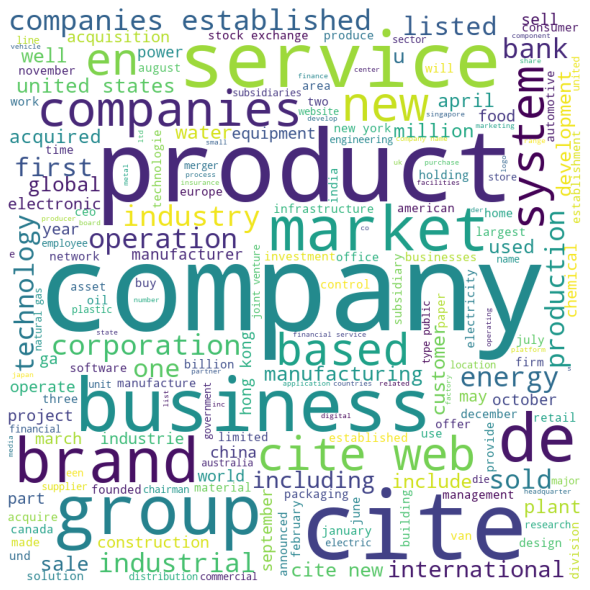

In [166]:

# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.product_info.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [271]:
# news
import pandas as pd
df = pd.read_csv("./temp_data2/news_headlines.csv")[["company","date","header","overall_score","news_url"]].drop_duplicates(["company","header"])
# df.sort_values(["company","overall_score"]).groupby("company").head(10).iloc[0:50,:]


In [272]:
df2 = df[df.company.str.contains("Vodafone")]
df2
# .iloc[np.r_[0:2, -2:0]]
# .sort_values(by="header", key=lambda x: x.str.len(), ascending=False)
# 

company                  date  \
11971      Vodafone Group PLC  2021-04-20T03:47:43Z   
11972      Vodafone Group PLC  2021-01-17T05:32:49Z   
11973      Vodafone Group PLC  2021-05-06T11:02:32Z   
11974      Vodafone Group PLC  2021-06-04T15:17:12Z   
11975      Vodafone Group PLC  2021-01-29T00:32:37Z   
11976      Vodafone Group PLC  2021-02-04T21:31:44Z   
11977      Vodafone Group PLC  2021-05-23T00:16:45Z   
11978      Vodafone Group PLC  2021-10-26T19:18:38Z   
11979      Vodafone Group PLC  2021-05-23T02:17:16Z   
11980      Vodafone Group PLC  2021-06-07T11:46:38Z   
11981      Vodafone Group PLC  2021-01-21T18:16:52Z   
11982      Vodafone Group PLC  2021-05-24T08:46:29Z   
11983      Vodafone Group PLC  2021-01-15T08:48:20Z   
11984      Vodafone Group PLC  2021-05-22T18:02:37Z   
11985      Vodafone Group PLC  2021-04-23T08:32:05Z   
11986      Vodafone Group PLC  2021-01-18T17:49:00Z   
11991      Vodafone Group PLC  2021-05-04T14:33:03Z   
11996      Vodafone Group PLC  2021-05-05T14:03:47Z   
11997      Vodafone Group PLC  2021-05-04T19:32:34Z   
11998      Vodafone Group PLC  2021-05-03T16:18:20Z   
11999      Vodafone Group PLC  2021-05-03T08:01:41Z   
18430  VodafoneZiggo Group BV  2021-04-24T22:17:05Z   

                                                                                                                                                                                                              header  \
11971                                                                                                                                                                                     Three - Country Restricted   
11972                                                                                                                                                                  Hey Teacher, Zoom those kids - Independent.ie   
11973                                                                                                                                            GRACE ON THE CASE: How do I get bad Vodafone credit marks removed?    
11974                                                                                                                                         March 26th and the aftermath – where next for the anti-cuts movement?    
11975                                                                                                                                                       India must avoid the retrospective tax mess - Northlines   
11976  Vodafone to black-list media outlets that promote hateful content or 'fake news'  Facebook Twitter WhatsApp Reddit Email Stuff Facebook Twitter WhatsApp Reddit Email Facebook Twitter Snapchat Shielded Site   
11977                                                                                                                                                      did insecure wi fi lead the police to our door ar AAKhibG   
11978                                                                                                                                                                    The Big Tech elephant is squashing telecom    
11979                                                                                                                                              'Did weak wi-fi password lead the police to our door?' - BBC News   
11980                                                                                                                                                     heres why i think the vodafone share price is undervalued    
11981                                                                                                                                                                       Transfer pricing cases to watch in 2021    
11982                                                                                                                                                        is the 

In [282]:
df2[df2.header.str.lower().str.contains("spain")]

Empty DataFrame
Columns: [company, date, header, overall_score, news_url]
Index: []

In [231]:
import numpy as np
df2 = df[df.company.str.contains("Vodafone")]
# df["overall_score"].quantile([0.0, .9])

df2["score_quantile"] = pd.qcut(df2["overall_score"], q=5, labels=range(5))
df2 = df2[(df2.score_quantile==0)|(df2.score_quantile==4)]
df2

import difflib
import tqdm
# Threshold filter based on Percentage similarity
thr = 0.55
df2['Flag'] = 0
for text in tqdm.tqdm(df2['header'].tolist()):
    df2['temp'] = [difflib.SequenceMatcher(None, text1,text).ratio() for text1 in df2['header'].tolist()]
    df2.loc[df2['temp'].gt(thr),['Flag']] = df2['Flag'].max()+1
df2.drop('temp',1)

df3 = df2.loc[~df2['Flag'].duplicated(keep='first')]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 410.56it/s]


In [233]:
df3["date"] = pd.to_datetime(df3["date"], format='%Y-%m-%d')

In [237]:
df3.to_csv("temp4.csv",encoding="UTF-8")

In [256]:
import pandas as pd
df = pd.read_csv("./data/msci2.csv")

In [257]:
# df[df.ISSUER_NAME.str.lower().str.contains("vodafone")]
df2 = df[df.ISSUER_NAME == "VODAFONE GROUP PUBLIC LIMITED COMPANY"]

In [266]:
df3 = df2.filter(regex='SUMMARY').T

In [270]:
pd.set_option('max_colwidth', 2000)
df3[df3[5659].str.contains("a small number of controversies")]

5659
SDG_01_ALIGNMENT_SUMMARY                                                                                                                                                                                                                                                                                                                                                                                                         VODAFONE GROUP PUBLIC LIMITED COMPANY was assessed as Misaligned with SDG 01.\n\nThe company's products and services were Neutral with SDG 01. At the time of our review, the company did not generate substantial revenue from products or services that positively or negatively impacted SDG 01. \n\nThe company's operations were Misaligned with SDG 01. At the time of our assessment, the company had a policy addressing internationally recognized labor conventions that positively impacted SDG 01. The company was implicated in a small number of controversies, including: (1) Egypt: National Telecom Regulatory Authority imposed EGP 7 million penalty over non-compliance with number portability regulation, (2) India: Tax issue over the acquisition of Hutchison-Essar and (3) UK: Employment Tribunal complaint over alleged racial discrimination, unfair dismissal and unauthorized wage deductions that negatively impacted SDG 01. The company's operations overall negatively impacted SDG 01 resulting in it being Misaligned with SDG 01.
SDG_08_ALIGNMENT_SUMMARY                                                                                                                                                                                                                                                                                                                                                                                        VODAFONE GROUP PUBLIC LIMITED COMPANY was assessed as Neutral with SDG 08.\n\nThe company's products and services were Neutral with SDG 08. At the time of our review, the company did not generate substantial revenue from products or services that positively or negatively impacted SDG 08. \n\nThe company's operations were net Neutral with SDG 08. At the time of our assessment, the company had a policy addressing internationally recognized labor conventions, provided professional leadership development, monitored employee satisfaction and had programs to facilitate workforce diversity. The company was implicated in a small number of controversies, including: (1) India: Tax issue over the acquisition of Hutchison-Essar, (2) UK: Employment Tribunal complaint over alleged racial discrimination, unfair dismissal and unauthorized wage deductions and (3) Portugal: Tax dispute over value added tax payable for early termination fees. The company's operations both positively and negatively impacted SDG 08 resulting in a net neutral assessment.
SDG_09_ALIGNMENT_SUMMARY                                                                                                                                                                                                                              VODAFONE GROUP PUBLIC LIMITED COMPANY was assessed as Misaligned with SDG 09.\n\nThe company's products and services were Neutral with SDG 09. At the time of our review, the company did not generate substantial revenue from products or services that positively or negatively impacted SDG 09. \n\nThe company's operations were Misaligned with SDG 09. At the time of our assessment, the company conducted regular environmental audits of its operations and had programs to reduce GHG emissions in its operations that positively impacted SDG 09. The company's energy consumption intensity remained stable in the last three reported years. The company was implicated in a small number of controversies, including: (1) Egypt: National Telecom Regulatory Authority imposed EGP 7 million penalty over non-compliance with number portability regulation, (2) Vod

In [11]:
column_features = ['magnitude_sum', 'magnitude_mean', 'magnitude_std',
       'magnitude_median', 'magnitude_var', 'magnitude_amin', 'magnitude_amax',
       'magnitude_percentile_5', 'magnitude_percentile_95',
       'magnitude_percentile_10', 'magnitude_percentile_90', 'score_sum',
       'score_mean', 'score_std', 'score_median', 'score_var', 'score_amin',
       'score_amax', 'score_percentile_5', 'score_percentile_95',
       'score_percentile_10', 'score_percentile_90', 'numMentions_sum',
       'numMentions_mean', 'numMentions_std', 'numMentions_median',
       'numMentions_var', 'numMentions_amin', 'numMentions_amax',
       'numMentions_percentile_5', 'numMentions_percentile_95',
       'numMentions_percentile_10', 'numMentions_percentile_90',
       'avgSalience_sum', 'avgSalience_mean', 'avgSalience_std',
       'avgSalience_median', 'avgSalience_var', 'avgSalience_amin',
       'avgSalience_amax', 'avgSalience_percentile_5',
       'avgSalience_percentile_95', 'avgSalience_percentile_10',
       'avgSalience_percentile_90', 'overall_score_sum', 'overall_score_mean',
       'overall_score_std', 'overall_score_median', 'overall_score_var',
       'overall_score_amin', 'overall_score_amax',
       'overall_score_percentile_5', 'overall_score_percentile_95',
       'overall_score_percentile_10', 'overall_score_percentile_90']

import pandas as pd
df1 = pd.read_csv("./temp_data2/news_headlines2.csv")[["company","header"]]
df2 = pd.read_csv("./temp_data2/news_sentiment.csv")[['company']+column_features]


In [13]:
from tqdm import tqdm
tqdm.pandas()

import nltk
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from nltk.corpus import wordnet
nltk.download('omw-1.4')

def stem_sentences(x):
    tokenized_words = x.split(" ")
    tokenized_sentence = []
    for word in tokenized_words:
        if len(wordnet.synsets(word)) != 0:
            tokenized_sentence.append(porter.stem(word))
    tokenized_sentence = " ".join(tokenized_sentence)
    return tokenized_sentence

df1['concat_header'] = df1.groupby(['company'])['header'].transform(lambda x: ','.join(x))
df1['concat_header_cleaned'] = df1['concat_header'].progress_apply(stem_sentences)
df1 = df1.drop_duplicates(["company","concat_header_cleaned"])

In [17]:
df_merge = df1.merge(df2,on="company")
df_merge.to_csv("./temp_data2/news_features.csv")

In [39]:
# pd.read_csv(("./temp_data2/news_features.csv"))
# pd.read_csv(("./temp_data2/features.csv"))

Unnamed: 0                             company  \
0              0                           Apple Inc   
1              1                  Honda Motor Co Ltd   
2              2                        Facebook Inc   
3              3                     AstraZeneca PLC   
4              4                      Amazon.com Inc   
...          ...                                 ...   
1483        1483  Cogent Communications Holdings Inc   
1484        1484                            UGI Corp   
1485        1485          Sprouts Farmers Market Inc   
1486        1486                         Westrock Co   
1487        1487         American Water Works Co Inc   

                                                 header  \
0     Epic Games vs Apple trial, verdict, and afterm...   
1     Massive Takata Airbag Recall: Everything You N...   
2     Robert F. Kennedy Jr.'s Insanely Stupid Lawsui...   
3     'The EU cocked up big time': Brussels is ridic...   
4     Amazon’s Great Labor Awakening - The New York ...   
...                                                 ...   
1483  \n      \n    Cogent Communications Holdings I...   
1484  business article_e8b4d1f5 af0d 556c 8556 9ebea...   
1485  \n      \n    Neptune Technologies (NEPT) Q3 2...   
1486    WestRock (WRK) Q2 2021 Earnings Call Transcript   
1487  \n      \n    American Water Works Co Inc (AWK...   

                                          concat_header  \
0     Epic Games vs Apple trial, verdict, and afterm...   
1     Massive Takata Airbag Recall: Everything You N...   
2     Robert F. Kennedy Jr.'s Insanely Stupid Lawsui...   
3     'The EU cocked up big time': Brussels is ridic...   
4     Amazon’s Great Labor Awakening - The New York ...   
...                                                 ...   
1483  \n      \n    Cogent Communications Holdings I...   
1484  business article_e8b4d1f5 af0d 556c 8556 9ebea...   
1485  \n      \n    Neptune Technologies (NEPT) Q3 2...   
1486    WestRock (WRK) Q2 2021 Earnings Call Transcript   
1487  \n      \n    American Water Works Co Inc (AWK...   

                                  concat_header_cleaned  magnitude_sum  \
0     epic game vs appl aftermath all need know an i...         8993.3   
1     massiv need includ full list affect warranti c...         1058.5   
2     robert kennedi insan stupid lawsuit insight fu...         2792.2   
3     eu cock up big brussel is ridicul over humili ...         9210.0   
4     great labor awaken new york amazon crush union...        10249.4   
...                                                 ...            ...   
1483        cogent commun hold inc earn call transcript           38.0   
1484                                               busi           22.5   
1485              neptun technolog earn call transcript           81.3   
1486                               earn call transcript          223.8   
1487    american water work co inc earn call transcript          106.0   

      magnitude_mean  magnitude_std  magnitude_median  magnitude_var  ...  \
0          47.836702      40.047433              37.1    1603.796881  ...   
1          50.404762      69.332694              26.1    4807.022476  ...   
2          36.262338      29.732116              26.7     883.998694  ...   
3          41.863636      31.411638              34.1     986.691000  ...   
4          73.736691      59.436398              55.5    3532.685383  ...   
...              ...            ...               ...            ...  ...   
1483       38.000000            NaN              38.0            NaN  ...   
1484       22.500000            NaN              22.5            NaN  ...   
1485       81.300000            NaN              81.3            NaN  ...   
1486      223.800000            NaN             223.8            NaN  ...   
1487      106.000000            NaN             106.0            NaN  ...   

      overall_score_mean  overall_score_std  overall_score_median  \
0            -213.614840        

In [63]:
# summary statistics
################################new section classification
import warnings
warnings.filterwarnings("ignore")
import sys
measure = str(sys.argv[1])
print(measure)
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import nltk
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from nltk.corpus import wordnet
nltk.download('omw-1.4')
import numpy as np
from sklearn.model_selection import train_test_split

import pickle

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

# import argparse
# parser = argparse.ArgumentParser()
# parser.add_argument("--n", help="SDG K")
# args = parser.parse_args()
#
# number = int(args.n)
def get_category(x):
    if x == "Strongly Misaligned":
        return "Misaligned"
    elif x == "Strongly Aligned":
        return "Aligned"
    else:
        return x


def stem_sentences(x):
    tokenized_words = x.split(" ")
    tokenized_sentence = []
    for word in tokenized_words:
        if len(wordnet.synsets(word)) != 0:
            tokenized_sentence.append(porter.stem(word))
    tokenized_sentence = " ".join(tokenized_sentence)
    return tokenized_sentence

# creating bag of words representations from description
# Create a Bag of Words Model with Sklearn
# import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def get_BoW(df_wiki_node, column_name, param1=5, param2=.95):
    corpus = df_wiki_node[column_name]
    # sentence_1="*&^$This is a good job.{{I will not miss it for anything"
    # sentence_2="This is not good at all}}, hello my name misses a w"

#     CountVec = CountVectorizer(ngram_range=(1,2), # to use bigrams ngram_range=(2,2)
#                                stop_words='english')
    CountVec = CountVectorizer(min_df=param1,max_df=param2, ngram_range=(1, 2), stop_words='english')
    #transform
    Count_data = CountVec.fit_transform(corpus.values.tolist())

    #create dataframe
    BoW_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())
    # print(BoW_dataframe)
    return BoW_dataframe

df_merge = pd.read_csv("./temp_data2/news_features.csv")
column_features = ['magnitude_sum', 'magnitude_mean', 'magnitude_std',
       'magnitude_median', 'magnitude_var', 'magnitude_amin', 'magnitude_amax',
       'magnitude_percentile_5', 'magnitude_percentile_95',
       'magnitude_percentile_10', 'magnitude_percentile_90', 'score_sum',
       'score_mean', 'score_std', 'score_median', 'score_var', 'score_amin',
       'score_amax', 'score_percentile_5', 'score_percentile_95',
       'score_percentile_10', 'score_percentile_90', 'numMentions_sum',
       'numMentions_mean', 'numMentions_std', 'numMentions_median',
       'numMentions_var', 'numMentions_amin', 'numMentions_amax',
       'numMentions_percentile_5', 'numMentions_percentile_95',
       'numMentions_percentile_10', 'numMentions_percentile_90',
       'avgSalience_sum', 'avgSalience_mean', 'avgSalience_std',
       'avgSalience_median', 'avgSalience_var', 'avgSalience_amin',
       'avgSalience_amax', 'avgSalience_percentile_5',
       'avgSalience_percentile_95', 'avgSalience_percentile_10',
       'avgSalience_percentile_90', 'overall_score_sum', 'overall_score_mean',
       'overall_score_std', 'overall_score_median', 'overall_score_var',
       'overall_score_amin', 'overall_score_amax',
       'overall_score_percentile_5', 'overall_score_percentile_95',
       'overall_score_percentile_10', 'overall_score_percentile_90']
# number = 1
all_scores_all_SDGs = []
number = 1
print("SDG ", number, " is calculating ...... ")
msci = pd.read_csv("./data/msci.csv")
msci2 = pd.read_csv("./data/msci2.csv").rename(columns={"SDG_03_OPS_ALIGNMENT":"SDG_03_OPER_ALIGNMENT"})

variable6 = "GICS Sector"

if number >= 10:
    variable5 = "SDG_{}_NET_ALIGNMENT".format(number)
else:
    variable5 = "SDG_0{}_NET_ALIGNMENT".format(number) # another thing

SDG1 = msci[["Company Name", "Company ID"]].dropna()
SDG2 = msci2[["ISSUER_NAME", "Figi", variable5]].dropna()

df_label = SDG1.merge(SDG2, left_on="Company ID", right_on="Figi")[["Company Name", variable5]]
df_label = df_label.rename(columns = {"Company Name": "company"})

df_sector = pd.read_csv("./data/Fundamental.csv")[["Company Name",variable6]].rename(columns={"Company Name": "company"})
df_merge2 = df_merge.merge(df_sector,on="company", how="right")
df_merge3 = df_merge2.merge(df_label, on="company", how="right")
df_merge3["concat_header_cleaned"] = df_merge3["concat_header_cleaned"].fillna("nothing")
df_merge3 = df_merge3.dropna(subset=[variable6,variable5])
df_merge3 = df_merge3.fillna(df_merge3.groupby(variable6).transform("mean"))
# added
df_wiki = pd.read_csv("./temp_data/wiki/wiki_product_info.csv",sep="\t")
df_wiki["product_info"] = df_wiki["product_info"].progress_apply(stem_sentences)
df_merge3 = df_merge3.merge(df_wiki[["company","product_info"]],on="company").dropna()
# added
df_entail = pd.read_csv("./temp_data/entail/entail_SDG_{}.csv".format(number),sep="\t")
df_entail["report_evidence"] = df_entail.groupby("company")["statement"].transform(lambda x: ','.join(x))
df_evidence = df_entail[["company","statement"]].drop_duplicates().rename(columns = {"statement":"report_evidence"})
df_merge3 = df_merge3.merge(df_evidence,on="company",how="left")
df_merge3["report_evidence"] = df_merge3["report_evidence"].fillna("nothing")
df_merge3["stem_product_info"] = df_merge3["product_info"].progress_apply(stem_sentences)
df_merge3["stem_report_evidence"] = df_merge3["report_evidence"].progress_apply(stem_sentences)


labels = df_merge3[variable5].values
features1 = pd.get_dummies(df_merge3[variable6])
features2 = get_BoW(df_merge3, "concat_header_cleaned", param1 = 10)
features3 = df_merge3[column_features]
features4 = get_BoW(df_merge3, "stem_product_info", param1 = 10)
if number == 13:
    features5 = get_BoW(df_merge3, "stem_report_evidence", 10)
else:
    features5 = get_BoW(df_merge3, "stem_report_evidence", param1 = 0)

if features2.shape[1] > 2000:
    features2 = get_BoW(df_merge3, "concat_header_cleaned", param1 = 20)
if features4.shape[1] > 2000:
    features4 = get_BoW(df_merge3, "stem_product_info", param1 = 40)
if features5.shape[1] > 2000:
    features5 = get_BoW(df_merge3, "stem_report_evidence", 20)

-f


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\qhuca\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


SDG  1  is calculating ...... 


100%|█████████████████████████████████████████████████████████████████████████████| 902/902 [00:00<00:00, 22554.46it/s]


In [4]:
# summar statistics
df_merge3[["company","stem_report_evidence","concat_header_cleaned"]+[variable5,variable6]+column_features]

company stem_report_evidence  \
0                         3M Co                 noth   
1                A O Smith Corp                 noth   
2                a2 Milk Co Ltd                 noth   
3                       ABB Ltd                 noth   
4           Abbott Laboratories                 noth   
..                          ...                  ...   
897     Zebra Technologies Corp                 noth   
898  Zimmer Biomet Holdings Inc                 noth   
899                  Zoetis Inc                 noth   
900           Zur Rose Group AG                 noth   
901   Zurich Insurance Group AG                 noth   

                                 concat_header_cleaned SDG_01_NET_ALIGNMENT  \
0    rooki middlemen muddl govern s effort buy supp...              Neutral   
1    smith product are not worth servic is fraud sm...              Aligned   
2    former high flier milk take a tumbl on earn do...              Aligned   
3    european stock recoup most weak outlook hit sa...              Neutral   
4    lab stock drop as vaccin mean site logo articl...              Neutral   
..                                                 ...                  ...   
897  doe know viral video show retail giant catch t...              Neutral   
898               zimmer hold inc earn call transcript              Neutral   
899  21 announc appoint glenn david as group presid...              Neutral   
900  rose collabor on obes rose group announc colla...              Neutral   
901  it worker who wa sack misconduct after pound s...              Neutral   

                GICS Sector  magnitude_sum  magnitude_mean  magnitude_std  \
0               Industrials          395.4           65.90      80.388332   
1               Industrials           26.2           13.10       6.505382   
2          Consumer Staples           29.9           14.95       1.202082   
3               Industrials          103.6           25.90      19.064277   
4               Health Care           78.0           15.60       9.081575   
..                      ...            ...             ...            ...   
897  Information Technology           28.1           14.05       3.181981   
898             Health Care          146.4          146.40      19.970905   
899             Health Care           46.2           23.10       1.838478   
900        Consumer Staples           21.8           10.90      11.313708   
901              Financials           66.2           16.55       3.233677   

     magnitude_median  magnitude_var  ...  overall_score_mean  \
0               29.50    6462.284000  ...           72.466667   
1               13.10      42.320000  ...            2.340000   
2               14.95       1.445000  ...           43.170000   
3               21.45     363.446667  ...          126.925000   
4               14.10      82.475000  ...           53.932000   
..                ...            ...  ...                 ...   
897             14.05      10.125000  ...           54.830000   
898            146.40    1316.823104  ...          878.400000   
899             23.10       3.380000  ...           59.740000   
900             10.90     128.000000  ...           19.845000   
901             16.65      10.456667  ...          -28.267500   

     overall_score_std  overall_score_median  overall_score_var  \
0           371.955921                 0.675      138351.207027   
1            18.328208                 2.340         335.923200   
2            73.015846                43.170        5331.313800   
3            94.006145               147.260        8837.155300   
4            58.990053                83.720        3479.826320   
..                 ...                   ...                ...   
897          79.210102                54.830        6274.240200   
898         143.348603               878.400       70306.870512   
899         118.991929                59.740       14159.079200   
900          28.065068    

<AxesSubplot:>

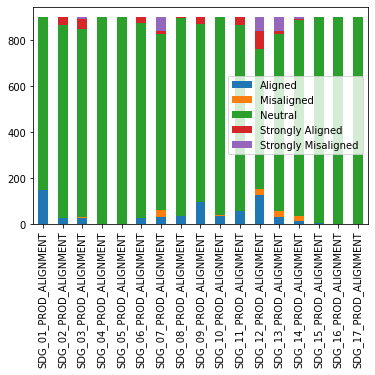

In [64]:
# industry
df_distribution = []
labels = []
for number in range(1,18):
    msci = pd.read_csv("./data/msci.csv")
    msci2 = pd.read_csv("./data/msci2.csv").rename(columns={"SDG_03_OPS_ALIGNMENT":"SDG_03_OPER_ALIGNMENT"})
    if number >= 10:
        variable5 = "SDG_{}_PROD_ALIGNMENT".format(number)
    else:
        variable5 = "SDG_0{}_PROD_ALIGNMENT".format(number) # another thing
        
    labels.append(variable5)

    SDG1 = msci[["Company Name", "Company ID"]].dropna()
    SDG2 = msci2[["ISSUER_NAME", "Figi", variable5]].dropna()

    df_label = SDG1.merge(SDG2, left_on="Company ID", right_on="Figi")[["Company Name", variable5]]
    df_label = df_label.rename(columns = {"Company Name": "company"})

    df_distribution.append(df_label[df_label.company.isin(df_merge3.company.values)])
    # ["SDG_01_NET_ALIGNMENT"].value_counts()
df_plot = pd.concat(df_distribution,axis=1)[labels].apply(pd.Series.value_counts).fillna(0)
df_plot.T.plot(kind="bar", stacked=True)
# [labels].plot(kind="bar", stacked=True)

<AxesSubplot:>

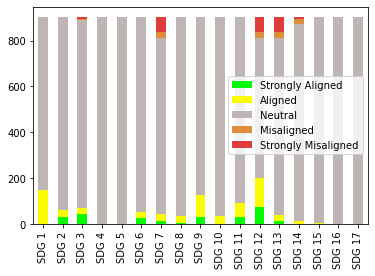

In [90]:
df_plot = df_plot.reindex(["Strongly Aligned", "Aligned", "Neutral", "Misaligned", "Strongly Misaligned"])
df_plot.columns = ["SDG 1","SDG 2","SDG 3","SDG 4","SDG 5","SDG 6","SDG 7","SDG 8","SDG 9","SDG 10","SDG 11","SDG 12","SDG 13","SDG 14","SDG 15","SDG 16","SDG 17"]
colors = { 'Strongly Aligned': '#04FB04', 'Aligned': '#FBFB04', 'Neutral': '#BEB5B5', 'Misaligned':'#E08E3C', 'Strongly Misaligned': '#E03C3C'}
df_plot.T.plot(kind="bar", stacked=True, color=colors)

In [14]:
df_temp = pd.concat(df_distribution,axis=1)[["company"]+labels]
df_temp = df_temp.loc[:,~df_temp.columns.duplicated()]
df_sector = pd.read_csv("./data/Fundamental.csv")[["Company Name",variable6]].rename(columns={"Company Name": "company"})
df_temp2 = df_temp.merge(df_sector,on="company", how="right")
df_temp2 = df_temp2.dropna()

In [15]:
df_temp2

company SDG_01_PROD_ALIGNMENT SDG_02_PROD_ALIGNMENT  \
0                    Pfizer Inc               Aligned               Neutral   
1           State Bank of India               Neutral               Neutral   
2                     Tesla Inc               Neutral               Neutral   
3                       BASF SE               Neutral               Neutral   
4            Koninklijke DSM NV               Neutral               Neutral   
...                         ...                   ...                   ...   
1100   Mizrahi Tefahot Bank Ltd               Aligned               Neutral   
1293          Zur Rose Group AG               Neutral               Neutral   
1294  Zurich Insurance Group AG               Neutral               Neutral   
1339                 Zoetis Inc               Neutral               Neutral   
1340                      3M Co               Neutral               Neutral   

     SDG_03_PROD_ALIGNMENT SDG_04_PROD_ALIGNMENT SDG_05_PROD_ALIGNMENT  \
0         Strongly Aligned               Neutral               Neutral   
1                  Neutral               Neutral               Neutral   
2                  Neutral               Neutral               Neutral   
3                  Neutral               Neutral               Neutral   
4                  Neutral               Neutral               Neutral   
...                    ...                   ...                   ...   
1100               Neutral               Neutral               Neutral   
1293               Neutral               Neutral               Neutral   
1294               Neutral               Neutral               Neutral   
1339               Neutral               Neutral               Neutral   
1340               Neutral               Neutral               Neutral   

     SDG_06_PROD_ALIGNMENT SDG_07_PROD_ALIGNMENT SDG_08_PROD_ALIGNMENT  \
0                  Neutral               Neutral               Neutral   
1                  Neutral               Neutral               Neutral   
2                  Neutral               Aligned               Neutral   
3                  Neutral            Misaligned               Neutral   
4                  Neutral               Neutral               Neutral   
...                    ...                   ...                   ...   
1100               Neutral               Neutral               Aligned   
1293               Neutral               Neutral               Neutral   
1294               Neutral               Neutral               Neutral   
1339               Neutral               Neutral               Neutral   
1340               Neutral               Neutral               Neutral   

     SDG_09_PROD_ALIGNMENT SDG_10_PROD_ALIGNMENT SDG_11_PROD_ALIGNMENT  \
0                  Neutral               Neutral               Neutral   
1                  Neutral               Neutral               Neutral   
2                  Aligned               Neutral               Aligned   
3                  Aligned               Neutral               Neutral   
4                  Neutral               Neutral               Neutral   
...                    ...                   ...                   ...   
1100               Aligned               Aligned               Neutral   
1293               Neutral               Neutral               Neutral   
1294               Neutral               Neutral               Neutral   
1339               Neutral               Neutral               Neutral   
1340               Neutral               Neutral               Neutral   

     SDG_12_PROD_ALIGNMENT SDG_13_PROD_ALIGNMENT SDG_14_PROD_ALIGNMENT  \
0                  Neutral               Neutral               Neutral   
1                  Neutral               Neutral               Neutral   
2         Strongly Aligned               Aligned               Neutral   
3                  Aligned            Misaligned               Neutral   
4                  Neutral            

<AxesSubplot:xlabel='MSCI sector', ylabel='count'>

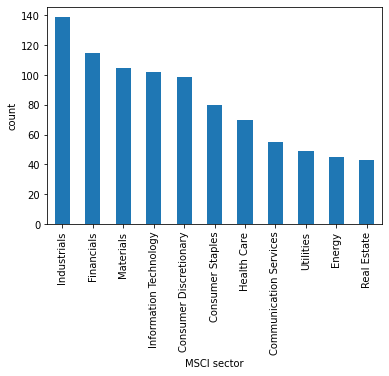

In [24]:
df_merge3["GICS Sector"].value_counts().plot(kind="bar",xlabel = "MSCI sector",ylabel="count")

In [122]:
df_temp2[["GICS Sector"]].value_counts()

# .groupby(["SDG_01_PROD_ALIGNMENT","GICS Sector"]).agg("count")

GICS Sector           
Industrials               139
Financials                115
Materials                 105
Information Technology    102
Consumer Discretionary     99
Consumer Staples           80
Health Care                70
Communication Services     55
Utilities                  49
Energy                     45
Real Estate                43
dtype: int64

In [91]:
df_distribution = []
labels = []
for number in range(1,18):
    msci = pd.read_csv("./data/msci.csv")
    msci2 = pd.read_csv("./data/msci2.csv").rename(columns={"SDG_03_OPS_ALIGNMENT":"SDG_03_OPER_ALIGNMENT"})
    if number >= 10:
        variable5 = "SDG_{}_NET_ALIGNMENT".format(number)
    else:
        variable5 = "SDG_0{}_NET_ALIGNMENT".format(number) # another thing
        
    labels.append(variable5)

    SDG1 = msci[["Company Name", "Company ID"]].dropna()
    SDG2 = msci2[["ISSUER_NAME", "Figi", variable5]].dropna()

    df_label = SDG1.merge(SDG2, left_on="Company ID", right_on="Figi")[["Company Name", variable5]]
    df_label = df_label.rename(columns = {"Company Name": "company"})

    df_distribution.append(df_label[df_label.company.isin(df_merge3.company.values)])
    # ["SDG_01_NET_ALIGNMENT"].value_counts()

In [92]:
df_plot = pd.concat(df_distribution,axis=1)[labels].apply(pd.Series.value_counts).fillna(0)
df_plot
# [labels].plot(kind="bar", stacked=True)

SDG_01_NET_ALIGNMENT  SDG_02_NET_ALIGNMENT  SDG_03_NET_ALIGNMENT  \
Aligned         101.0                    45                  44.0              
Misaligned       51.0                     4                  48.0              
Neutral         742.0                   845                 801.0              
Strongl...        0.0                     3                   0.0              
Strongl...        8.0                     5                   9.0              

            SDG_04_NET_ALIGNMENT  SDG_05_NET_ALIGNMENT  SDG_06_NET_ALIGNMENT  \
Aligned           1.0                 351.0                   115              
Misaligned       20.0                   1.0                     8              
Neutral         880.0                 550.0                   763              
Strongl...        1.0                   0.0                    10              
Strongl...        0.0                   0.0                     6              

            SDG_07_NET_ALIGNMENT  SDG_08_NET_ALIGNMENT  SDG_09_NET_ALIGNMENT  \
Aligned           194                   274                   157              
Misaligned         17                    14                    47              
Neutral           622                   608                   683              
Strongl...          6                     2                    12              
Strongl...         63                     4                     3              

            SDG_10_NET_ALIGNMENT  SDG_11_NET_ALIGNMENT  SDG_12_NET_ALIGNMENT  \
Aligned         216.0                  66.0                   177              
Misaligned       24.0                  30.0                    22              
Neutral         654.0                 801.0                   606              
Strongl...        0.0                   0.0                    28              
Strongl...        8.0                   5.0                    69              

            SDG_13_NET_ALIGNMENT  SDG_14_NET_ALIGNMENT  SDG_15_NET_ALIGNMENT  \
Aligned           192                   6.0                   0.0              
Misaligned         14                  39.0                  38.0              
Neutral           629                 840.0                 857.0              
Strongl...          4                   0.0                   0.0              
Strongl...         63                  17.0                   7.0              

            SDG_16_NET_ALIGNMENT  SDG_17_NET_ALIGNMENT  
Aligned          37.0                  61.0             
Misaligned       78.0                  38.0             
Neutral         779.0                 796.0             
Strongl...        0.0                   0.0             
Strongl...        8.0                   7.0

<AxesSubplot:>

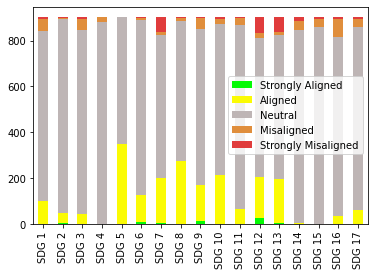

In [94]:
df_plot = df_plot.reindex(["Strongly Aligned", "Aligned", "Neutral", "Misaligned", "Strongly Misaligned"])
df_plot.columns = ["SDG 1","SDG 2","SDG 3","SDG 4","SDG 5","SDG 6","SDG 7","SDG 8","SDG 9","SDG 10","SDG 11","SDG 12","SDG 13","SDG 14","SDG 15","SDG 16","SDG 17"]
colors = { 'Strongly Aligned': '#04FB04', 'Aligned': '#FBFB04', 'Neutral': '#BEB5B5', 'Misaligned':'#E08E3C', 'Strongly Misaligned': '#E03C3C'}
df_plot.T.plot(kind="bar", stacked=True, color=colors)

<AxesSubplot:>

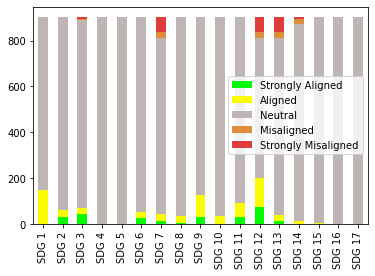

In [95]:
df_distribution = []
labels = []
for number in range(1,18):
    msci = pd.read_csv("./data/msci.csv")
    msci2 = pd.read_csv("./data/msci2.csv").rename(columns={"SDG_03_OPS_ALIGNMENT":"SDG_03_OPER_ALIGNMENT"})
    if number >= 10:
        variable5 = "SDG_{}_PROD_ALIGNMENT".format(number)
    else:
        variable5 = "SDG_0{}_PROD_ALIGNMENT".format(number) # another thing
        
    labels.append(variable5)

    SDG1 = msci[["Company Name", "Company ID"]].dropna()
    SDG2 = msci2[["ISSUER_NAME", "Figi", variable5]].dropna()

    df_label = SDG1.merge(SDG2, left_on="Company ID", right_on="Figi")[["Company Name", variable5]]
    df_label = df_label.rename(columns = {"Company Name": "company"})

    df_distribution.append(df_label[df_label.company.isin(df_merge3.company.values)])
    # ["SDG_01_NET_ALIGNMENT"].value_counts()
df_plot = pd.concat(df_distribution,axis=1)[labels].apply(pd.Series.value_counts).fillna(0)
# df_plot.T.plot(kind="bar", stacked=True)
# [labels].plot(kind="bar", stacked=True)
df_plot = df_plot.reindex(["Strongly Aligned", "Aligned", "Neutral", "Misaligned", "Strongly Misaligned"])
df_plot.columns = ["SDG 1","SDG 2","SDG 3","SDG 4","SDG 5","SDG 6","SDG 7","SDG 8","SDG 9","SDG 10","SDG 11","SDG 12","SDG 13","SDG 14","SDG 15","SDG 16","SDG 17"]
colors = { 'Strongly Aligned': '#04FB04', 'Aligned': '#FBFB04', 'Neutral': '#BEB5B5', 'Misaligned':'#E08E3C', 'Strongly Misaligned': '#E03C3C'}
df_plot.T.plot(kind="bar", stacked=True, color=colors)

<AxesSubplot:>

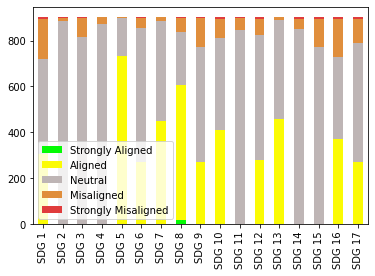

In [96]:
df_distribution = []
labels = []
for number in range(1,18):
    msci = pd.read_csv("./data/msci.csv")
    msci2 = pd.read_csv("./data/msci2.csv").rename(columns={"SDG_03_OPS_ALIGNMENT":"SDG_03_OPER_ALIGNMENT"})
    if number >= 10:
        variable5 = "SDG_{}_OPER_ALIGNMENT".format(number)
    else:
        variable5 = "SDG_0{}_OPER_ALIGNMENT".format(number) # another thing
        
    labels.append(variable5)

    SDG1 = msci[["Company Name", "Company ID"]].dropna()
    SDG2 = msci2[["ISSUER_NAME", "Figi", variable5]].dropna()

    df_label = SDG1.merge(SDG2, left_on="Company ID", right_on="Figi")[["Company Name", variable5]]
    df_label = df_label.rename(columns = {"Company Name": "company"})

    df_distribution.append(df_label[df_label.company.isin(df_merge3.company.values)])
    # ["SDG_01_NET_ALIGNMENT"].value_counts()
df_plot = pd.concat(df_distribution,axis=1)[labels].apply(pd.Series.value_counts).fillna(0)
# df_plot.T.plot(kind="bar", stacked=True)
# [labels].plot(kind="bar", stacked=True)
df_plot = df_plot.reindex(["Strongly Aligned", "Aligned", "Neutral", "Misaligned", "Strongly Misaligned"])
df_plot.columns = ["SDG 1","SDG 2","SDG 3","SDG 4","SDG 5","SDG 6","SDG 7","SDG 8","SDG 9","SDG 10","SDG 11","SDG 12","SDG 13","SDG 14","SDG 15","SDG 16","SDG 17"]
colors = { 'Strongly Aligned': '#04FB04', 'Aligned': '#FBFB04', 'Neutral': '#BEB5B5', 'Misaligned':'#E08E3C', 'Strongly Misaligned': '#E03C3C'}
df_plot.T.plot(kind="bar", stacked=True, color=colors)

In [97]:
################################new section classification
import warnings
warnings.filterwarnings("ignore")
import sys
measure = str(sys.argv[1])
print(measure)
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import nltk
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from nltk.corpus import wordnet
nltk.download('omw-1.4')
import numpy as np
from sklearn.model_selection import train_test_split

import pickle

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

# import argparse
# parser = argparse.ArgumentParser()
# parser.add_argument("--n", help="SDG K")
# args = parser.parse_args()
#
# number = int(args.n)
def get_category(x):
    if x == "Strongly Misaligned":
        return "Misaligned"
    elif x == "Strongly Aligned":
        return "Aligned"
    else:
        return x


def stem_sentences(x):
    tokenized_words = x.split(" ")
    tokenized_sentence = []
    for word in tokenized_words:
        if len(wordnet.synsets(word)) != 0:
            tokenized_sentence.append(porter.stem(word))
    tokenized_sentence = " ".join(tokenized_sentence)
    return tokenized_sentence

# creating bag of words representations from description
# Create a Bag of Words Model with Sklearn
# import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def get_BoW(df_wiki_node, column_name, param1=5, param2=.95):
    corpus = df_wiki_node[column_name]
    # sentence_1="*&^$This is a good job.{{I will not miss it for anything"
    # sentence_2="This is not good at all}}, hello my name misses a w"

#     CountVec = CountVectorizer(ngram_range=(1,2), # to use bigrams ngram_range=(2,2)
#                                stop_words='english')
    CountVec = CountVectorizer(min_df=param1,max_df=param2, ngram_range=(1, 2), stop_words='english')
    #transform
    Count_data = CountVec.fit_transform(corpus.values.tolist())

    #create dataframe
    BoW_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())
    # print(BoW_dataframe)
    return BoW_dataframe

df_merge = pd.read_csv("./temp_data2/news_features.csv")
column_features = ['magnitude_sum', 'magnitude_mean', 'magnitude_std',
       'magnitude_median', 'magnitude_var', 'magnitude_amin', 'magnitude_amax',
       'magnitude_percentile_5', 'magnitude_percentile_95',
       'magnitude_percentile_10', 'magnitude_percentile_90', 'score_sum',
       'score_mean', 'score_std', 'score_median', 'score_var', 'score_amin',
       'score_amax', 'score_percentile_5', 'score_percentile_95',
       'score_percentile_10', 'score_percentile_90', 'numMentions_sum',
       'numMentions_mean', 'numMentions_std', 'numMentions_median',
       'numMentions_var', 'numMentions_amin', 'numMentions_amax',
       'numMentions_percentile_5', 'numMentions_percentile_95',
       'numMentions_percentile_10', 'numMentions_percentile_90',
       'avgSalience_sum', 'avgSalience_mean', 'avgSalience_std',
       'avgSalience_median', 'avgSalience_var', 'avgSalience_amin',
       'avgSalience_amax', 'avgSalience_percentile_5',
       'avgSalience_percentile_95', 'avgSalience_percentile_10',
       'avgSalience_percentile_90', 'overall_score_sum', 'overall_score_mean',
       'overall_score_std', 'overall_score_median', 'overall_score_var',
       'overall_score_amin', 'overall_score_amax',
       'overall_score_percentile_5', 'overall_score_percentile_95',
       'overall_score_percentile_10', 'overall_score_percentile_90']

all_sdgs = ['01. No Poverty', '02. Zero Hunger', '03. Good Health & Wellbeing', '04. Quality Education', '05. Gender Equality Description', '06. Clean Water and Sanitation', '07. Affordable Clean Energy', '08. Decent Work and Economic Growth', '09. Industry Innovation and Infrastructure', '10. Reduced Inequalities', '11. Sustainable Cities and Communities', '12. Responsible Consumption and Production', '13. Climate Action', '14. Life Below Water', '15. Life on Land', '16. Peace, Justice & Strong Institutions', '17. Partnership for the Goals']

df = pd.read_csv("./data/msci3.csv")
df1 = df[["Company Name", "Company ID", '01. No Poverty', '02. Zero Hunger', '03. Good Health & Wellbeing', '04. Quality Education', '05. Gender Equality Description', '06. Clean Water and Sanitation', '07. Affordable Clean Energy', '08. Decent Work and Economic Growth', '09. Industry Innovation and Infrastructure', '10. Reduced Inequalities', '11. Sustainable Cities and Communities', '12. Responsible Consumption and Production', '13. Climate Action', '14. Life Below Water', '15. Life on Land', '16. Peace, Justice & Strong Institutions', '17. Partnership for the Goals']].fillna('0')
df1 = df1.rename(columns = {"Company Name": "company"})
df1 = df1.replace('\xa0', '0')
df1 = df1.replace(' ', '0')
df1 = df1.replace('+1', '1')

for column in all_sdgs:
    mask = df1[column].astype(str).str.len() >= 3
    df1.loc[mask, column] = np.nan


all_scores_all_SDGs = []

# for sdg, number in zip(all_sdgs, range(1,18)):
number = 1
sdg = '01. No Poverty'
print("SDG ", sdg, " is calculating ...... ")

variable6 = "GICS Sector"

variable5 = sdg

df_label = df1[["company",sdg]]

df_sector = pd.read_csv("./data/Fundamental.csv")[["Company Name",variable6]].rename(columns={"Company Name": "company"})
df_merge2 = df_merge.merge(df_sector,on="company", how="right")
df_merge3 = df_merge2.merge(df_label, on="company", how="right")
df_merge3["concat_header_cleaned"] = df_merge3["concat_header_cleaned"].fillna("nothing")
df_merge3 = df_merge3.dropna(subset=[variable6,variable5])
df_merge3 = df_merge3.fillna(df_merge3.groupby(variable6).transform("mean"))
# added
df_wiki = pd.read_csv("./temp_data/wiki/wiki_product_info.csv",sep="\t")
df_wiki["product_info"] = df_wiki["product_info"].progress_apply(stem_sentences)
df_merge3 = df_merge3.merge(df_wiki[["company","product_info"]],on="company").dropna()
# added
df_entail = pd.read_csv("./temp_data/entail/entail_SDG_{}.csv".format(number),sep="\t")
df_entail["report_evidence"] = df_entail.groupby("company")["statement"].transform(lambda x: ','.join(x))
df_evidence = df_entail[["company","statement"]].drop_duplicates().rename(columns = {"statement":"report_evidence"})
df_merge3 = df_merge3.merge(df_evidence,on="company",how="left")
df_merge3["report_evidence"] = df_merge3["report_evidence"].fillna("nothing")
df_merge3["stem_product_info"] = df_merge3["product_info"].progress_apply(stem_sentences)
df_merge3["stem_report_evidence"] = df_merge3["report_evidence"].progress_apply(stem_sentences)


labels = df_merge3[variable5].values
features1 = pd.get_dummies(df_merge3[variable6])
features2 = get_BoW(df_merge3, "concat_header_cleaned", param1 = 10)
features3 = df_merge3[column_features]
features4 = get_BoW(df_merge3, "stem_product_info", param1 = 10)
if number == 13:
    features5 = get_BoW(df_merge3, "stem_report_evidence", 10)
else:
    features5 = get_BoW(df_merge3, "stem_report_evidence", param1 = 0)

if features2.shape[1] > 2000:
    features2 = get_BoW(df_merge3, "concat_header_cleaned", param1 = 20)
if features4.shape[1] > 2000:
    features4 = get_BoW(df_merge3, "stem_product_info", param1 = 40)
if features5.shape[1] > 2000:
    features5 = get_BoW(df_merge3, "stem_report_evidence", 20)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\qhuca\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


-f
SDG  01. No Poverty  is calculating ...... 


100%|███████████████████████████████████████████████████████████████████████████| 1005/1005 [00:00<00:00, 25104.08it/s]


In [98]:
df_merge3

Unnamed: 0    company     header concat_header concat_header_cleaned  \
0          62.0       3M Co  rookie...  rookie...     rooki ...              
1        1411.0   5N Plu...  brief ...  brief ...     brief ...              
2         751.0   A O Sm...  \r\n\t...  \r\n\t...     smith ...              
3         807.0   a2 Mil...  Former...  Former...     former...              
4         230.0     ABB Ltd  Europe...  Europe...     europe...              
...         ...         ...        ...        ...           ...              
1000     1106.0   Zebra ...  Does W...  Does W...     doe kn...              
1001      279.0   Zimmer...  \n    ...  \n    ...     zimmer...              
1002      564.0   Zoetis...  21 e07...  21 e07...     21 ann...              
1003     1360.0   Zur Ro...  Switze...  Switze...     rose c...              
1004      334.0   Zurich...  IT wor...  IT wor...     it wor...              

      magnitude_sum  magnitude_mean  magnitude_std  magnitude_median  \
0         395.4          65.90       80.388332          29.50          
1           5.2           2.60        3.676955           2.60          
2          26.2          13.10        6.505382          13.10          
3          29.9          14.95        1.202082          14.95          
4         103.6          25.90       19.064277          21.45          
...         ...            ...             ...            ...          
1000       28.1          14.05        3.181981          14.05          
1001      146.4         146.40       19.772446         146.40          
1002       46.2          23.10        1.838478          23.10          
1003       21.8          10.90       11.313708          10.90          
1004       66.2          16.55        3.233677          16.65          

      magnitude_var  ...  overall_score_percentile_5  \
0     6462.2...      ...  -277.8350                    
1     13.520000      ...     0.5720                    
2     42.320000      ...    -9.3240                    
3      1.445000      ...    -3.2970                    
4     363.44...      ...    17.1810                    
...         ...      ...        ...                    
1000  10.125000      ...     4.4210                    
1001  1297.3...      ...   878.4000                    
1002   3.380000      ...   -15.9860                    
1003  128.00...      ...     1.9845                    
1004  10.456667      ...  -127.3800                    

      overall_score_percentile_95  overall_score_percentile_10  \
0      561.0375                     -252.850                     
1       10.8680                        1.144                     
2       14.0040                       -8.028                     
3       89.6370                        1.866                     
4      208.2000                       39.102                     
...         ...                          ...                     
1000   105.2390                       10.022                     
1001   878.4000                      878.400                     
1002   135.4660                       -7.572                     
1003    37.7055                        3.969                     
1004    39.1595                     -111.960                     

      overall_score_percentile_90  GICS Sector  01. No Poverty  product_info  \
0       469.575                    Indust...            0       titl l...      
1        10.296                    Materials            0       plu is...      
2        12.708                    Indust...            0       cite i...      
3        84.474                    Consum...            0       new un...      
4       198.480                    Indust...            0       proces...      
...         ...                          ...          ...             ...      
1000     99.638                    Inform...            0       cite t...      
1001    878.400                    Health...            0       form c...      
1002    127.052   

In [106]:
df_distribution = []
labels = []

for sdg, number in zip(all_sdgs, range(1,18)):
    df_label = df1[["company",sdg]]
    df_distribution.append(df_label[df_label.company.isin(df_merge3.company.values)])
df_plot = pd.concat(df_distribution,axis=1)[all_sdgs].apply(pd.Series.value_counts).fillna(0)
ticker = ['SDG_01_PROD_ALIGNMENT',
 'SDG_02_PROD_ALIGNMENT',
 'SDG_03_PROD_ALIGNMENT',
 'SDG_04_PROD_ALIGNMENT',
 'SDG_05_PROD_ALIGNMENT',
 'SDG_06_PROD_ALIGNMENT',
 'SDG_07_PROD_ALIGNMENT',
 'SDG_08_PROD_ALIGNMENT',
 'SDG_09_PROD_ALIGNMENT',
 'SDG_10_PROD_ALIGNMENT',
 'SDG_11_PROD_ALIGNMENT',
 'SDG_12_PROD_ALIGNMENT',
 'SDG_13_PROD_ALIGNMENT',
 'SDG_14_PROD_ALIGNMENT',
 'SDG_15_PROD_ALIGNMENT',
 'SDG_16_PROD_ALIGNMENT',
 'SDG_17_PROD_ALIGNMENT']
ticker = [x.replace("PROD","NET") for x in ticker]
df_plot.columns = ticker
# df_plot.T.plot(kind="bar", stacked=True)
df_plot

SDG_01_NET_ALIGNMENT  SDG_02_NET_ALIGNMENT  SDG_03_NET_ALIGNMENT  \
-1        1.0                    12                    18              
-2        0.0                     5                     9              
-3        0.0                     4                    29              
0       934.0                   942                   804              
1        29.0                    23                    47              
2        19.0                    14                    84              
3        22.0                     5                    14              

    SDG_04_NET_ALIGNMENT  SDG_05_NET_ALIGNMENT  SDG_06_NET_ALIGNMENT  \
-1        0.0                   0.0                   2.0              
-2        0.0                   0.0                   2.0              
-3        0.0                   0.0                   0.0              
0       999.0                 975.0                 965.0              
1         3.0                   0.0                   8.0              
2         3.0                   0.0                  21.0              
3         0.0                   0.0                   7.0              

    SDG_07_NET_ALIGNMENT  SDG_08_NET_ALIGNMENT  SDG_09_NET_ALIGNMENT  \
-1         24                   2.0                   1.0              
-2         19                   0.0                   1.0              
-3         29                   0.0                   0.0              
0         847                 732.0                 668.0              
1          31                 129.0                 149.0              
2          34                  94.0                 120.0              
3          21                  48.0                  66.0              

    SDG_10_NET_ALIGNMENT  SDG_11_NET_ALIGNMENT  SDG_12_NET_ALIGNMENT  \
-1        0.0                     2                  20.0              
-2        0.0                     9                   2.0              
-3        0.0                     1                   0.0              
0       999.0                   811                 906.0              
1         0.0                    68                  28.0              
2         5.0                    90                  37.0              
3         1.0                    24                  12.0              

    SDG_13_NET_ALIGNMENT  SDG_14_NET_ALIGNMENT  SDG_15_NET_ALIGNMENT  \
-1         22                   7.0                    11              
-2         20                   1.0                     1              
-3         25                   0.0                     2              
0         909                 987.0                   962              
1           4                   1.0                     9              
2           6                   2.0                    10              
3          19                   7.0                    10              

    SDG_16_NET_ALIGNMENT  SDG_17_NET_ALIGNMENT  
-1         17                   1.0             
-2          5                   0.0             
-3         10                   0.0             
0         957                1004.0             
1           7                   0.0             
2           8                   0.0             
3           1                   0.0

<AxesSubplot:>

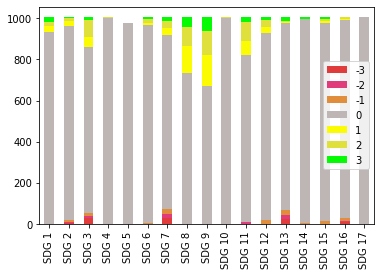

In [109]:
# df_plot = df_plot.reindex(["Strongly Aligned", "Very Much Aligned", "Aligned", "Neutral", "Misaligned", "Very Much Misaligned", "Strongly Misaligned"])
df_plot = df_plot.reindex(['-3','-2','-1','0','1','2','3'])
df_plot.columns = ["SDG 1","SDG 2","SDG 3","SDG 4","SDG 5","SDG 6","SDG 7","SDG 8","SDG 9","SDG 10","SDG 11","SDG 12","SDG 13","SDG 14","SDG 15","SDG 16","SDG 17"]
# colors = { 'Strongly Aligned': '#04FB04', "Very Much Aligned":'#E0E03C', 'Aligned': '#FBFB04', 'Neutral': '#BEB5B5', 'Misaligned':'#E08E3C', "Very Much Misaligned":'#E03C7B','Strongly Misaligned': '#E03C3C'}
colors = { '3': '#04FB04', "2":'#E0E03C', '1': '#FBFB04', '0': '#BEB5B5', '-1':'#E08E3C', "-2":'#E03C7B','-3': '#E03C3C'}
df_plot.T.plot(kind="bar", stacked=True, color=colors)

In [1]:
# import pandas as pd
df_descrp = pd.read_csv("./wiki_data/wiki_graph_data_2hop_description.csv")

import sys
frac_data = 0.6
measure = "macro"
# print(measure)

# run_time = int(sys.argv[2])
################################new section classification
import warnings
warnings.filterwarnings("ignore")
from torch_geometric.data import Data
import torch
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import nltk
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from nltk.corpus import wordnet
nltk.download('omw-1.4')
import numpy as np
# from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from sklearn.metrics import f1_score
import pickle
import numpy as np
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

# import argparse
# parser = argparse.ArgumentParser()
# parser.add_argument("--n", help="SDG K")
# args = parser.parse_args()
#
# number = int(args.n)
def get_category(x):
    if x == "Strongly Misaligned":
        return "Misaligned"
    elif x == "Strongly Aligned":
        return "Aligned"
    else:
        return x

import string
import re
import nltk
nltk.download('wordnet')
nltk.download('punkt')
def extract_statements(line):
    try:
        line = line.replace("|", " ")
        line = line.replace("=", " ")
        line = re.sub(r'^\s?\d+(.*)$', r'\1', line)
        # removing trailing spaces
        line = line.strip()
        # words may be split between lines, ensure we link them back together
        line = re.sub(r'\s?-\s?', '-', line)
        # remove space prior to punctuation
        line = re.sub(r'\s?([,:;\.])', r'\1', line)
        # ESG contains a lot of figures that are not relevant to grammatical structure
        line = re.sub(r'\d{5,}', r' ', line)
        # remove mentions of URLs
        line = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', r' ', line)
        # remove multiple spaces
        line = re.sub(r'\s+', ' ', line)
        # remove multiple dot
        line = re.sub(r'\.+', '.', line)
        sentences = []
        # split paragraphs into well defined sentences using nltk
        for part in nltk.sent_tokenize(line):
            sentences.append(str(part).strip())

        my_string = " ".join(sentences)
        my_string = my_string.replace("_", " ")
        new_string = my_string.translate(str.maketrans('', '', string.punctuation))
        return new_string
    except:
        return None


def stem_sentences(x):
    tokenized_words = x.split(" ")
    tokenized_sentence = []
    for word in tokenized_words:
        if len(wordnet.synsets(word)) != 0:
            tokenized_sentence.append(porter.stem(word))
    tokenized_sentence = " ".join(tokenized_sentence)
    return tokenized_sentence

# creating bag of words representations from description
# Create a Bag of Words Model with Sklearn
# import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def get_BoW(df_wiki_node, column_name, param1=5, param2=.99):
    corpus = df_wiki_node[column_name]
    # sentence_1="*&^$This is a good job.{{I will not miss it for anything"
    # sentence_2="This is not good at all}}, hello my name misses a w"

#     CountVec = CountVectorizer(ngram_range=(1,2), # to use bigrams ngram_range=(2,2)
#                                stop_words='english')
    CountVec = CountVectorizer(min_df=param1,max_df=param2, ngram_range=(1, 1), stop_words='english')
    #transform
    Count_data = CountVec.fit_transform(corpus.values.tolist())

    #create dataframe
    BoW_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
    # print(BoW_dataframe)
    return BoW_dataframe

import re
def find_category(x):
    try:
        return " ".join(re.findall(r'Category:([^\[\]]*)', x))
    except:
        return None

def convert_label_numeric(x):
    if x == "Strongly Misaligned":
        return 1
    if x == "Misaligned":
        return 2
    if x == "Neutral":
        return 3
    if x == "Aligned":
        return 4
    if x == "Strongly Aligned":
        return 5

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(data.x.shape[1], 16)
        self.conv2 = GCNConv(16, len(data.y.unique()))

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)


df_merge = pd.read_csv("./temp_data2/news_features.csv")
column_features = ['magnitude_sum', 'magnitude_mean', 'magnitude_std',
       'magnitude_median', 'magnitude_var', 'magnitude_amin', 'magnitude_amax',
       'magnitude_percentile_5', 'magnitude_percentile_95',
       'magnitude_percentile_10', 'magnitude_percentile_90', 'score_sum',
       'score_mean', 'score_std', 'score_median', 'score_var', 'score_amin',
       'score_amax', 'score_percentile_5', 'score_percentile_95',
       'score_percentile_10', 'score_percentile_90', 'numMentions_sum',
       'numMentions_mean', 'numMentions_std', 'numMentions_median',
       'numMentions_var', 'numMentions_amin', 'numMentions_amax',
       'numMentions_percentile_5', 'numMentions_percentile_95',
       'numMentions_percentile_10', 'numMentions_percentile_90',
       'avgSalience_sum', 'avgSalience_mean', 'avgSalience_std',
       'avgSalience_median', 'avgSalience_var', 'avgSalience_amin',
       'avgSalience_amax', 'avgSalience_percentile_5',
       'avgSalience_percentile_95', 'avgSalience_percentile_10',
       'avgSalience_percentile_90', 'overall_score_sum', 'overall_score_mean',
       'overall_score_std', 'overall_score_median', 'overall_score_var',
       'overall_score_amin', 'overall_score_amax',
       'overall_score_percentile_5', 'overall_score_percentile_95',
       'overall_score_percentile_10', 'overall_score_percentile_90']



# import sys
# print(int(sys.argv[1]))
# number = int(sys.argv[1])
overall_all_scores = []
for i in range(1):
    print("run time ", i)
    all_scores = []
    for number in range(1,2):
        try:
            print("calculating SDG: ", number)
            msci = pd.read_csv("./data/msci.csv")
            msci2 = pd.read_csv("./data/msci2.csv").rename(columns={"SDG_03_OPS_ALIGNMENT":"SDG_03_OPER_ALIGNMENT"})

            variable6 = "GICS Industry"

            if number >= 10:
                variable5 = "SDG_{}_NET_ALIGNMENT".format(number)
            else:
                variable5 = "SDG_0{}_NET_ALIGNMENT".format(number) # another thing

            SDG1 = msci[["Company Name", "Company ID"]].dropna()
            SDG2 = msci2[["ISSUER_NAME", "Figi", variable5]].dropna()

            df_label = SDG1.merge(SDG2, left_on="Company ID", right_on="Figi")[["Company Name", variable5]]
            df_label = df_label.rename(columns = {"Company Name": "company"})

            df_sector = pd.read_csv("./data/Fundamental.csv")[["Company Name",variable6]].rename(columns={"Company Name": "company"})
            df_merge2 = df_merge.merge(df_sector,on="company", how="right")
            df_merge3 = df_merge2.merge(df_label, on="company", how="right")
            df_merge3["concat_header_cleaned"] = df_merge3["concat_header_cleaned"].fillna("nothing")
            df_merge3 = df_merge3.dropna(subset=[variable6,variable5])
            df_merge3 = df_merge3.fillna(df_merge3.groupby(variable6).transform("mean"))
            # added
            df_wiki = pd.read_csv("./temp_data/wiki/wiki_product_info.csv",sep="\t")
            df_merge3 = df_merge3.merge(df_wiki[["company","product_info"]],on="company").dropna()
            # added
            df_entail = pd.read_csv("./temp_data/entail/entail_SDG_{}.csv".format(number),sep="\t")
            df_entail["report_evidence"] = df_entail.groupby("company")["statement"].transform(lambda x: ','.join(x))
            df_evidence = df_entail[["company","statement"]].drop_duplicates().rename(columns = {"statement":"report_evidence"})
            df_merge3 = df_merge3.merge(df_evidence,on="company",how="left")
            df_merge3["report_evidence"] = df_merge3["report_evidence"].fillna("nothing")
            df_merge3["stem_product_info"] = df_merge3["product_info"].progress_apply(stem_sentences)
            df_merge3["stem_report_evidence"] = df_merge3["report_evidence"].progress_apply(stem_sentences)
            df_wiki_id = pd.read_csv("./wiki_data/wikidata.csv")
            df_merge3 = df_merge3.merge(df_wiki_id[["company","wikidata_id"]], on="company", how="left").dropna()

            df_graph = pd.read_csv("./wiki_data/wiki_graph_data_2hop_cleaned.csv")
            # df_graph = df_graph[(df_graph.wikidata_id_start.isin(df_merge3.wikidata_id.values))|(df_graph.wikidata_id_end.isin(df_merge3.wikidata_id.values))]

            df_wiki_node = pd.DataFrame()
            df_wiki_node["wikidata_id"] = list(set(df_graph.wikidata_id_start.values.tolist()+df_graph.wikidata_id_end.values.tolist()))

            df_wiki_node = df_wiki_node.merge(df_merge3,on="wikidata_id",how="left").drop_duplicates(subset=["wikidata_id"])
            df_wiki_node["new_id"] = range(len(df_wiki_node))
            df_wiki_node = df_wiki_node.rename(columns={"wikidata_id":"wiki_id"})

            df_wiki_node["product_info"] = df_wiki_node["product_info"].progress_apply(extract_statements)
            df_wiki_node["product_info"] = df_wiki_node["product_info"].progress_apply(extract_statements)
            df_wiki_node = df_wiki_node.merge(df_descrp[["wiki_id","descriptions"]], on="wiki_id", how="left")

            df_wiki_node["descriptions_clean"] = df_wiki_node["descriptions"].progress_apply(find_category)
            df_wiki_node['descriptions_clean'] = df_wiki_node['descriptions_clean'].fillna(df_wiki_node['product_info'])
            df_wiki_node["descriptions_clean"] = df_wiki_node["descriptions_clean"].fillna("nothing")

            # df_wiki_node[variable5] = df_wiki_node[variable5].apply(convert_label_numeric)
            keys_list = df_wiki_node["wiki_id"].values.tolist()
            values_list = df_wiki_node["new_id"].values.tolist()
            zip_iterator = zip(keys_list, values_list)
            a_dictionary = dict(zip_iterator)
            map_dictionary = {**a_dictionary}

            df_graph["start_new_id"] = df_graph["wikidata_id_start"].map(map_dictionary )
            df_graph["end_new_id"] = df_graph["wikidata_id_end"].map(map_dictionary )

            # model
            data = Data()
            a = torch.tensor(df_graph[["end_new_id", "start_new_id"]].values, dtype=torch.long).t()
            b = torch.tensor(df_graph[["start_new_id", "end_new_id"]].values, dtype=torch.long).t()
            data.edge_index = torch.cat((a,b), 1)

            df_index = df_wiki_node[["new_id",variable5]].dropna()
            # shuffle
            result = df_index.sample(frac=1.0)
            # get the first two by group
            result = result.groupby(variable5).sample(frac=frac_data)
            result = result.sort_values(variable5)

            train_list = np.full(len(df_wiki_node), False)
            train_list[result.new_id.values] = True
            test_list = np.full(len(df_wiki_node), False)
            test_list[list(set(df_index.new_id.values) - set(result.new_id.values))] = True

            data.train_mask = torch.tensor(train_list)
            data.test_mask = torch.tensor(test_list)

            df_wiki_node[variable5] = df_wiki_node[variable5].fillna("nothing")
            df_wiki_node[variable5] = df_wiki_node[variable5].factorize()[0]
            data.y = torch.tensor(df_wiki_node[variable5].values, dtype=torch.int64)

            df_wiki_node[variable6] = df_wiki_node[variable6].fillna("another")

            del msci,msci2,SDG1,SDG2,df_label,df_sector,df_merge2,df_merge3,df_wiki,df_entail,df_wiki_id,df_graph

            df_wiki_node["concat_header_cleaned"] = df_wiki_node["concat_header_cleaned"].fillna("nothing")
            df_wiki_node[column_features] = df_wiki_node[column_features].fillna(0)
            df_wiki_node["stem_report_evidence"] = df_wiki_node["stem_report_evidence"].fillna("nothing")

            features1 = pd.get_dummies(df_wiki_node[variable6])
            features2 = get_BoW(df_wiki_node, "concat_header_cleaned", 10, 50)
            features3 = df_wiki_node[column_features]
            features4 = get_BoW(df_wiki_node, "descriptions_clean", 10, 50)
            # if number == 13:
            #     features5 = get_BoW(df_wiki_node, "stem_report_evidence", param1 = 20)
            # else:
            #     features5 = get_BoW(df_wiki_node, "stem_report_evidence", param1 = 0)

            features = np.concatenate((features1, features2, features3, features4), 1)
            # features = np.concatenate((features1, features4), 1)

            data.x = torch.tensor(features, dtype=torch.float)

            class GCN(torch.nn.Module):
                def __init__(self):
                    super().__init__()
                    self.conv1 = GCNConv(data.x.shape[1], 16)
                    self.conv2 = GCNConv(16, len(data.y.unique()))

                def forward(self, data):
                    x, edge_index = data.x, data.edge_index

                    x = self.conv1(x, edge_index)
                    x = F.relu(x)
                    x = F.dropout(x, training=self.training)
                    x = self.conv2(x, edge_index)

                    return F.log_softmax(x, dim=1)

            device = torch.device('cuda' if quit() else 'cpu')
            print("device", device)
            model = GCN().to(device)
            data = data.to(device)
            optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-3)
            losses = []
            model.train()

            best_score_train = []
            best_score_validation = []
            best_score_test = []
            for epoch in range(2000):
                if epoch % 100 == 0:
                    print(epoch)
                if epoch % 50 == 0:
                    model.eval()
                    pred = model(data).argmax(dim=1)

                    acc_train = f1_score(data.y[data.train_mask].cpu(), pred[data.train_mask].cpu(), average=measure)
                    acc_test = f1_score(data.y[data.test_mask].cpu(), pred[data.test_mask].cpu(), average=measure)

                    # print(f'Accuracy: {acc_train:.4f}, {acc_test:.4f}')
                    best_score_train.append(acc_train)
                    best_score_test.append(acc_test)
                    if acc_train < best_score_train[-1]:
                        break


                optimizer.zero_grad()
                out = model(data)
                loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
                losses.append(loss.item())
                loss.backward()
                optimizer.step()


            # something else comparison #########################################
            X = data.x.cpu().numpy()
            y = data.y.cpu().numpy()

            X_train = X[data.train_mask.cpu()]
            y_train = y[data.train_mask.cpu()]

            X_test = X[data.test_mask.cpu()]
            y_test = y[data.test_mask.cpu()]

            ros = RandomOverSampler(random_state=42)
            X_train, y_train = ros.fit_resample(X_train, y_train)
            # X_test, y_test = ros.fit_resample(X_test, y_test)

            model = BalancedRandomForestClassifier()
            model.fit(X_train, y_train)
            expected_y  = y_test
            predicted_y = model.predict(X_test)

            comparison_score = f1_score(expected_y,predicted_y, average=measure)
            #####
            X_train = features1.values[data.train_mask.cpu()]
            y_train = y[data.train_mask.cpu()]
            X_test = features1.values[data.test_mask.cpu()]
            ros = RandomOverSampler(random_state=42)
            X_train, y_train = ros.fit_resample(X_train, y_train)

            model.fit(X_train, y_train)
            expected_y  = y_test
            predicted_y = model.predict(X_test)

            comparison_score2 = f1_score(expected_y,predicted_y, average=measure)
            ###################################################################
            # save scores
            all_scores.append([number, max(best_score_train), max(best_score_test), comparison_score, comparison_score2, best_score_train[-1], best_score_test[-1]])
            print("best scores train & test", max(best_score_train), max(best_score_test), comparison_score, comparison_score2)
            print("score end train & test", best_score_train[-1], best_score_test[-1])
            # from matplotlib import pyplot as plt
            # fig = plt.figure()
            # plt.plot(best_score_train)
            # plt.plot(best_score_test)
            # # plt.show()
            # fig.savefig('./figures/SDG_{}.png'.format(number), dpi=fig.dpi)
        except:
            all_scores.append(None)
    overall_all_scores.append(all_scores)


# with open('./results/KG/msci_gcn_{}_{}.pkl'.format(frac_data, measure),'wb') as f:
#     pickle.dump(overall_all_scores, f, protocol=pickle.HIGHEST_PROTOCOL)


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\qhuca\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\qhuca\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\qhuca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


run time  0
calculating SDG:  1


100%|███████████████████████████████████████████████████████████████████████████| 1361/1361 [00:00<00:00, 71639.47it/s]


device cpu
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
best scores train & test 0.30514347712342765 0.2702251876563803 0.2768213268213268 0.3540819107507809
score end train & test 0.2667528540308882 0.26774296675191817


In [4]:
import pandas as pd
df_descrp = pd.read_csv("./wiki_data/wiki_graph_data_2hop_description.csv")

import sys
frac_data = 0.6
measure = "micro"
# run_time = int(sys.argv[2])
################################new section classification
import warnings
warnings.filterwarnings("ignore")
from torch_geometric.data import Data
import torch
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import nltk
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from nltk.corpus import wordnet
nltk.download('omw-1.4')
import numpy as np
# from sklearn.model_selection import train_test_split
from torch_geometric.nn.conv.rgcn_conv import FastRGCNConv

import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from sklearn.metrics import f1_score
import pickle
import numpy as np
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

# import argparse
# parser = argparse.ArgumentParser()
# parser.add_argument("--n", help="SDG K")
# args = parser.parse_args()
#
# number = int(args.n)
def get_category(x):
    if x == "Strongly Misaligned":
        return "Misaligned"
    elif x == "Strongly Aligned":
        return "Aligned"
    else:
        return x

import string
import re
import nltk
nltk.download('wordnet')
nltk.download('punkt')
def extract_statements(line):
    try:
        line = line.replace("|", " ")
        line = line.replace("=", " ")
        line = re.sub(r'^\s?\d+(.*)$', r'\1', line)
        # removing trailing spaces
        line = line.strip()
        # words may be split between lines, ensure we link them back together
        line = re.sub(r'\s?-\s?', '-', line)
        # remove space prior to punctuation
        line = re.sub(r'\s?([,:;\.])', r'\1', line)
        # ESG contains a lot of figures that are not relevant to grammatical structure
        line = re.sub(r'\d{5,}', r' ', line)
        # remove mentions of URLs
        line = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', r' ', line)
        # remove multiple spaces
        line = re.sub(r'\s+', ' ', line)
        # remove multiple dot
        line = re.sub(r'\.+', '.', line)
        sentences = []
        # split paragraphs into well defined sentences using nltk
        for part in nltk.sent_tokenize(line):
            sentences.append(str(part).strip())

        my_string = " ".join(sentences)
        my_string = my_string.replace("_", " ")
        new_string = my_string.translate(str.maketrans('', '', string.punctuation))
        return new_string
    except:
        return None


def stem_sentences(x):
    tokenized_words = x.split(" ")
    tokenized_sentence = []
    for word in tokenized_words:
        if len(wordnet.synsets(word)) != 0:
            tokenized_sentence.append(porter.stem(word))
    tokenized_sentence = " ".join(tokenized_sentence)
    return tokenized_sentence

# creating bag of words representations from description
# Create a Bag of Words Model with Sklearn
# import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def get_BoW(df_wiki_node, column_name, param1=5, param2=.99):
    corpus = df_wiki_node[column_name]
    # sentence_1="*&^$This is a good job.{{I will not miss it for anything"
    # sentence_2="This is not good at all}}, hello my name misses a w"

#     CountVec = CountVectorizer(ngram_range=(1,2), # to use bigrams ngram_range=(2,2)
#                                stop_words='english')
    CountVec = CountVectorizer(min_df=param1,max_df=param2, ngram_range=(1, 1), stop_words='english')
    #transform
    Count_data = CountVec.fit_transform(corpus.values.tolist())

    #create dataframe
    BoW_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
    # print(BoW_dataframe)
    return BoW_dataframe

import re
def find_category(x):
    try:
        return " ".join(re.findall(r'Category:([^\[\]]*)', x))
    except:
        return None

def convert_label_numeric(x):
    if x == "Strongly Misaligned":
        return 1
    if x == "Misaligned":
        return 2
    if x == "Neutral":
        return 3
    if x == "Aligned":
        return 4
    if x == "Strongly Aligned":
        return 5

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(data.x.shape[1], 16)
        self.conv2 = GCNConv(16, len(data.y.unique()))

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)


df_merge = pd.read_csv("./temp_data2/news_features.csv")
column_features = ['magnitude_sum', 'magnitude_mean', 'magnitude_std',
       'magnitude_median', 'magnitude_var', 'magnitude_amin', 'magnitude_amax',
       'magnitude_percentile_5', 'magnitude_percentile_95',
       'magnitude_percentile_10', 'magnitude_percentile_90', 'score_sum',
       'score_mean', 'score_std', 'score_median', 'score_var', 'score_amin',
       'score_amax', 'score_percentile_5', 'score_percentile_95',
       'score_percentile_10', 'score_percentile_90', 'numMentions_sum',
       'numMentions_mean', 'numMentions_std', 'numMentions_median',
       'numMentions_var', 'numMentions_amin', 'numMentions_amax',
       'numMentions_percentile_5', 'numMentions_percentile_95',
       'numMentions_percentile_10', 'numMentions_percentile_90',
       'avgSalience_sum', 'avgSalience_mean', 'avgSalience_std',
       'avgSalience_median', 'avgSalience_var', 'avgSalience_amin',
       'avgSalience_amax', 'avgSalience_percentile_5',
       'avgSalience_percentile_95', 'avgSalience_percentile_10',
       'avgSalience_percentile_90', 'overall_score_sum', 'overall_score_mean',
       'overall_score_std', 'overall_score_median', 'overall_score_var',
       'overall_score_amin', 'overall_score_amax',
       'overall_score_percentile_5', 'overall_score_percentile_95',
       'overall_score_percentile_10', 'overall_score_percentile_90']



# import sys
# print(int(sys.argv[1]))
# number = int(sys.argv[1])
overall_all_scores = []
for i in range(1):
    print("run time ", i)
    all_scores = []
    for number in range(1,18):
        # try:
        print("calculating SDG: ", number)
        msci = pd.read_csv("./data/msci.csv")
        msci2 = pd.read_csv("./data/msci2.csv").rename(columns={"SDG_03_OPS_ALIGNMENT":"SDG_03_OPER_ALIGNMENT"})

        variable6 = "GICS Industry"

        if number >= 10:
            variable5 = "SDG_{}_NET_ALIGNMENT".format(number)
        else:
            variable5 = "SDG_0{}_NET_ALIGNMENT".format(number) # another thing

        SDG1 = msci[["Company Name", "Company ID"]].dropna()
        SDG2 = msci2[["ISSUER_NAME", "Figi", variable5]].dropna()

        df_label = SDG1.merge(SDG2, left_on="Company ID", right_on="Figi")[["Company Name", variable5]]
        df_label = df_label.rename(columns = {"Company Name": "company"})

        df_sector = pd.read_csv("./data/Fundamental.csv")[["Company Name",variable6]].rename(columns={"Company Name": "company"})
        df_merge2 = df_merge.merge(df_sector,on="company", how="right")
        df_merge3 = df_merge2.merge(df_label, on="company", how="right")
        df_merge3["concat_header_cleaned"] = df_merge3["concat_header_cleaned"].fillna("nothing")
        df_merge3 = df_merge3.dropna(subset=[variable6,variable5])
        df_merge3 = df_merge3.fillna(df_merge3.groupby(variable6).transform("mean"))
        # added
        df_wiki = pd.read_csv("./temp_data/wiki/wiki_product_info.csv",sep="\t")
        df_wiki["product_info"] = df_wiki["product_info"].progress_apply(stem_sentences)
        df_merge3 = df_merge3.merge(df_wiki[["company","product_info"]],on="company").dropna()
        # added
        df_entail = pd.read_csv("./temp_data/entail/entail_SDG_{}.csv".format(number),sep="\t")
        df_entail["report_evidence"] = df_entail.groupby("company")["statement"].transform(lambda x: ','.join(x))
        df_evidence = df_entail[["company","statement"]].drop_duplicates().rename(columns = {"statement":"report_evidence"})
        df_merge3 = df_merge3.merge(df_evidence,on="company",how="left")
        df_merge3["report_evidence"] = df_merge3["report_evidence"].fillna("nothing")
        df_merge3["stem_product_info"] = df_merge3["product_info"].progress_apply(stem_sentences)
        df_merge3["stem_report_evidence"] = df_merge3["report_evidence"].progress_apply(stem_sentences)
        df_wiki_id = pd.read_csv("./wiki_data/wikidata.csv")
        df_merge3 = df_merge3.merge(df_wiki_id[["company","wikidata_id"]], on="company", how="left").dropna()

        df_graph = pd.read_csv("./wiki_data/wiki_graph_data_2hop.csv")
        df_graph = df_graph[(df_graph.wikidata_id_start.isin(df_merge3.wikidata_id.values))|(df_graph.wikidata_id_end.isin(df_merge3.wikidata_id.values))]

        df_wiki_node = pd.DataFrame()
        df_wiki_node["wikidata_id"] = list(set(df_graph.wikidata_id_start.values.tolist()+df_graph.wikidata_id_end.values.tolist()))

        df_wiki_node = df_wiki_node.merge(df_merge3,on="wikidata_id",how="left").drop_duplicates(subset=["wikidata_id"])
        df_wiki_node["new_id"] = range(len(df_wiki_node))
        df_wiki_node = df_wiki_node.rename(columns={"wikidata_id":"wiki_id"})

        df_wiki_node["product_info"] = df_wiki_node["product_info"].progress_apply(extract_statements)
        df_wiki_node["product_info"] = df_wiki_node["product_info"].progress_apply(extract_statements)
        df_wiki_node = df_wiki_node.merge(df_descrp[["wiki_id","descriptions"]], on="wiki_id", how="left")

        df_wiki_node["descriptions_clean"] = df_wiki_node["descriptions"].progress_apply(find_category)
        df_wiki_node['descriptions_clean'] = df_wiki_node['descriptions_clean'].fillna(df_wiki_node['product_info'])
        df_wiki_node["descriptions_clean"] = df_wiki_node["descriptions_clean"].fillna("nothing")

        # df_wiki_node[variable5] = df_wiki_node[variable5].apply(convert_label_numeric)
        keys_list = df_wiki_node["wiki_id"].values.tolist()
        values_list = df_wiki_node["new_id"].values.tolist()
        zip_iterator = zip(keys_list, values_list)
        a_dictionary = dict(zip_iterator)
        map_dictionary = {**a_dictionary}

        df_graph["start_new_id"] = df_graph["wikidata_id_start"].map(map_dictionary )
        df_graph["end_new_id"] = df_graph["wikidata_id_end"].map(map_dictionary )

        # model
        data = Data()
        a = torch.tensor(df_graph[["end_new_id", "start_new_id"]].values, dtype=torch.long).t()
        b = torch.tensor(df_graph[["start_new_id", "end_new_id"]].values, dtype=torch.long).t()
        data.edge_index = torch.cat((a,b), 1)

        df_index = df_wiki_node[["new_id",variable5]].dropna()
        # shuffle
        result = df_index.sample(frac=1.0)
        # get the first two by group
        result = result.groupby(variable5).sample(frac=frac_data)
        result = result.sort_values(variable5)

        train_list = np.full(len(df_wiki_node), False)
        train_list[result.new_id.values] = True
        test_list = np.full(len(df_wiki_node), False)
        test_list[list(set(df_index.new_id.values) - set(result.new_id.values))] = True

        data.train_mask = torch.tensor(train_list)
        data.test_mask = torch.tensor(test_list)

        df_wiki_node[variable5] = df_wiki_node[variable5].fillna("nothing")
        df_wiki_node[variable5] = df_wiki_node[variable5].factorize()[0]
        data.y = torch.tensor(df_wiki_node[variable5].values, dtype=torch.int64)

        df_wiki_node[variable6] = df_wiki_node[variable6].fillna("another")

        del msci,msci2,SDG1,SDG2,df_label,df_sector,df_merge2,df_merge3,df_wiki,df_entail,df_wiki_id

        df_wiki_node["concat_header_cleaned"] = df_wiki_node["concat_header_cleaned"].fillna("nothing")
        df_wiki_node[column_features] = df_wiki_node[column_features].fillna(0)
        df_wiki_node["stem_report_evidence"] = df_wiki_node["stem_report_evidence"].fillna("nothing")

        features1 = pd.get_dummies(df_wiki_node[variable6])
        features2 = get_BoW(df_wiki_node, "concat_header_cleaned", 10)
        features3 = df_wiki_node[column_features]
        features4 = get_BoW(df_wiki_node, "descriptions_clean", 10)
        # if number == 13:
        #     features5 = get_BoW(df_wiki_node, "stem_report_evidence", param1 = 20)
        # else:
        #     features5 = get_BoW(df_wiki_node, "stem_report_evidence", param1 = 0)

        features = np.concatenate((features1, features2, features3, features4), 1)
        # features = np.concatenate((features1, features4), 1)
        # features = features1.values

        data = Data()

        df_graph["property"] = pd.Categorical(df_graph["property"])
        df_graph["property"] = df_graph["property"].cat.codes

        data.edge_index = torch.tensor(df_graph[["start_new_id", "end_new_id"]].values, dtype=torch.long).t()
        data.edge_type = torch.tensor(df_graph["property"].values, dtype=torch.long)

        data.input = torch.tensor(features, dtype=torch.float)
        data.y = torch.tensor(df_wiki_node[variable5].values, dtype=torch.int64)
        data.train_mask = torch.tensor(train_list)
        data.test_mask = torch.tensor(test_list)

        del df_graph, df_wiki_node
        class RGCN(torch.nn.Module):
            def __init__(self, hidden_channels, out_channels):
                super().__init__()
                self.conv1 = FastRGCNConv(data.input.shape[1], hidden_channels, num_relations = len(data.edge_type.unique()))
                self.conv2 = FastRGCNConv(16, out_channels, num_relations = len(data.edge_type.unique()))

            def forward(self, edge_index, edge_type):
                x = F.relu(self.conv1(data.input, edge_index, edge_type))
                x = self.conv2(x, edge_index, edge_type)
                return F.log_softmax(x, dim=1)

        model = RGCN(hidden_channels=16, out_channels=len(data.y.unique()))

        # device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        # device = torch.device("cpu")
        device = "cuda"
        data = data.to(device)
        model = model.to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)


        losses = []
        model.train()

        best_score_train = []
        best_score_validation = []
        best_score_test = []

        for epoch in range(500):
            if epoch % 100 == 0:
                print(epoch)
            if epoch % 20 == 0:
                # print(epoch)
                with torch.no_grad():
                    model.eval()
                    pred = model(data.edge_index, data.edge_type).argmax(dim=-1)
                    acc_train = f1_score(torch.tensor(data.y[data.train_mask]).cpu(), pred[data.train_mask].cpu(), average=measure)
                    acc_test = f1_score(torch.tensor(data.y[data.test_mask]).cpu(), pred[data.test_mask].cpu(), average=measure)
                    # print(f'Accuracy: {acc_train:.4f}, {acc_test:.4f}')
                    best_score_train.append(acc_train)
                    best_score_test.append(acc_test)

                    if acc_test < best_score_test[-1]:
                        break

            model.train()
            optimizer.zero_grad()
            out = model(data.edge_index, data.edge_type)
            loss = F.nll_loss(out[data.train_mask], torch.tensor(data.y, dtype=torch.long)[data.train_mask])
            losses.append(loss.item())
            loss.backward()
            optimizer.step()



        # something else comparison #########################################
        X = data.input.cpu().numpy()
        y = data.y.cpu().numpy()

        X_train = X[data.train_mask.cpu()]
        y_train = y[data.train_mask.cpu()]

        X_test = X[data.test_mask.cpu()]
        y_test = y[data.test_mask.cpu()]

        ros = RandomOverSampler(random_state=42)
        X_train, y_train = ros.fit_resample(X_train, y_train)
        # X_test, y_test = ros.fit_resample(X_test, y_test)

        model = BalancedRandomForestClassifier()
        model.fit(X_train, y_train)
        expected_y  = y_test
        predicted_y = model.predict(X_test)

        comparison_score = f1_score(expected_y,predicted_y, average=measure)
        ########################################################################
        X_train = features1.values[data.train_mask.cpu()]
        y_train = y[data.train_mask.cpu()]
        X_test = features1.values[data.test_mask.cpu()]
        ros = RandomOverSampler(random_state=42)
        X_train, y_train = ros.fit_resample(X_train, y_train)

        model.fit(X_train, y_train)
        expected_y  = y_test
        predicted_y = model.predict(X_test)

        comparison_score2 = f1_score(expected_y,predicted_y, average=measure)
        ###################################################################
        # save scores
        all_scores.append([number, max(best_score_train), max(best_score_test), comparison_score, comparison_score2, best_score_train[-1], best_score_test[-1]])
        print("best scores train & test", max(best_score_train), max(best_score_test), comparison_score, comparison_score2)
        print("score end train & test", best_score_train[-1], best_score_test[-1])
        # from matplotlib import pyplot as plt
        # fig = plt.figure()
        # plt.plot(best_score_train)
        # plt.plot(best_score_test)
        # # plt.show()
        # fig.savefig('./figures/SDG_{}.png'.format(number), dpi=fig.dpi)
#         except:
#             all_scores.append(None)
    overall_all_scores.append(all_scores)


with open('./results/KG/msci_rgcn_{}_{}.pkl'.format(frac_data, measure),'wb') as f:
    pickle.dump(overall_all_scores, f, protocol=pickle.HIGHEST_PROTOCOL)


In [1]:
################################new section classification
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import nltk
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from nltk.corpus import wordnet
nltk.download('omw-1.4')
import numpy as np
from sklearn.model_selection import train_test_split

import pickle

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

# import sys
# measure = str(sys.argv[1])
# print(measure)
measure = "f1_macro"

# import argparse
# parser = argparse.ArgumentParser()
# parser.add_argument("--n", help="SDG K")
# args = parser.parse_args()
#
# number = int(args.n)



def stem_sentences(x):
    tokenized_words = x.split(" ")
    tokenized_sentence = []
    for word in tokenized_words:
        if len(wordnet.synsets(word)) != 0:
            tokenized_sentence.append(porter.stem(word))
    tokenized_sentence = " ".join(tokenized_sentence)
    return tokenized_sentence

# creating bag of words representations from description
# Create a Bag of Words Model with Sklearn
# import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def get_BoW(df_wiki_node, column_name, param1=5, param2=.95):
    corpus = df_wiki_node[column_name]
    # sentence_1="*&^$This is a good job.{{I will not miss it for anything"
    # sentence_2="This is not good at all}}, hello my name misses a w"

#     CountVec = CountVectorizer(ngram_range=(1,2), # to use bigrams ngram_range=(2,2)
#                                stop_words='english')
    CountVec = CountVectorizer(min_df=param1,max_df=param2, ngram_range=(1, 2), stop_words='english')
    #transform
    Count_data = CountVec.fit_transform(corpus.values.tolist())

    #create dataframe
    BoW_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())
    # print(BoW_dataframe)
    return BoW_dataframe


# number = 1
all_scores_all_SDGs = []
# list(set(range(1,18))-set([13]))
for number in [13]:
    print("SDG ", number, " is calculating ...... ")
    msci = pd.read_csv("./data/msci.csv")
    msci2 = pd.read_csv("./data/msci2.csv")

    variable6 = "GICS Sector"

    if number >= 10:
        variable5 = "SDG_{}_PROD_ALIGNMENT".format(number)
    else:
        variable5 = "SDG_0{}_PROD_ALIGNMENT".format(number) # another thing

    SDG1 = msci[["Company Name", "Company ID"]].dropna()
    SDG2 = msci2[["ISSUER_NAME", "Figi", variable5]].dropna()

    df_label = SDG1.merge(SDG2, left_on="Company ID", right_on="Figi")[["Company Name", variable5]]
    df_label = df_label.rename(columns = {"Company Name": "company"})

    df_wiki = pd.read_csv("./temp_data/wiki/wiki_product_info.csv",sep="\t")
    df_wiki["product_info"] = df_wiki["product_info"].progress_apply(stem_sentences)
    df_merge = df_label.merge(df_wiki[["company","product_info"]],on="company").dropna()
    df_sector = pd.read_csv("./data/Fundamental.csv")[["Company Name",variable6]].rename(columns={"Company Name": "company"})
    df_merge2 = df_merge.merge(df_sector,on="company").dropna()
    df_entail = pd.read_csv("./temp_data/entail/entail_SDG_{}.csv".format(number),sep="\t")
    df_entail["report_evidence"] = df_entail.groupby("company")["statement"].transform(lambda x: ','.join(x))
    df_evidence = df_entail[["company","statement"]].drop_duplicates().rename(columns = {"statement":"report_evidence"})
    df_merge3 = df_merge2.merge(df_evidence,on="company",how="left")
    df_merge3["report_evidence"] = df_merge3["report_evidence"].fillna("nothing")
    df_merge3["stem_product_info"] = df_merge3["product_info"].progress_apply(stem_sentences)
    df_merge3["stem_report_evidence"] = df_merge3["report_evidence"].progress_apply(stem_sentences)


    labels = df_merge3[variable5].values
    features1 = pd.get_dummies(df_merge3[variable6])
    features2 = get_BoW(df_merge3, "stem_product_info", param1 = 10)
    features3 = get_BoW(df_merge3, "stem_report_evidence", param1 = 0)

    # if number == 13:
    #     features3 = get_BoW(df_merge3, "stem_report_evidence", param1 = 10, )
    # else:
    #     features3 = get_BoW(df_merge3, "stem_report_evidence", param1 = 5)
    print(features2.shape, features3.shape)
    if features2.shape[1] > 2000:
        features2 = get_BoW(df_merge3, "stem_product_info", param1 = 20, param2 = 50)

    if features3.shape[1] > 2000:
        features3 = get_BoW(df_merge3, "stem_report_evidence", param1 = 20, param2 = 40)

    print(features2.shape, features3.shape)
    all_scores = []
#     ############################################# round 1
#     print("round1")
#     features = features1
#     # features = features2
#     # features = features3
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

    ############################################# round 2
    print("round2")
    # features = features1
    features = features2
    # features = features3
    # features = np.concatenate((features1, features2),1)
    # features = np.concatenate((features1, features3),1)
    # features = np.concatenate((features2, features3),1)
    # features = np.concatenate((features1, features2, features3),1)

    X = features
    y = labels
    # define pipeline
    steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
    score = mean(scores)
    print('F1 Score: %.3f' % score)
    all_scores.append(score)

#     ############################################# round 3
#     print("round3")
#     # features = features1
#     # features = features2
#     features = features3
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

#     ############################################# round 4
#     print("round4")
#     # features = features1
#     # features = features2
#     # features = features3
#     features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

#     ############################################# round 5
#     print("round5")
#     # features = features1
#     # features = features2
#     # features = features3
#     # features = np.concatenate((features1, features2),1)
#     features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

#     ############################################# round 6
#     print("round6")
#     # features = features1
#     # features = features2
#     # features = features3
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

#     ############################################# round 7
#     print("round7")
#     # features = features1
#     # features = features2
#     # features = features3
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)


#     all_scores_all_SDGs.append(all_scores)



    
# with open('./results/product/{}_extra.pkl'.format(measure),'wb') as f:
#     pickle.dump(all_scores_all_SDGs, f, protocol=pickle.HIGHEST_PROTOCOL)

# import pickle
# with open("./data/embeddings_all1.pkl", "rb") as input_file:
#     e1 = pickle.load(input_file)


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\qhuca\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


SDG  13  is calculating ...... 


100%|████████████████████████████████████████████████████████████████████████████| 5676/5676 [00:03<00:00, 1497.48it/s]


(5676, 12309) (5676, 60216)
(5676, 1756) (5676, 493)
round2
F1 Score: nan


macro
SDG  7  is calculating ...... 


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\qhuca\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
100%|████████████████████████████████████████████████████████████████████████████| 1135/1135 [00:00<00:00, 2573.63it/s]


round6


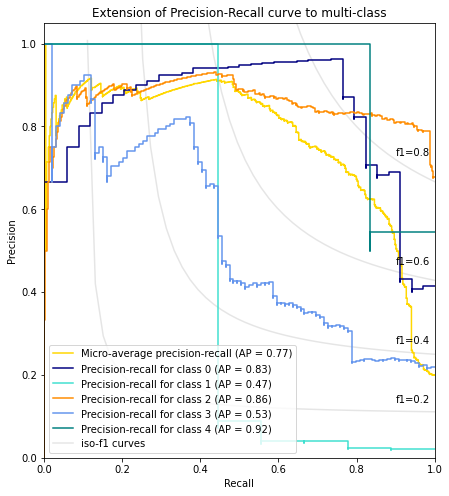

In [23]:
################################new section classification
import warnings
warnings.filterwarnings("ignore")
import sys
# measure = str(sys.argv[1])
measure = "macro"
print(measure)

import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import nltk
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from nltk.corpus import wordnet
nltk.download('omw-1.4')
import numpy as np
from sklearn.model_selection import train_test_split

import pickle

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import RandomOverSampler


from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import PrecisionRecallDisplay
    
# import argparse
# parser = argparse.ArgumentParser()
# parser.add_argument("--n", help="SDG K")
# args = parser.parse_args()
#
# number = int(args.n)
def get_category(x):
    if x == "Strongly Misaligned":
        return "Misaligned"
    elif x == "Strongly Aligned":
        return "Aligned"
    else:
        return x


def stem_sentences(x):
    tokenized_words = x.split(" ")
    tokenized_sentence = []
    for word in tokenized_words:
        if len(wordnet.synsets(word)) != 0:
            tokenized_sentence.append(porter.stem(word))
    tokenized_sentence = " ".join(tokenized_sentence)
    return tokenized_sentence

# creating bag of words representations from description
# Create a Bag of Words Model with Sklearn
# import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def get_BoW(df_wiki_node, column_name, param1=5, param2=.95):
    corpus = df_wiki_node[column_name]
    # sentence_1="*&^$This is a good job.{{I will not miss it for anything"
    # sentence_2="This is not good at all}}, hello my name misses a w"

#     CountVec = CountVectorizer(ngram_range=(1,2), # to use bigrams ngram_range=(2,2)
#                                stop_words='english')
    CountVec = CountVectorizer(min_df=param1,max_df=param2, ngram_range=(1, 2), stop_words='english')
    #transform
    Count_data = CountVec.fit_transform(corpus.values.tolist())

    #create dataframe
    BoW_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())
    # print(BoW_dataframe)
    return BoW_dataframe

df_merge = pd.read_csv("./temp_data2/news_features.csv")
column_features = ['magnitude_sum', 'magnitude_mean', 'magnitude_std',
       'magnitude_median', 'magnitude_var', 'magnitude_amin', 'magnitude_amax',
       'magnitude_percentile_5', 'magnitude_percentile_95',
       'magnitude_percentile_10', 'magnitude_percentile_90', 'score_sum',
       'score_mean', 'score_std', 'score_median', 'score_var', 'score_amin',
       'score_amax', 'score_percentile_5', 'score_percentile_95',
       'score_percentile_10', 'score_percentile_90', 'numMentions_sum',
       'numMentions_mean', 'numMentions_std', 'numMentions_median',
       'numMentions_var', 'numMentions_amin', 'numMentions_amax',
       'numMentions_percentile_5', 'numMentions_percentile_95',
       'numMentions_percentile_10', 'numMentions_percentile_90',
       'avgSalience_sum', 'avgSalience_mean', 'avgSalience_std',
       'avgSalience_median', 'avgSalience_var', 'avgSalience_amin',
       'avgSalience_amax', 'avgSalience_percentile_5',
       'avgSalience_percentile_95', 'avgSalience_percentile_10',
       'avgSalience_percentile_90', 'overall_score_sum', 'overall_score_mean',
       'overall_score_std', 'overall_score_median', 'overall_score_var',
       'overall_score_amin', 'overall_score_amax',
       'overall_score_percentile_5', 'overall_score_percentile_95',
       'overall_score_percentile_10', 'overall_score_percentile_90']
# number = 1
all_scores_all_SDGs = []
# for number in range(1,18):
number = 7
print("SDG ", number, " is calculating ...... ")
msci = pd.read_csv("./data/msci.csv")
msci2 = pd.read_csv("./data/msci2.csv").rename(columns={"SDG_03_OPS_ALIGNMENT":"SDG_03_OPER_ALIGNMENT"})

variable6 = "GICS Sector"

if number >= 10:
    variable5 = "SDG_{}_NET_ALIGNMENT".format(number)
else:
    variable5 = "SDG_0{}_NET_ALIGNMENT".format(number) # another thing

SDG1 = msci[["Company Name", "Company ID"]].dropna()
SDG2 = msci2[["ISSUER_NAME", "Figi", variable5]].dropna()

df_label = SDG1.merge(SDG2, left_on="Company ID", right_on="Figi")[["Company Name", variable5]]
df_label = df_label.rename(columns = {"Company Name": "company"})

df_sector = pd.read_csv("./data/Fundamental.csv")[["Company Name",variable6]].rename(columns={"Company Name": "company"})
df_merge2 = df_merge.merge(df_sector,on="company", how="right")
df_merge3 = df_merge2.merge(df_label, on="company", how="right")
df_merge3["concat_header_cleaned"] = df_merge3["concat_header_cleaned"].fillna("nothing")
df_merge3 = df_merge3.dropna(subset=[variable6,variable5])
df_merge3 = df_merge3.fillna(df_merge3.groupby(variable6).transform("mean"))
# added
df_wiki = pd.read_csv("./temp_data/wiki/wiki_product_info.csv",sep="\t")
df_wiki["product_info"] = df_wiki["product_info"].progress_apply(stem_sentences)
df_merge3 = df_merge3.merge(df_wiki[["company","product_info"]],on="company").dropna()
# added
df_entail = pd.read_csv("./temp_data/entail/entail_SDG_{}.csv".format(number),sep="\t")
df_entail["report_evidence"] = df_entail.groupby("company")["statement"].transform(lambda x: ','.join(x))
df_evidence = df_entail[["company","statement"]].drop_duplicates().rename(columns = {"statement":"report_evidence"})
df_merge3 = df_merge3.merge(df_evidence,on="company",how="left")
df_merge3["report_evidence"] = df_merge3["report_evidence"].fillna("nothing")
df_merge3["stem_product_info"] = df_merge3["product_info"].progress_apply(stem_sentences)
df_merge3["stem_report_evidence"] = df_merge3["report_evidence"].progress_apply(stem_sentences)


labels = df_merge3[variable5].values
features1 = pd.get_dummies(df_merge3[variable6])
features2 = get_BoW(df_merge3, "concat_header_cleaned", param1 = 10)
features3 = df_merge3[column_features]
features4 = get_BoW(df_merge3, "stem_product_info", param1 = 10)
# if number == 13:
#     features5 = get_BoW(df_merge3, "stem_report_evidence", 10)
# else:
#     features5 = get_BoW(df_merge3, "stem_report_evidence", param1 = 0)

if features2.shape[1] > 2000:
    features2 = get_BoW(df_merge3, "concat_header_cleaned", param1 = 30)
if features4.shape[1] > 2000:
    features4 = get_BoW(df_merge3, "stem_product_info", param1 = 30)
# if features5.shape[1] > 2000:
#     features5 = get_BoW(df_merge3, "stem_report_evidence", 20)

all_scores = []
#     ############################################# round 1
#     print("round1")
#     features = features1
#     # features = features2
#     # features = features3
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

#     ############################################# round 1
#     print("round2")
#     # features = features1
#     features = features2
#     # features = features3
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

#     ############################################# round 1
#     print("round3")
#     # features = features1
#     # features = features2
#     features = features3
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

#     ############################################# round 1
#     print("round4")
#     # features = features1
#     # features = features2
#     # features = features3
#     features = features4
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

# ############################################# round 1
# print("round5")
# # features = features1
# # features = features2
# # features = features3
# features = features5
# # features = np.concatenate((features1, features2),1)
# # features = np.concatenate((features1, features3),1)
# # features = np.concatenate((features2, features3),1)
# # features = np.concatenate((features1, features2, features3),1)
#
# X = features
# y = labels
# # define pipeline
# steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
# pipeline = Pipeline(steps=steps)
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
# score = mean(scores)
# print('F1 Score: %.3f' % score)
# all_scores.append(score)

# ############################################# round 2
# print("round6")
# # features = features1
# # features = features2
# # features = features3
# features = np.concatenate((features1, features2, features4),1)
# # features = np.concatenate((features1, features3),1)
# # features = np.concatenate((features2, features3),1)
# # features = np.concatenate((features1, features2, features3),1)
#
# X = features
# y = labels
# # define pipeline
# steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
# pipeline = Pipeline(steps=steps)
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
# score = mean(scores)
# print('F1 Score: %.3f' % score)
# all_scores.append(score)
#
# ############################################# round 3
# print("round3")
# # features = features1
# # features = features2
# # features = features3
# features = np.concatenate((features1, features3, features4),1)
# # features = np.concatenate((features1, features3),1)
# # features = np.concatenate((features2, features3),1)
# # features = np.concatenate((features1, features2, features3),1)
#
# X = features
# y = labels
# # define pipeline
# steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
# pipeline = Pipeline(steps=steps)
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
# score = mean(scores)
# print('F1 Score: %.3f' % score)
# all_scores.append(score)

############################################# round 4
print("round6")
# features = features1
# features = features2
# features = features3
features = np.concatenate((features1, features2, features3, features4),1)
# features = np.concatenate((features1, features3),1)
# features = np.concatenate((features2, features3),1)
# features = np.concatenate((features1, features2, features3),1)

X = features
y = labels

Y = label_binarize(y, classes=['Strongly Misaligned', 'Misaligned', 'Neutral', 'Aligned', 'Strongly Aligned'])

random_state = np.random.RandomState(0)
classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), LinearSVC(random_state=random_state))
)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)
# precision recall

# For each class
precision = dict()
recall = dict()
average_precision = dict()
n_classes = 5
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    Y_test.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")


# setup plot details
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc=3)
ax.set_title("Extension of Precision-Recall curve to multi-class")
plt.savefig('./results/PR_BRF_micro/{}.pdf'.format(number))
plt.show()



    # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)


#     all_scores_all_SDGs.append(all_scores)



# with open('./results/all/{}.pkl'.format(measure),'wb') as f:
#     pickle.dump(all_scores_all_SDGs, f, protocol=pickle.HIGHEST_PROTOCOL)

# import pickle
# with open("./data/embeddings_all1.pkl", "rb") as input_file:
#     e1 = pickle.load(input_file)


In [12]:
labels

['Macro-average precision-recall (AP = nan)',
 'Precision-recall for class 0 (AP = 0.01)',
 'Precision-recall for class 1 (AP = 0.01)',
 'Precision-recall for class 2 (AP = 0.08)',
 'Precision-recall for class 3 (AP = 0.98)',
 'Precision-recall for class 4 (AP = 0.32)',
 'iso-f1 curves']

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\qhuca\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


SDG  07. Affordable Clean Energy  is calculating ...... 


100%|████████████████████████████████████████████████████████████████████████████| 1239/1239 [00:00<00:00, 2664.32it/s]


round6


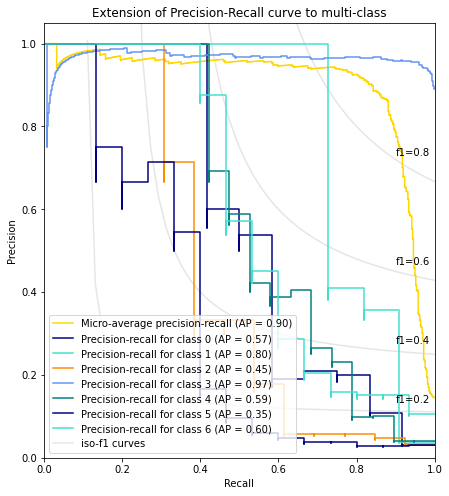

In [22]:
################################new section classification
import warnings
warnings.filterwarnings("ignore")
import sys
# measure = str(sys.argv[1])
# print(measure)
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import nltk
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from nltk.corpus import wordnet
nltk.download('omw-1.4')
import numpy as np
from sklearn.model_selection import train_test_split

import pickle

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

# import argparse
# parser = argparse.ArgumentParser()
# parser.add_argument("--n", help="SDG K")
# args = parser.parse_args()
#
# number = int(args.n)
def get_category(x):
    if x == "Strongly Misaligned":
        return "Misaligned"
    elif x == "Strongly Aligned":
        return "Aligned"
    else:
        return x


def stem_sentences(x):
    tokenized_words = x.split(" ")
    tokenized_sentence = []
    for word in tokenized_words:
        if len(wordnet.synsets(word)) != 0:
            tokenized_sentence.append(porter.stem(word))
    tokenized_sentence = " ".join(tokenized_sentence)
    return tokenized_sentence

# creating bag of words representations from description
# Create a Bag of Words Model with Sklearn
# import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def get_BoW(df_wiki_node, column_name, param1=5, param2=.95):
    corpus = df_wiki_node[column_name]
    # sentence_1="*&^$This is a good job.{{I will not miss it for anything"
    # sentence_2="This is not good at all}}, hello my name misses a w"

#     CountVec = CountVectorizer(ngram_range=(1,2), # to use bigrams ngram_range=(2,2)
#                                stop_words='english')
    CountVec = CountVectorizer(min_df=param1,max_df=param2, ngram_range=(1, 2), stop_words='english')
    #transform
    Count_data = CountVec.fit_transform(corpus.values.tolist())

    #create dataframe
    BoW_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())
    # print(BoW_dataframe)
    return BoW_dataframe

df_merge = pd.read_csv("./temp_data2/news_features.csv")
column_features = ['magnitude_sum', 'magnitude_mean', 'magnitude_std',
       'magnitude_median', 'magnitude_var', 'magnitude_amin', 'magnitude_amax',
       'magnitude_percentile_5', 'magnitude_percentile_95',
       'magnitude_percentile_10', 'magnitude_percentile_90', 'score_sum',
       'score_mean', 'score_std', 'score_median', 'score_var', 'score_amin',
       'score_amax', 'score_percentile_5', 'score_percentile_95',
       'score_percentile_10', 'score_percentile_90', 'numMentions_sum',
       'numMentions_mean', 'numMentions_std', 'numMentions_median',
       'numMentions_var', 'numMentions_amin', 'numMentions_amax',
       'numMentions_percentile_5', 'numMentions_percentile_95',
       'numMentions_percentile_10', 'numMentions_percentile_90',
       'avgSalience_sum', 'avgSalience_mean', 'avgSalience_std',
       'avgSalience_median', 'avgSalience_var', 'avgSalience_amin',
       'avgSalience_amax', 'avgSalience_percentile_5',
       'avgSalience_percentile_95', 'avgSalience_percentile_10',
       'avgSalience_percentile_90', 'overall_score_sum', 'overall_score_mean',
       'overall_score_std', 'overall_score_median', 'overall_score_var',
       'overall_score_amin', 'overall_score_amax',
       'overall_score_percentile_5', 'overall_score_percentile_95',
       'overall_score_percentile_10', 'overall_score_percentile_90']
# number = 1


df = pd.read_csv("./data/msci3.csv")
df1 = df[["Company Name", "Company ID", '01. No Poverty', '02. Zero Hunger', '03. Good Health & Wellbeing', '04. Quality Education', '05. Gender Equality Description', '06. Clean Water and Sanitation', '07. Affordable Clean Energy', '08. Decent Work and Economic Growth', '09. Industry Innovation and Infrastructure', '10. Reduced Inequalities', '11. Sustainable Cities and Communities', '12. Responsible Consumption and Production', '13. Climate Action', '14. Life Below Water', '15. Life on Land', '16. Peace, Justice & Strong Institutions', '17. Partnership for the Goals']].fillna('0')
df1 = df1.rename(columns = {"Company Name": "company"})
df1 = df1.replace('\xa0', '0')
df1 = df1.replace(' ', '0')

all_scores_all_SDGs = []
all_sdgs = ['01. No Poverty', '02. Zero Hunger', '03. Good Health & Wellbeing', '04. Quality Education', '05. Gender Equality Description', '06. Clean Water and Sanitation', '07. Affordable Clean Energy', '08. Decent Work and Economic Growth', '09. Industry Innovation and Infrastructure', '10. Reduced Inequalities', '11. Sustainable Cities and Communities', '12. Responsible Consumption and Production', '13. Climate Action', '14. Life Below Water', '15. Life on Land', '16. Peace, Justice & Strong Institutions', '17. Partnership for the Goals']

# for sdg, number in zip(all_sdgs, range(1,17)):
sdg = '07. Affordable Clean Energy'
number = 7
print("SDG ", sdg, " is calculating ...... ")

variable6 = "GICS Sector"

variable5 = sdg

df_label = df1[["company",sdg]]

df_sector = pd.read_csv("./data/Fundamental.csv")[["Company Name",variable6]].rename(columns={"Company Name": "company"})
df_merge2 = df_merge.merge(df_sector,on="company", how="right")
df_merge3 = df_merge2.merge(df_label, on="company", how="right")
df_merge3["concat_header_cleaned"] = df_merge3["concat_header_cleaned"].fillna("nothing")
df_merge3 = df_merge3.dropna(subset=[variable6,variable5])
df_merge3 = df_merge3.fillna(df_merge3.groupby(variable6).transform("mean"))
# added
df_wiki = pd.read_csv("./temp_data/wiki/wiki_product_info.csv",sep="\t")
df_wiki["product_info"] = df_wiki["product_info"].progress_apply(stem_sentences)
df_merge3 = df_merge3.merge(df_wiki[["company","product_info"]],on="company").dropna()
# added
df_entail = pd.read_csv("./temp_data/entail/entail_SDG_{}.csv".format(number),sep="\t")
df_entail["report_evidence"] = df_entail.groupby("company")["statement"].transform(lambda x: ','.join(x))
df_evidence = df_entail[["company","statement"]].drop_duplicates().rename(columns = {"statement":"report_evidence"})
df_merge3 = df_merge3.merge(df_evidence,on="company",how="left")
df_merge3["report_evidence"] = df_merge3["report_evidence"].fillna("nothing")
df_merge3["stem_product_info"] = df_merge3["product_info"].progress_apply(stem_sentences)
df_merge3["stem_report_evidence"] = df_merge3["report_evidence"].progress_apply(stem_sentences)


labels = df_merge3[variable5].values
features1 = pd.get_dummies(df_merge3[variable6])
features2 = get_BoW(df_merge3, "concat_header_cleaned", param1 = 10)
features3 = df_merge3[column_features]
features4 = get_BoW(df_merge3, "stem_product_info", param1 = 10)
if number == 13:
    features5 = get_BoW(df_merge3, "stem_report_evidence", 10)
else:
    features5 = get_BoW(df_merge3, "stem_report_evidence", param1 = 0)

if features2.shape[1] > 2000:
    features2 = get_BoW(df_merge3, "concat_header_cleaned", param1 = 30)
if features4.shape[1] > 2000:
    features4 = get_BoW(df_merge3, "stem_product_info", param1 = 30)
if features5.shape[1] > 2000:
    features5 = get_BoW(df_merge3, "stem_report_evidence", 20)

all_scores = []
#     ############################################# round 1
#     print("round1")
#     features = features1
#     # features = features2
#     # features = features3
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

#     ############################################# round 1
#     print("round2")
#     # features = features1
#     features = features2
#     # features = features3
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

#     ############################################# round 1
#     print("round3")
#     # features = features1
#     # features = features2
#     features = features3
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

#     ############################################# round 1
#     print("round4")
#     # features = features1
#     # features = features2
#     # features = features3
#     features = features4
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

#     ############################################# round 1
#     print("round5")
#     # features = features1
#     # features = features2
#     # features = features3
#     features = features5
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

#     # ############################################# round 2
#     # print("round6")
#     # # features = features1
#     # # features = features2
#     # # features = features3
#     # features = np.concatenate((features1, features2, features4),1)
#     # # features = np.concatenate((features1, features3),1)
#     # # features = np.concatenate((features2, features3),1)
#     # # features = np.concatenate((features1, features2, features3),1)
#     #
#     # X = features
#     # y = labels
#     # # define pipeline
#     # steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     # pipeline = Pipeline(steps=steps)
#     # # evaluate pipeline
#     # cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     # scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     # score = mean(scores)
#     # print('F1 Score: %.3f' % score)
#     # all_scores.append(score)
#     #
#     # ############################################# round 3
#     # print("round3")
#     # # features = features1
#     # # features = features2
#     # # features = features3
#     # features = np.concatenate((features1, features3, features4),1)
#     # # features = np.concatenate((features1, features3),1)
#     # # features = np.concatenate((features2, features3),1)
#     # # features = np.concatenate((features1, features2, features3),1)
#     #
#     # X = features
#     # y = labels
#     # # define pipeline
#     # steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     # pipeline = Pipeline(steps=steps)
#     # # evaluate pipeline
#     # cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     # scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     # score = mean(scores)
#     # print('F1 Score: %.3f' % score)
#     # all_scores.append(score)

############################################# round 4
print("round6")
# features = features1
# features = features2
# features = features3
features = np.concatenate((features1, features2, features3, features4, features5),1)
# features = np.concatenate((features1, features3),1)
# features = np.concatenate((features2, features3),1)
# features = np.concatenate((features1, features2, features3),1)

X = features
y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)    
Y = label_binarize(y, classes=['-3','-2','-1','0','1','2','3'])

random_state = np.random.RandomState(0)
classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), LinearSVC(random_state=random_state))
)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)
# precision recall

# For each class
precision = dict()
recall = dict()
average_precision = dict()
n_classes = 7
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    Y_test.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")


# setup plot details
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc=3)
ax.set_title("Extension of Precision-Recall curve to multi-class")
plt.savefig('./results/PR_BRF_micro/{}_rsam.pdf'.format(number))
plt.show()


#     all_scores_all_SDGs.append(all_scores)


# with open('./results/all-rsam/{}.pkl'.format(measure),'wb') as f:
#     pickle.dump(all_scores_all_SDGs, f, protocol=pickle.HIGHEST_PROTOCOL)

# import pickle
# with open("./data/embeddings_all1.pkl", "rb") as input_file:
#     e1 = pickle.load(input_file)


micro
SDG  1  is calculating ...... 


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\qhuca\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
100%|█████████████████████████████████████████████████████████████████████████████| 902/902 [00:00<00:00, 20977.45it/s]


round6


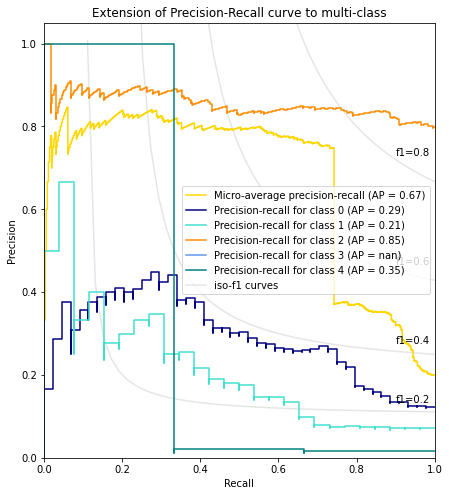

SDG  2  is calculating ...... 


100%|█████████████████████████████████████████████████████████████████████████████| 910/910 [00:00<00:00, 18571.51it/s]


round6


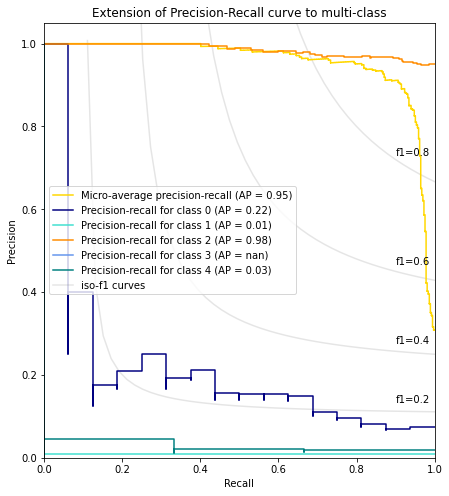

SDG  3  is calculating ...... 


100%|████████████████████████████████████████████████████████████████████████████| 1602/1602 [00:00<00:00, 1871.42it/s]


round6


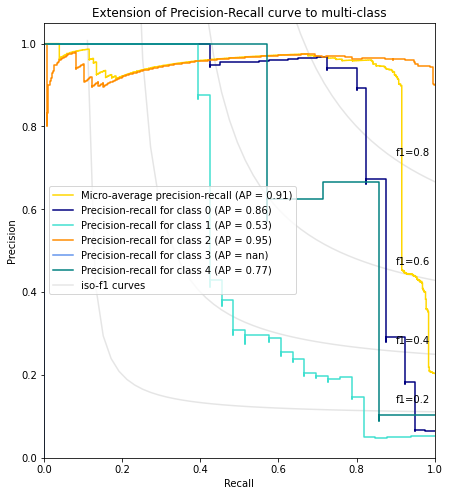

SDG  4  is calculating ...... 


100%|██████████████████████████████████████████████████████████████████████████████| 942/942 [00:00<00:00, 5962.07it/s]


round6


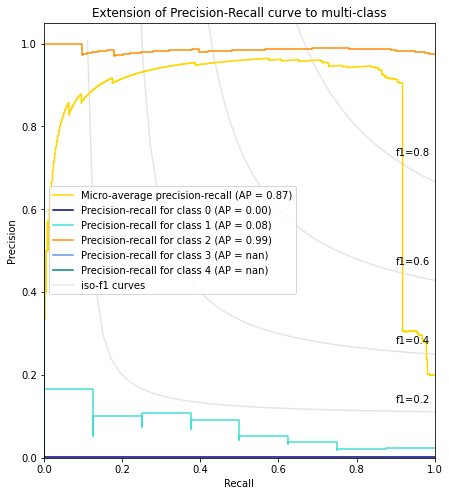

SDG  5  is calculating ...... 


100%|████████████████████████████████████████████████████████████████████████████| 1141/1141 [00:00<00:00, 2881.33it/s]


round6


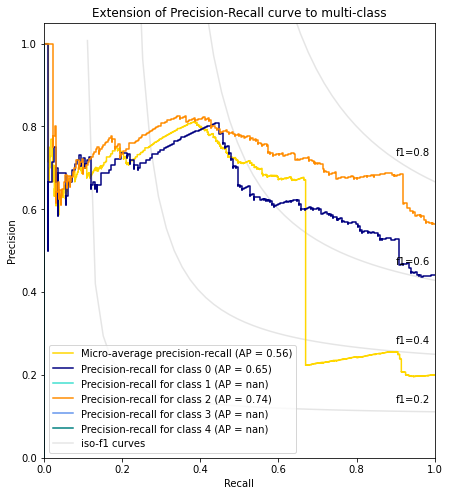

SDG  6  is calculating ...... 


100%|████████████████████████████████████████████████████████████████████████████| 1026/1026 [00:00<00:00, 3857.27it/s]


round6


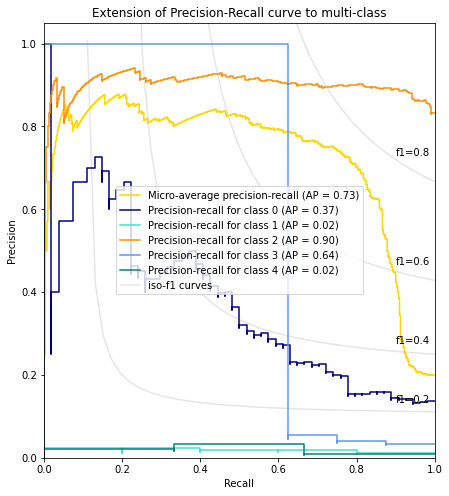

SDG  7  is calculating ...... 


100%|████████████████████████████████████████████████████████████████████████████| 1135/1135 [00:00<00:00, 2456.50it/s]


round6


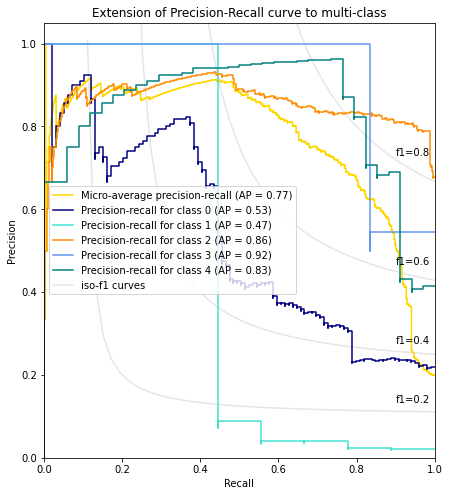

SDG  8  is calculating ...... 


100%|██████████████████████████████████████████████████████████████████████████████| 996/996 [00:00<00:00, 3845.48it/s]


round6


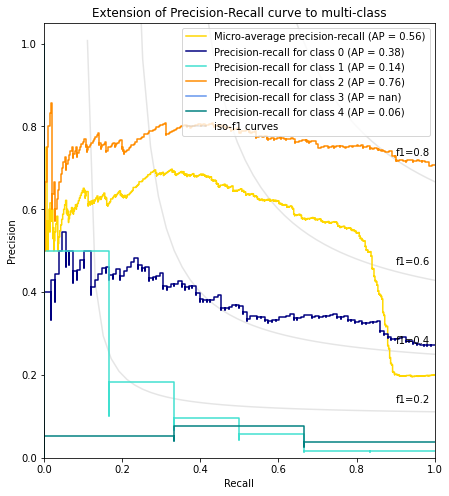

SDG  9  is calculating ...... 


100%|████████████████████████████████████████████████████████████████████████████| 1063/1063 [00:00<00:00, 2579.87it/s]


round6


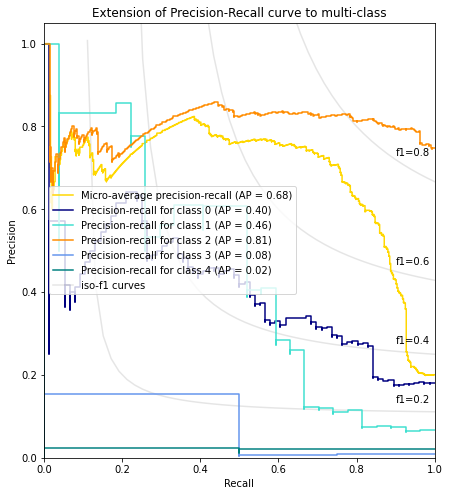

SDG  10  is calculating ...... 


100%|██████████████████████████████████████████████████████████████████████████████| 920/920 [00:00<00:00, 9887.03it/s]


round6


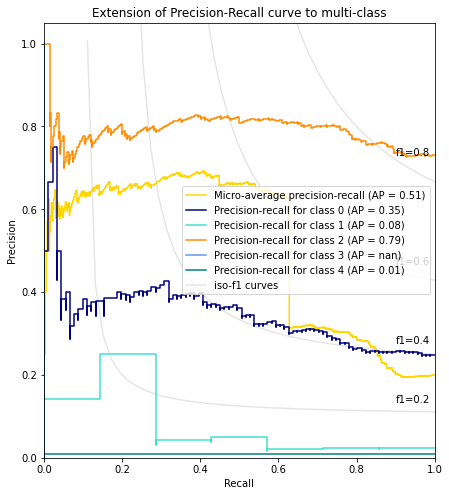

SDG  11  is calculating ...... 


100%|██████████████████████████████████████████████████████████████████████████████| 996/996 [00:00<00:00, 4764.92it/s]


round6


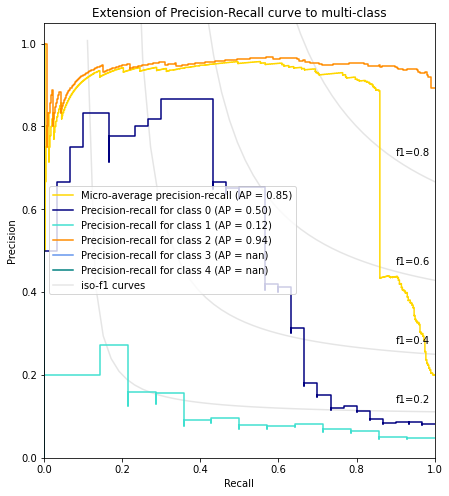

SDG  12  is calculating ...... 


100%|████████████████████████████████████████████████████████████████████████████| 1646/1646 [00:01<00:00, 1181.62it/s]


round6


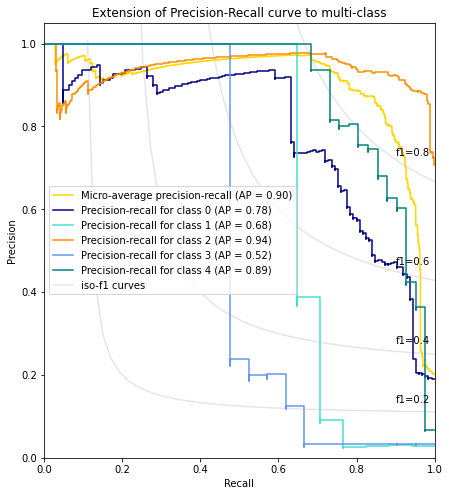

SDG  13  is calculating ...... 


100%|████████████████████████████████████████████████████████████████████████████| 4880/4880 [00:03<00:00, 1254.50it/s]


round6


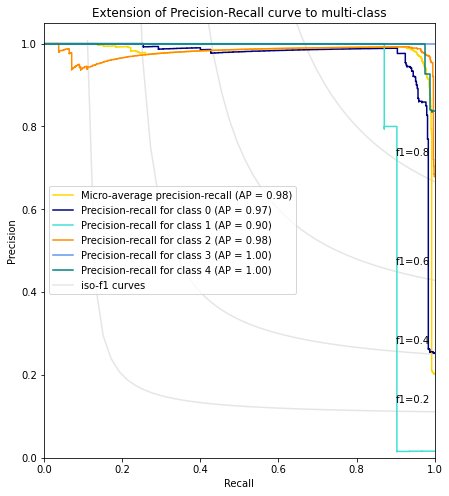

SDG  14  is calculating ...... 


100%|█████████████████████████████████████████████████████████████████████████████| 906/906 [00:00<00:00, 15357.67it/s]


round6


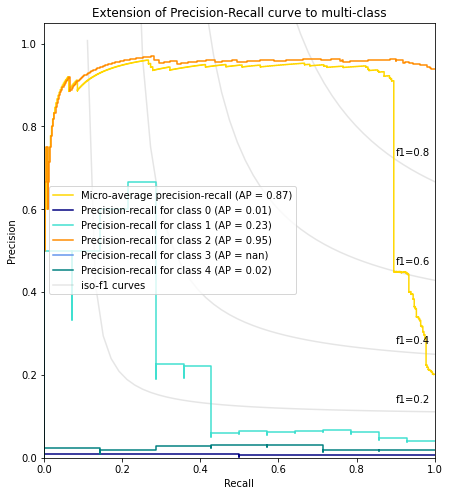

SDG  15  is calculating ...... 


100%|██████████████████████████████████████████████████████████████████████████████| 908/908 [00:00<00:00, 9659.76it/s]


round6


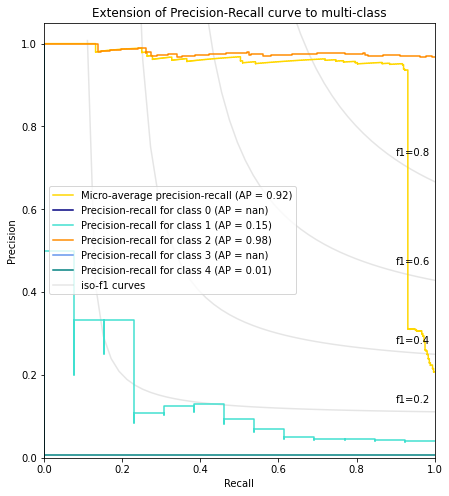

SDG  16  is calculating ...... 


100%|██████████████████████████████████████████████████████████████████████████████| 940/940 [00:00<00:00, 5874.70it/s]


round6


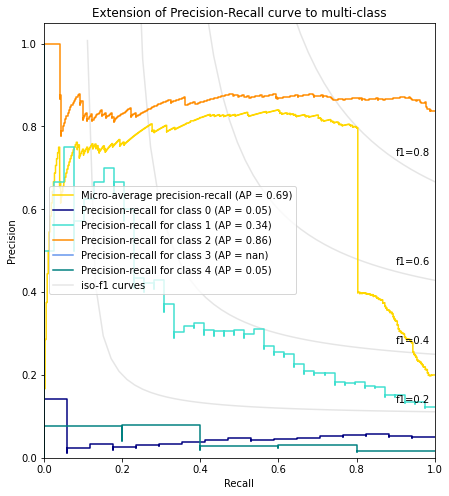

SDG  17  is calculating ...... 


100%|████████████████████████████████████████████████████████████████████████████| 1173/1173 [00:00<00:00, 1654.44it/s]


round6


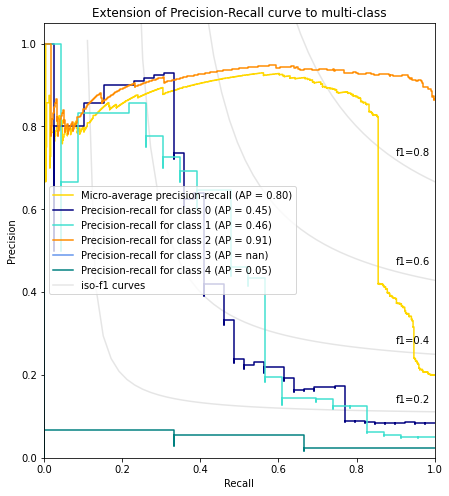

In [2]:
################################new section classification
import warnings
warnings.filterwarnings("ignore")
import sys
# measure = str(sys.argv[1])
measure = "micro"
print(measure)

import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import nltk
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from nltk.corpus import wordnet
nltk.download('omw-1.4')
import numpy as np
from sklearn.model_selection import train_test_split

import pickle

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import RandomOverSampler


from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import PrecisionRecallDisplay
    
# import argparse
# parser = argparse.ArgumentParser()
# parser.add_argument("--n", help="SDG K")
# args = parser.parse_args()
#
# number = int(args.n)
def get_category(x):
    if x == "Strongly Misaligned":
        return "Misaligned"
    elif x == "Strongly Aligned":
        return "Aligned"
    else:
        return x


def stem_sentences(x):
    tokenized_words = x.split(" ")
    tokenized_sentence = []
    for word in tokenized_words:
        if len(wordnet.synsets(word)) != 0:
            tokenized_sentence.append(porter.stem(word))
    tokenized_sentence = " ".join(tokenized_sentence)
    return tokenized_sentence

# creating bag of words representations from description
# Create a Bag of Words Model with Sklearn
# import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def get_BoW(df_wiki_node, column_name, param1=5, param2=.95):
    corpus = df_wiki_node[column_name]
    # sentence_1="*&^$This is a good job.{{I will not miss it for anything"
    # sentence_2="This is not good at all}}, hello my name misses a w"

#     CountVec = CountVectorizer(ngram_range=(1,2), # to use bigrams ngram_range=(2,2)
#                                stop_words='english')
    CountVec = CountVectorizer(min_df=param1,max_df=param2, ngram_range=(1, 2), stop_words='english')
    #transform
    Count_data = CountVec.fit_transform(corpus.values.tolist())

    #create dataframe
    BoW_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())
    # print(BoW_dataframe)
    return BoW_dataframe

df_merge = pd.read_csv("./temp_data2/news_features.csv")
column_features = ['magnitude_sum', 'magnitude_mean', 'magnitude_std',
       'magnitude_median', 'magnitude_var', 'magnitude_amin', 'magnitude_amax',
       'magnitude_percentile_5', 'magnitude_percentile_95',
       'magnitude_percentile_10', 'magnitude_percentile_90', 'score_sum',
       'score_mean', 'score_std', 'score_median', 'score_var', 'score_amin',
       'score_amax', 'score_percentile_5', 'score_percentile_95',
       'score_percentile_10', 'score_percentile_90', 'numMentions_sum',
       'numMentions_mean', 'numMentions_std', 'numMentions_median',
       'numMentions_var', 'numMentions_amin', 'numMentions_amax',
       'numMentions_percentile_5', 'numMentions_percentile_95',
       'numMentions_percentile_10', 'numMentions_percentile_90',
       'avgSalience_sum', 'avgSalience_mean', 'avgSalience_std',
       'avgSalience_median', 'avgSalience_var', 'avgSalience_amin',
       'avgSalience_amax', 'avgSalience_percentile_5',
       'avgSalience_percentile_95', 'avgSalience_percentile_10',
       'avgSalience_percentile_90', 'overall_score_sum', 'overall_score_mean',
       'overall_score_std', 'overall_score_median', 'overall_score_var',
       'overall_score_amin', 'overall_score_amax',
       'overall_score_percentile_5', 'overall_score_percentile_95',
       'overall_score_percentile_10', 'overall_score_percentile_90']
# number = 1
all_scores_all_SDGs = []
for number in range(1,18):
    print("SDG ", number, " is calculating ...... ")
    msci = pd.read_csv("./data/msci.csv")
    msci2 = pd.read_csv("./data/msci2.csv").rename(columns={"SDG_03_OPS_ALIGNMENT":"SDG_03_OPER_ALIGNMENT"})

    variable6 = "GICS Sector"

    if number >= 10:
        variable5 = "SDG_{}_NET_ALIGNMENT".format(number)
    else:
        variable5 = "SDG_0{}_NET_ALIGNMENT".format(number) # another thing

    SDG1 = msci[["Company Name", "Company ID"]].dropna()
    SDG2 = msci2[["ISSUER_NAME", "Figi", variable5]].dropna()

    df_label = SDG1.merge(SDG2, left_on="Company ID", right_on="Figi")[["Company Name", variable5]]
    df_label = df_label.rename(columns = {"Company Name": "company"})

    df_sector = pd.read_csv("./data/Fundamental.csv")[["Company Name",variable6]].rename(columns={"Company Name": "company"})
    df_merge2 = df_merge.merge(df_sector,on="company", how="right")
    df_merge3 = df_merge2.merge(df_label, on="company", how="right")
    df_merge3["concat_header_cleaned"] = df_merge3["concat_header_cleaned"].fillna("nothing")
    df_merge3 = df_merge3.dropna(subset=[variable6,variable5])
    df_merge3 = df_merge3.fillna(df_merge3.groupby(variable6).transform("mean"))
    # added
    df_wiki = pd.read_csv("./temp_data/wiki/wiki_product_info.csv",sep="\t")
    df_wiki["product_info"] = df_wiki["product_info"].progress_apply(stem_sentences)
    df_merge3 = df_merge3.merge(df_wiki[["company","product_info"]],on="company").dropna()
    # added
    df_entail = pd.read_csv("./temp_data/entail/entail_SDG_{}.csv".format(number),sep="\t")
    df_entail["report_evidence"] = df_entail.groupby("company")["statement"].transform(lambda x: ','.join(x))
    df_evidence = df_entail[["company","statement"]].drop_duplicates().rename(columns = {"statement":"report_evidence"})
    df_merge3 = df_merge3.merge(df_evidence,on="company",how="left")
    df_merge3["report_evidence"] = df_merge3["report_evidence"].fillna("nothing")
    df_merge3["stem_product_info"] = df_merge3["product_info"].progress_apply(stem_sentences)
    df_merge3["stem_report_evidence"] = df_merge3["report_evidence"].progress_apply(stem_sentences)


    labels = df_merge3[variable5].values
    features1 = pd.get_dummies(df_merge3[variable6])
    features2 = get_BoW(df_merge3, "concat_header_cleaned", param1 = 10)
    features3 = df_merge3[column_features]
    features4 = get_BoW(df_merge3, "stem_product_info", param1 = 10)
    # if number == 13:
    #     features5 = get_BoW(df_merge3, "stem_report_evidence", 10)
    # else:
    #     features5 = get_BoW(df_merge3, "stem_report_evidence", param1 = 0)

    if features2.shape[1] > 2000:
        features2 = get_BoW(df_merge3, "concat_header_cleaned", param1 = 30)
    if features4.shape[1] > 2000:
        features4 = get_BoW(df_merge3, "stem_product_info", param1 = 30)
    # if features5.shape[1] > 2000:
    #     features5 = get_BoW(df_merge3, "stem_report_evidence", 20)

    all_scores = []
#     ############################################# round 1
#     print("round1")
#     features = features1
#     # features = features2
#     # features = features3
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

#     ############################################# round 1
#     print("round2")
#     # features = features1
#     features = features2
#     # features = features3
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

#     ############################################# round 1
#     print("round3")
#     # features = features1
#     # features = features2
#     features = features3
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

#     ############################################# round 1
#     print("round4")
#     # features = features1
#     # features = features2
#     # features = features3
#     features = features4
#     # features = np.concatenate((features1, features2),1)
#     # features = np.concatenate((features1, features3),1)
#     # features = np.concatenate((features2, features3),1)
#     # features = np.concatenate((features1, features2, features3),1)

#     X = features
#     y = labels
#     # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)

    # ############################################# round 1
    # print("round5")
    # # features = features1
    # # features = features2
    # # features = features3
    # features = features5
    # # features = np.concatenate((features1, features2),1)
    # # features = np.concatenate((features1, features3),1)
    # # features = np.concatenate((features2, features3),1)
    # # features = np.concatenate((features1, features2, features3),1)
    #
    # X = features
    # y = labels
    # # define pipeline
    # steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
    # pipeline = Pipeline(steps=steps)
    # # evaluate pipeline
    # cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
    # score = mean(scores)
    # print('F1 Score: %.3f' % score)
    # all_scores.append(score)

    # ############################################# round 2
    # print("round6")
    # # features = features1
    # # features = features2
    # # features = features3
    # features = np.concatenate((features1, features2, features4),1)
    # # features = np.concatenate((features1, features3),1)
    # # features = np.concatenate((features2, features3),1)
    # # features = np.concatenate((features1, features2, features3),1)
    #
    # X = features
    # y = labels
    # # define pipeline
    # steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
    # pipeline = Pipeline(steps=steps)
    # # evaluate pipeline
    # cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
    # score = mean(scores)
    # print('F1 Score: %.3f' % score)
    # all_scores.append(score)
    #
    # ############################################# round 3
    # print("round3")
    # # features = features1
    # # features = features2
    # # features = features3
    # features = np.concatenate((features1, features3, features4),1)
    # # features = np.concatenate((features1, features3),1)
    # # features = np.concatenate((features2, features3),1)
    # # features = np.concatenate((features1, features2, features3),1)
    #
    # X = features
    # y = labels
    # # define pipeline
    # steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
    # pipeline = Pipeline(steps=steps)
    # # evaluate pipeline
    # cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
    # score = mean(scores)
    # print('F1 Score: %.3f' % score)
    # all_scores.append(score)

    ############################################# round 4
    print("round6")
    # features = features1
    # features = features2
    # features = features3
    features = np.concatenate((features1, features2, features3, features4),1)
    # features = np.concatenate((features1, features3),1)
    # features = np.concatenate((features2, features3),1)
    # features = np.concatenate((features1, features2, features3),1)

    X = features
    y = labels
    
    Y = label_binarize(y, classes=['Aligned', 'Misaligned', 'Neutral', 'Strongly Aligned', 'Strongly Misaligned'])

    random_state = np.random.RandomState(0)
    classifier = OneVsRestClassifier(
        make_pipeline(StandardScaler(), LinearSVC(random_state=random_state))
    )

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

    classifier.fit(X_train, Y_train)
    y_score = classifier.decision_function(X_test)
    # precision recall
    
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    n_classes = 5
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(
        Y_test.ravel(), y_score.ravel()
    )
    average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")
    

    # setup plot details
    colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

    _, ax = plt.subplots(figsize=(7, 8))

    f_scores = np.linspace(0.2, 0.8, num=4)
    lines, labels = [], []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
        plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

    display = PrecisionRecallDisplay(
        recall=recall["micro"],
        precision=precision["micro"],
        average_precision=average_precision["micro"],
    )
    display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

    for i, color in zip(range(n_classes), colors):
        display = PrecisionRecallDisplay(
            recall=recall[i],
            precision=precision[i],
            average_precision=average_precision[i],
        )
        display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

    # add the legend for the iso-f1 curves
    handles, labels = display.ax_.get_legend_handles_labels()
    handles.extend([l])
    labels.extend(["iso-f1 curves"])
    # set the legend and the axes
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.legend(handles=handles, labels=labels, loc="best")
    ax.set_title("Extension of Precision-Recall curve to multi-class")

    
    plt.savefig('./results/PR_BRF_micro/{}.pdf'.format(number))
    plt.show()


    # define pipeline
#     steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('F1 Score: %.3f' % score)
#     all_scores.append(score)


#     all_scores_all_SDGs.append(all_scores)



# with open('./results/all/{}.pkl'.format(measure),'wb') as f:
#     pickle.dump(all_scores_all_SDGs, f, protocol=pickle.HIGHEST_PROTOCOL)

# import pickle
# with open("./data/embeddings_all1.pkl", "rb") as input_file:
#     e1 = pickle.load(input_file)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

Y = label_binarize(y, classes=['Aligned', 'Misaligned', 'Neutral', 'Strongly Aligned', 'Strongly Misaligned'])

random_state = np.random.RandomState(0)
classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), LinearSVC(random_state=random_state))
)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

In [38]:
Y

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

In [34]:
# precision recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
n_classes = 5
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    Y_test.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")

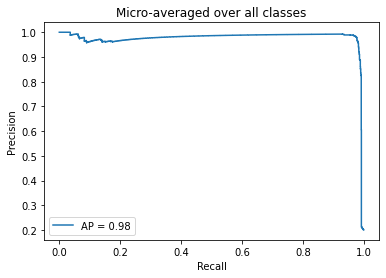

In [36]:
# from sklearn.metrics import PrecisionRecallDisplay

# display = PrecisionRecallDisplay(
#     recall=recall["micro"],
#     precision=precision["micro"],
#     average_precision=average_precision["micro"],
# )
# display.plot()
# _ = display.ax_.set_title("Micro-averaged over all classes")

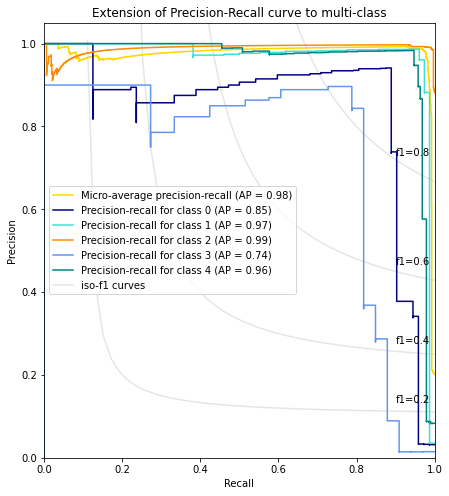

In [37]:
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import PrecisionRecallDisplay
# setup plot details
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()
plt.savefig('./results/PR/{}.pdf')

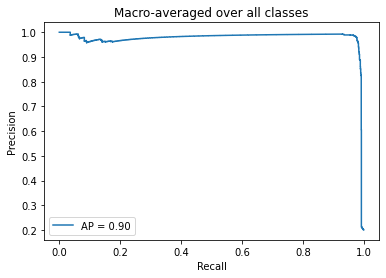

In [39]:
# precision recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
n_classes = 5
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["macro"], recall["macro"], _ = precision_recall_curve(
    Y_test.ravel(), y_score.ravel()
)
average_precision["macro"] = average_precision_score(Y_test, y_score, average="macro")
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay(
    recall=recall["macro"],
    precision=precision["macro"],
    average_precision=average_precision["macro"],
)
display.plot()
_ = display.ax_.set_title("Macro-averaged over all classes")


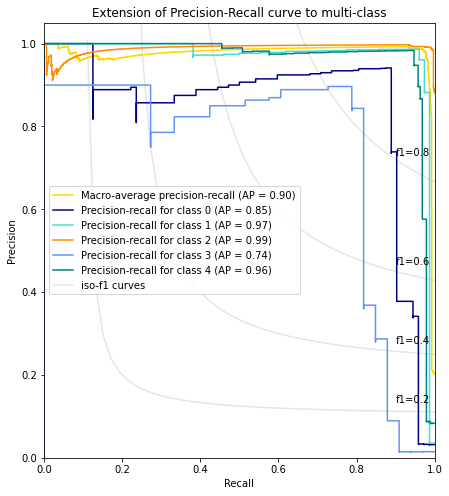

In [40]:
import matplotlib.pyplot as plt
from itertools import cycle

# setup plot details
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["macro"],
    precision=precision["macro"],
    average_precision=average_precision["macro"],
)
display.plot(ax=ax, name="Macro-average precision-recall", color="gold")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

In [3]:
df_merge3[df_merge3.company=="Mowi ASA"]

company SDG_13_PROD_ALIGNMENT  \
3372  Mowi ASA               Neutral   
3373  Mowi ASA               Neutral   
3374  Mowi ASA               Neutral   
3375  Mowi ASA               Neutral   

                                           product_info       GICS Sector  \
3372  firm new brand wa chosen reflect each it three...  Consumer Staples   
3373  firm new brand wa chosen reflect each it three...  Consumer Staples   
3374  firm new brand wa chosen reflect each it three...  Consumer Staples   
3375  firm new brand wa chosen reflect each it three...  Consumer Staples   

                                        report_evidence  \
3372  We pursue an integrated sustainability strateg...   
3373  With the allocation of our green bond proceeds...   
3374  The Blue Revolution Plan will help us to focus...   
3375  This plan will allow us to achieve our goal of...   

                                      stem_product_info  \
3372  firm new brand wa chosen reflect each it three...   
3373  firm new brand wa chosen reflect each it three...   
3374  firm new brand wa chosen reflect each it three...   
3375  firm new brand wa chosen reflect each it three...   

                                   stem_report_evidence  
3372  pursu an integr sustain strategi align unit na...  
3373  alloc green bond support pari agreement progre...  
3374  blue revolut plan will help us focu on be part...  
3375  plan will allow us achiev goal produc more foo...

In [12]:
all_scores_all_SDGs

[[0.9082310455567775,
  0.8920825206705708,
  0.8721748824266091,
  0.8813740484925991]]

In [1]:
# plot classification results
import pickle
import pandas as pd
    
def product(path, column_names = ['SDG_01','SDG_02', 'SDG_03','SDG_04', 'SDG_05','SDG_06', 'SDG_07','SDG_08', 'SDG_09','SDG_10', 'SDG_11','SDG_12', 'SDG_13','SDG_14', 'SDG_15']):    
    with open(path, "rb") as input_file:
        SDG_results = pickle.load(input_file)
    df_temp1 = pd.DataFrame(SDG_results, columns = ["sector", "wiki_product", "report_evi", "sector + wiki_product", "sector + report_evi", "wiki_product + report_evi", "all"]).T
    df_temp1.columns = column_names
    return df_temp1

def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    data = data.replace('%','', regex=True).astype(float)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)
    
highlight = lambda x: ['background: red' if x.name in ["sector"] else '' for i in x]



In [ ]:
product('./results/product/f1_micro.pkl')

In [2]:
product('./results/product/f1_micro.pkl').T.style.apply(highlight_max, axis=1)

In [3]:
product('./results/product/f1_macro.pkl').style.apply(highlight_max).apply(highlight, axis=1)

In [9]:
product('./results/product/f1_micro.pkl').to_csv("./results/excel/product_micro.csv")

In [10]:
product('./results/product/f1_macro.pkl').to_csv("./results/excel/product_macro.csv")

In [4]:
# plot classification results
import pickle
import pandas as pd
    
def product(path, column_names = ['SDG_01','SDG_02', 'SDG_03','SDG_04', 'SDG_05','SDG_06', 'SDG_07','SDG_08', 'SDG_09','SDG_10', 'SDG_11','SDG_12', 'SDG_13','SDG_14', 'SDG_15','SDG16','SDG17']):    
    with open(path, "rb") as input_file:
        SDG_results = pickle.load(input_file)
    df_temp1 = pd.DataFrame(SDG_results, columns = ["MSCI sector", "news header", "sentiment", "wiki_product", "all"]).T
    df_temp1.columns = column_names
    return df_temp1

def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    data = data.replace('%','', regex=True).astype(float)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)
    
highlight = lambda x: ['background: red' if x.name in ["sector"] else '' for i in x]



In [33]:
product('./results/news/f1_micro.pkl').T.to_csv("./results/excel/news_micro.csv")
product('./results/news/f1_micro.pkl').T.style.apply(highlight_max, axis=1)

In [35]:
product('./results/news/f1_macro.pkl').T.to_csv("./results/excel/news_macro.csv")
product('./results/news/f1_macro.pkl').T.style.apply(highlight_max, axis=1)

In [36]:
# plot classification results
import pickle
import pandas as pd
    
def product(path, column_names = ['SDG_01','SDG_02', 'SDG_03','SDG_04', 'SDG_05','SDG_06', 'SDG_07','SDG_08', 'SDG_09','SDG_10', 'SDG_11','SDG_12', 'SDG_13','SDG_14', 'SDG_15','SDG16','SDG17']):    
    with open(path, "rb") as input_file:
        SDG_results = pickle.load(input_file)
    df_temp1 = pd.DataFrame(SDG_results, columns = ["MSCI sector", "news header", "sentiment", "wiki_product", "all"]).T
    df_temp1.columns = column_names
    return df_temp1

def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    data = data.replace('%','', regex=True).astype(float)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)
    
highlight = lambda x: ['background: red' if x.name in ["sector"] else '' for i in x]



In [38]:
product('./results/all/f1_micro.pkl').T.to_csv("./results/excel/all_msci_micro.csv")
product('./results/all/f1_micro.pkl').T.style.apply(highlight_max, axis=1)

In [39]:
product('./results/all/f1_macro.pkl').T.to_csv("./results/excel/all_msci_macro.csv")
product('./results/all/f1_macro.pkl').T.style.apply(highlight_max, axis=1)

In [7]:
# plot classification results
import pickle
import pandas as pd
    
def product(path, column_names = ['SDG_01','SDG_02', 'SDG_03','SDG_04', 'SDG_05','SDG_06', 'SDG_07','SDG_08', 'SDG_09','SDG_10', 'SDG_11','SDG_12', 'SDG_13','SDG_14', 'SDG_15','SDG16','SDG17']):    
    with open(path, "rb") as input_file:
        SDG_results = pickle.load(input_file)
    df_temp1 = pd.DataFrame(SDG_results, columns = ["MSCI sector", "news header", "sentiment", "wiki_product", "report evidence", "all"]).T
    df_temp1.columns = column_names
    return df_temp1

def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    data = data.replace('%','', regex=True).astype(float)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)
    
highlight = lambda x: ['background: red' if x.name in ["sector"] else '' for i in x]



In [51]:
product('./results/all-rsam/f1_micro.pkl').T.to_csv("./results/excel/all_rsam_micro.csv")
product('./results/all-rsam/f1_micro.pkl').T.style.apply(highlight_max, axis=1)

In [9]:
product('./results/all-rsam/f1_macro.pkl',column_names = ['SDG_01','SDG_02', 'SDG_03','SDG_04', 'SDG_05','SDG_06', 'SDG_07','SDG_08', 'SDG_09','SDG_10', 'SDG_11','SDG_12', 'SDG_13','SDG_14', 'SDG_15','SDG_16']).T.to_csv("./results/excel/all_rsam_macro.csv")
product('./results/all-rsam/f1_macro.pkl',column_names = ['SDG_01','SDG_02', 'SDG_03','SDG_04', 'SDG_05','SDG_06', 'SDG_07','SDG_08', 'SDG_09','SDG_10', 'SDG_11','SDG_12', 'SDG_13','SDG_14', 'SDG_15','SDG_16']).T.style.apply(highlight_max, axis=1)

In [4]:
################################new section classification
import warnings
warnings.filterwarnings("ignore")
# import sys
# measure = str(sys.argv[1])
# print(measure)
measure = "f1_macro"
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import nltk
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from nltk.corpus import wordnet
nltk.download('omw-1.4')
import numpy as np
from sklearn.model_selection import train_test_split

import pickle

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

# import argparse
# parser = argparse.ArgumentParser()
# parser.add_argument("--n", help="SDG K")
# args = parser.parse_args()
#
# number = int(args.n)
def get_category(x):
    if x == "Strongly Misaligned":
        return "Misaligned"
    elif x == "Strongly Aligned":
        return "Aligned"
    else:
        return x


def stem_sentences(x):
    tokenized_words = x.split(" ")
    tokenized_sentence = []
    for word in tokenized_words:
        if len(wordnet.synsets(word)) != 0:
            tokenized_sentence.append(porter.stem(word))
    tokenized_sentence = " ".join(tokenized_sentence)
    return tokenized_sentence

# creating bag of words representations from description
# Create a Bag of Words Model with Sklearn
# import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def get_BoW(df_wiki_node, column_name, param1=5, param2=.95):
    corpus = df_wiki_node[column_name]
    # sentence_1="*&^$This is a good job.{{I will not miss it for anything"
    # sentence_2="This is not good at all}}, hello my name misses a w"

#     CountVec = CountVectorizer(ngram_range=(1,2), # to use bigrams ngram_range=(2,2)
#                                stop_words='english')
    CountVec = CountVectorizer(min_df=param1,max_df=param2, ngram_range=(1, 2), stop_words='english')
    #transform
    Count_data = CountVec.fit_transform(corpus.values.tolist())

    #create dataframe
    BoW_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())
    # print(BoW_dataframe)
    return BoW_dataframe

df_merge = pd.read_csv("./temp_data2/news_features.csv")
column_features = ['magnitude_sum', 'magnitude_mean', 'magnitude_std',
       'magnitude_median', 'magnitude_var', 'magnitude_amin', 'magnitude_amax',
       'magnitude_percentile_5', 'magnitude_percentile_95',
       'magnitude_percentile_10', 'magnitude_percentile_90', 'score_sum',
       'score_mean', 'score_std', 'score_median', 'score_var', 'score_amin',
       'score_amax', 'score_percentile_5', 'score_percentile_95',
       'score_percentile_10', 'score_percentile_90', 'numMentions_sum',
       'numMentions_mean', 'numMentions_std', 'numMentions_median',
       'numMentions_var', 'numMentions_amin', 'numMentions_amax',
       'numMentions_percentile_5', 'numMentions_percentile_95',
       'numMentions_percentile_10', 'numMentions_percentile_90',
       'avgSalience_sum', 'avgSalience_mean', 'avgSalience_std',
       'avgSalience_median', 'avgSalience_var', 'avgSalience_amin',
       'avgSalience_amax', 'avgSalience_percentile_5',
       'avgSalience_percentile_95', 'avgSalience_percentile_10',
       'avgSalience_percentile_90', 'overall_score_sum', 'overall_score_mean',
       'overall_score_std', 'overall_score_median', 'overall_score_var',
       'overall_score_amin', 'overall_score_amax',
       'overall_score_percentile_5', 'overall_score_percentile_95',
       'overall_score_percentile_10', 'overall_score_percentile_90']
# number = 1


df = pd.read_csv("./data/msci3.csv")
df1 = df[["Company Name", "Company ID", '01. No Poverty', '02. Zero Hunger', '03. Good Health & Wellbeing', '04. Quality Education', '05. Gender Equality Description', '06. Clean Water and Sanitation', '07. Affordable Clean Energy', '08. Decent Work and Economic Growth', '09. Industry Innovation and Infrastructure', '10. Reduced Inequalities', '11. Sustainable Cities and Communities', '12. Responsible Consumption and Production', '13. Climate Action', '14. Life Below Water', '15. Life on Land', '16. Peace, Justice & Strong Institutions', '17. Partnership for the Goals']].fillna('0')
df1 = df1.rename(columns = {"Company Name": "company"})
df1 = df1.replace('\xa0', '0')
df1 = df1.replace(' ', '0')

all_scores_all_SDGs = []
all_sdgs = ['01. No Poverty', '02. Zero Hunger', '03. Good Health & Wellbeing', '04. Quality Education', '05. Gender Equality Description', '06. Clean Water and Sanitation', '07. Affordable Clean Energy', '08. Decent Work and Economic Growth', '09. Industry Innovation and Infrastructure', '10. Reduced Inequalities', '11. Sustainable Cities and Communities', '12. Responsible Consumption and Production', '13. Climate Action', '14. Life Below Water', '15. Life on Land', '16. Peace, Justice & Strong Institutions', '17. Partnership for the Goals']
number = 13
sdg = '13. Climate Action'
print("SDG ", sdg, " is calculating ...... ")

variable6 = "GICS Sector"

variable5 = sdg

df_label = df1[["company",sdg]]

df_sector = pd.read_csv("./data/Fundamental.csv")[["Company Name",variable6]].rename(columns={"Company Name": "company"})
df_merge2 = df_merge.merge(df_sector,on="company", how="right")
df_merge3 = df_merge2.merge(df_label, on="company", how="right")
df_merge3["concat_header_cleaned"] = df_merge3["concat_header_cleaned"].fillna("nothing")
df_merge3 = df_merge3.dropna(subset=[variable6,variable5])
df_merge3 = df_merge3.fillna(df_merge3.groupby(variable6).transform("mean"))
# added
df_wiki = pd.read_csv("./temp_data/wiki/wiki_product_info.csv",sep="\t")
df_wiki["product_info"] = df_wiki["product_info"].progress_apply(stem_sentences)
df_merge3 = df_merge3.merge(df_wiki[["company","product_info"]],on="company").dropna()
# added
df_entail = pd.read_csv("./temp_data/entail/entail_SDG_{}.csv".format(number),sep="\t")
df_entail["report_evidence"] = df_entail.groupby("company")["statement"].transform(lambda x: ','.join(x))
df_evidence = df_entail[["company","statement"]].drop_duplicates().rename(columns = {"statement":"report_evidence"})
df_merge3 = df_merge3.merge(df_evidence,on="company",how="left")
df_merge3["report_evidence"] = df_merge3["report_evidence"].fillna("nothing")
df_merge3["stem_product_info"] = df_merge3["product_info"].progress_apply(stem_sentences)
df_merge3["stem_report_evidence"] = df_merge3["report_evidence"].progress_apply(stem_sentences)


labels = df_merge3[variable5].values
features1 = pd.get_dummies(df_merge3[variable6])
features2 = get_BoW(df_merge3, "concat_header_cleaned", param1 = 10)
features3 = df_merge3[column_features]
features4 = get_BoW(df_merge3, "stem_product_info", param1 = 10)
if number == 13:
    features5 = get_BoW(df_merge3, "stem_report_evidence", 10)
else:
    features5 = get_BoW(df_merge3, "stem_report_evidence", param1 = 0)

if features2.shape[1] > 2000:
    features2 = get_BoW(df_merge3, "concat_header_cleaned", param1 = 20, param2=60)
if features4.shape[1] > 2000:
    features4 = get_BoW(df_merge3, "stem_product_info", param1 = 20, param2=60)
if features5.shape[1] > 2000:
    features5 = get_BoW(df_merge3, "stem_report_evidence", 20, param2 = 60)

all_scores = []
# ############################################# round 1
# print("round1")
# features = features1
# # features = features2
# # features = features3
# # features = np.concatenate((features1, features2),1)
# # features = np.concatenate((features1, features3),1)
# # features = np.concatenate((features2, features3),1)
# # features = np.concatenate((features1, features2, features3),1)

# X = features
# y = labels
# # define pipeline
# steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
# pipeline = Pipeline(steps=steps)
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
# score = mean(scores)
# print('F1 Score: %.3f' % score)
# all_scores.append(score)

# ############################################# round 1
# print("round2")
# # features = features1
# features = features2
# # features = features3
# # features = np.concatenate((features1, features2),1)
# # features = np.concatenate((features1, features3),1)
# # features = np.concatenate((features2, features3),1)
# # features = np.concatenate((features1, features2, features3),1)

# X = features
# y = labels
# # define pipeline
# steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
# pipeline = Pipeline(steps=steps)
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
# score = mean(scores)
# print('F1 Score: %.3f' % score)
# all_scores.append(score)

# ############################################# round 1
# print("round3")
# # features = features1
# # features = features2
# features = features3
# # features = np.concatenate((features1, features2),1)
# # features = np.concatenate((features1, features3),1)
# # features = np.concatenate((features2, features3),1)
# # features = np.concatenate((features1, features2, features3),1)

# X = features
# y = labels
# # define pipeline
# steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
# pipeline = Pipeline(steps=steps)
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
# score = mean(scores)
# print('F1 Score: %.3f' % score)
# all_scores.append(score)

# ############################################# round 1
# print("round4")
# # features = features1
# # features = features2
# # features = features3
# features = features4
# # features = np.concatenate((features1, features2),1)
# # features = np.concatenate((features1, features3),1)
# # features = np.concatenate((features2, features3),1)
# # features = np.concatenate((features1, features2, features3),1)

# X = features
# y = labels
# # define pipeline
# steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
# pipeline = Pipeline(steps=steps)
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
# score = mean(scores)
# print('F1 Score: %.3f' % score)
# all_scores.append(score)

# ############################################# round 1
# print("round5")
# # features = features1
# # features = features2
# # features = features3
# features = features5
# # features = np.concatenate((features1, features2),1)
# # features = np.concatenate((features1, features3),1)
# # features = np.concatenate((features2, features3),1)
# # features = np.concatenate((features1, features2, features3),1)

# X = features
# y = labels
# # define pipeline
# steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
# pipeline = Pipeline(steps=steps)
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
# score = mean(scores)
# print('F1 Score: %.3f' % score)
# all_scores.append(score)

# # ############################################# round 2
# # print("round6")
# # # features = features1
# # # features = features2
# # # features = features3
# # features = np.concatenate((features1, features2, features4),1)
# # # features = np.concatenate((features1, features3),1)
# # # features = np.concatenate((features2, features3),1)
# # # features = np.concatenate((features1, features2, features3),1)
# #
# # X = features
# # y = labels
# # # define pipeline
# # steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
# # pipeline = Pipeline(steps=steps)
# # # evaluate pipeline
# # cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# # scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
# # score = mean(scores)
# # print('F1 Score: %.3f' % score)
# # all_scores.append(score)
# #
# # ############################################# round 3
# # print("round3")
# # # features = features1
# # # features = features2
# # # features = features3
# # features = np.concatenate((features1, features3, features4),1)
# # # features = np.concatenate((features1, features3),1)
# # # features = np.concatenate((features2, features3),1)
# # # features = np.concatenate((features1, features2, features3),1)
# #
# # X = features
# # y = labels
# # # define pipeline
# # steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
# # pipeline = Pipeline(steps=steps)
# # # evaluate pipeline
# # cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# # scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
# # score = mean(scores)
# # print('F1 Score: %.3f' % score)
# # all_scores.append(score)

############################################# round 4
print("round6")
# features = features1
# features = features2
# features = features3
features = np.concatenate((features1, features2, features3, features4, features5),1)
# features = np.concatenate((features1, features3),1)
# features = np.concatenate((features2, features3),1)
# features = np.concatenate((features1, features2, features3),1)
print(features.shape)
X = features
y = labels
# define pipeline
steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
scores = scores[~np.isnan(scores)]
score = mean(scores)
print('F1 Score: %.3f' % score)
all_scores.append(score)


all_scores_all_SDGs.append(all_scores)


# with open('./results/all-rsam/{}.pkl'.format(measure),'wb') as f:
#     pickle.dump(all_scores_all_SDGs, f, protocol=pickle.HIGHEST_PROTOCOL)

# import pickle
# with open("./data/embeddings_all1.pkl", "rb") as input_file:
#     e1 = pickle.load(input_file)


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\qhuca\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


SDG  13. Climate Action  is calculating ...... 


100%|████████████████████████████████████████████████████████████████████████████| 5004/5004 [00:03<00:00, 1456.11it/s]


round6
(5004, 5010)
F1 Score: 0.919


In [5]:
all_scores_all_SDGs

[[0.9193913975914739]]

In [47]:
# GCN_msci
import pickle
import pandas as pd
def get_results(index, method, frac, measure):
    with open("./results/KG/{}_{}_{}_{}.pkl".format(index,method, frac, measure), "rb") as input_file:
        SDG_results = pickle.load(input_file)

    GCN_sector_wiki = []
    RF_sector_wiki = []
    RF_sector = []
    for ele in SDG_results:
        for ele2 in ele:
            try:
                GCN_sector_wiki.append(ele2[2])
                RF_sector_wiki.append(ele2[3])
                RF_sector.append(ele2[4])
            except:
                GCN_sector_wiki.append(None)
                RF_sector_wiki.append(None)
                RF_sector.append(None)

    df = pd.DataFrame([GCN_sector_wiki, RF_sector_wiki, RF_sector])

    score_arr = []
    for i in range(17):
        score_arr.append(df.T.iloc[i::17, :].mean(axis=0).values.tolist())

    df1 = pd.DataFrame(score_arr).T
    df1.columns = ['SDG1','SDG2', 'SDG3','SDG4', 'SDG5','SDG6', 'SDG7','SDG8', 'SDG9','SDG10', 'SDG11','SDG12', 'SDG13','SDG14', 'SDG15','SDG16', 'SDG17']
    # df1.index = [index.upper()+": "+method.upper() +" - all features", index.upper()+": BRF - all features", index.upper()+": BRF - only MSCI sector"]
    df1.index = ["(1)", "(2)","(3)"]

    # return df1.style.background_gradient(axis=0, cmap='YlOrRd')
    return df1


In [56]:
##########MSCI
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# graph msci gcn 0.6
# df1 = get_results("msci", "gcn", 0.1, "micro")
# df2 = get_results("msci", "rgcn", 0.1, "micro")
# df3 = get_results("rsam", "gcn", 0.1, "micro")
# df4 = get_results("rsam", "rgcn", 0.1, "micro")

df1 = get_results("msci", "gcn", 0.6, "micro_featuresless")
df2 = get_results("msci", "gcn", 0.6, "macro_featuresless")
# .to_csv("./results/excel/msci_gcn_0.6_micro.csv")

In [57]:
df1["Average"] = df1.mean(axis=1).T
df2["Average"] = df2.mean(axis=1).T
df3["Average"] = df3.mean(axis=1).T
df4["Average"] = df4.mean(axis=1).T


In [58]:
df1 = df1.T
df2 = df2.T
df3 = df3.T
df4 = df4.T

In [59]:
def highlight_max(x):
    return ['font-weight: bold' if v == x.iloc[-1] else '' for v in x]
# df1.style.apply(highlight_max)

In [61]:
# Option 2. Use option_context to set precision.
pd.set_option('max_colwidth',10)
with pd.option_context('display.precision', 2):
    style = df2.round(2).style.background_gradient(axis=0, cmap='YlOrRd',vmin=0,vmax=1)
style.set_properties(**{'width':'10px'})
# .apply(highlight_max)



In [38]:
# df_all.style.background_gradient(axis=0, cmap='YlOrRd')

In [94]:
style.apply(highlight_max).to_latex('table.tex')

In [8]:
from contextualized_topic_models.models.ctm import CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords
import nltk

In [13]:
df['summarize_statement'] = df.summarize_statement.astype('str')

In [14]:
from nltk.corpus import stopwords as stop_words
nltk.download('stopwords')
documents = df.summarize_statement.values
stopwords = list(stop_words.words("english"))

sp = WhiteSpacePreprocessingStopwords(documents, stopwords_list=stopwords)
preprocessed_documents, unpreprocessed_corpus, vocab, retained_indices = sp.preprocess()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\qhuca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\qhuca\anaconda3\envs\python3.7\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
tp = TopicModelDataPreparation("paraphrase-distilroberta-base-v1")

training_dataset = tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Batches:   0%|          | 0/27 [00:00<?, ?it/s]

In [16]:
ctm = CombinedTM(bow_size=len(tp.vocab), contextual_size=768, n_components=20, num_epochs=10)
ctm.fit(training_dataset) # run the model

Epoch: [10/10]	 Seen Samples: [52990/52990]	Train Loss: 51.91931928673158	Time: 0:00:17.003786: : 10it [02:49, 16.94s/it]
Sampling: [20/20]: : 20it [05:21, 16.05s/it]


In [17]:
ctm.get_topic_lists(5)

[['kingdoms', 'depletion', 'partnership', 'could', 'ccis'],
 ['environmental', 'environment', 'protect', 'green', 'customers'],
 ['science', 'initiative', 'sustainability', 'based', 'constructive'],
 ['carbon', 'footprint', 'reducing', 'gas', 'energy'],
 ['helping', 'paris', 'agreement', 'warming', 'planet'],
 ['climate', 'related', 'change', 'risks', 'opportunities'],
 ['energy', 'impact', 'carbon', 'reduce', 'reducing'],
 ['environmental', 'management', 'social', 'business', 'issues'],
 ['nan', 'currently', 'ccis', 'center', 'anti'],
 ['emissions', 'energy', 'reduce', 'reducing', 'use'],
 ['kingdoms', 'depletion', 'guided', 'kb', 'analysing'],
 ['related', 'climate', 'opportunities', 'change', 'risks'],
 ['emissions', 'gas', 'reducing', 'greenhouse', 'reduce'],
 ['sustainability', 'report', 'annual', 'download', 'science'],
 ['sustainable', 'environmental', 'sustainability', 'social', 'governance'],
 ['sustainability', 'strategy', 'progress', 'report', 'goals'],
 ['climate', 'related

In [18]:
topics_predictions = ctm.get_thetas(training_dataset, n_samples=5) # get all the topic predictions

Sampling: [5/5]: : 5it [01:16, 15.36s/it]


In [22]:
import numpy as np
topic_number = np.argmax(topics_predictions,axis=1) # get the topic id of the first document
topic_number



array([12, 13, 17, ..., 14,  1,  3], dtype=int64)

<AxesSubplot:>

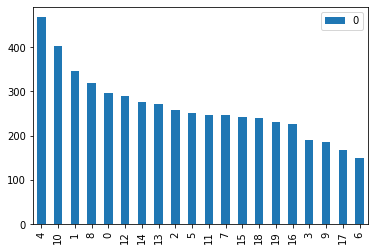

In [37]:
from collections import Counter

data = topic_number
count = Counter(data)
df = pd.DataFrame.from_dict(count, orient='index').sort_values(0, ascending=False)
df.plot(kind='bar')

In [33]:
# ctm.get_topic_lists(100)[0]

In [24]:
import pandas as pd
import numpy as np
sdgs = ['SDG1: No Poverty', 'SDG2: Zero Hunger', 'SDG3: Good Health & Wellbeing', 'SDG4: Quality Education', 'SDG5: Gender Equality Description', 'SDG6: Clean Water and Sanitation', 'SDG7: Affordable Clean Energy', 'SDG8: Decent Work and Economic Growth', 'SDG9: Industry Innovation and Infrastructure', 'SDG10: Reduced Inequalities', 'SDG11: Sustainable Cities and Communities', 'SDG12: Responsible Consumption and Production', 'SDG13: Climate Action', 'SDG14: Life Below Water', 'SDG15: Life on Land', 'SDG16: Peace, Justice & Strong Institutions', 'SDG17: Partnership for the Goals']
msci = [0.3976,0.481,0.587,0.5693,0.527,0.3915,0.3753,0.3069,0.3041,0.2906,0.5779,0.5976,0.3557,0.6295,0.7239,0.1766,0.4896]
rsam = [0.6541,0.508,0.5188,0.6893,0.4209,0.4032,0.5674,0.6336,0.4986,0.8113,0.4586,0.2306,0.4214,0.5437,0.4577,0.1934,None]
df = pd.DataFrame()
df["SDGs"] = sdgs
df["MSCI net alignment score (F1-micro)"] = msci
df["RSAM net alignment score (F1-micro)"] = rsam
df["diff"] = np.abs(df["MSCI net alignment score (F1-micro)"]-df["RSAM net alignment score (F1-micro)"])
df

SDGs  \
0                                SDG1: No Poverty   
1                               SDG2: Zero Hunger   
2                   SDG3: Good Health & Wellbeing   
3                         SDG4: Quality Education   
4               SDG5: Gender Equality Description   
5                SDG6: Clean Water and Sanitation   
6                   SDG7: Affordable Clean Energy   
7           SDG8: Decent Work and Economic Growth   
8    SDG9: Industry Innovation and Infrastructure   
9                     SDG10: Reduced Inequalities   
10      SDG11: Sustainable Cities and Communities   
11  SDG12: Responsible Consumption and Production   
12                          SDG13: Climate Action   
13                        SDG14: Life Below Water   
14                            SDG15: Life on Land   
15    SDG16: Peace, Justice & Strong Institutions   
16               SDG17: Partnership for the Goals   

    MSCI net alignment score (F1-micro)  RSAM net alignment score (F1-micro)  \
0                                0.3976                               0.6541   
1                                0.4810                               0.5080   
2                                0.5870                               0.5188   
3                                0.5693                               0.6893   
4                                0.5270                               0.4209   
5                                0.3915                               0.4032   
6                                0.3753                               0.5674   
7                                0.3069                               0.6336   
8                                0.3041                               0.4986   
9                                0.2906                               0.8113   
10                               0.5779                               0.4586   
11                               0.5976                               0.2306   
12                               0.3557                               0.4214   
13                               0.6295                               0.5437   
14                               0.7239                               0.4577   
15                               0.1766                               0.1934   
16                               0.4896                                  NaN   

      diff  
0   0.2565  
1   0.0270  
2   0.0682  
3   0.1200  
4   0.1061  
5   0.0117  
6   0.1921  
7   0.3267  
8   0.1945  
9   0.5207  
10  0.1193  
11  0.3670  
12  0.0657  
13  0.0858  
14  0.2662  
15  0.0168  
16     NaN

<AxesSubplot:xlabel='SDGs', ylabel='F1-micro'>

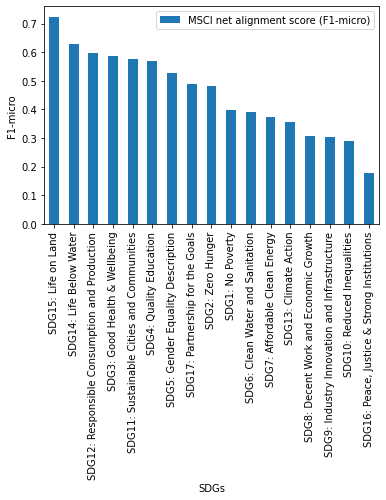

In [21]:
df[["SDGs","MSCI net alignment score (F1-micro)"]].sort_values(["MSCI net alignment score (F1-micro)"],ascending=False).plot.bar(x="SDGs",ylabel="F1-micro",xlabel="SDGs")

<AxesSubplot:xlabel='SDGs', ylabel='F1-micro'>

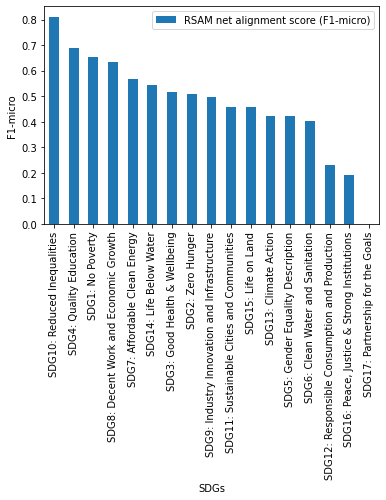

In [22]:
df[["SDGs","RSAM net alignment score (F1-micro)"]].sort_values(["RSAM net alignment score (F1-micro)"],ascending=False).plot.bar(x="SDGs",ylabel="F1-micro",xlabel="SDGs")

<AxesSubplot:xlabel='SDGs', ylabel='F1-micro'>

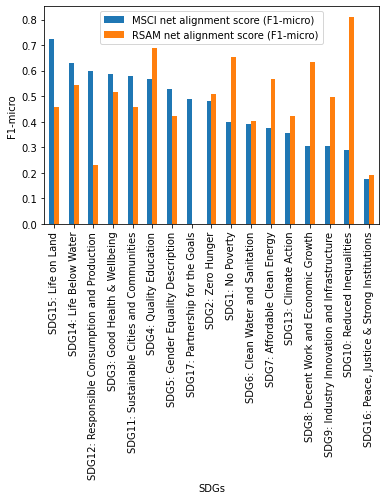

In [29]:
df.sort_values("MSCI net alignment score (F1-micro)",ascending=False)[["SDGs","MSCI net alignment score (F1-micro)","RSAM net alignment score (F1-micro)"]].plot.bar(x="SDGs",ylabel="F1-micro",xlabel="SDGs")

In [3]:
################################new section classification
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import nltk
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from nltk.corpus import wordnet
nltk.download('omw-1.4')
import numpy as np
from sklearn.model_selection import train_test_split

import pickle

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

import sys
measure = "f1_micro"

# import argparse
# parser = argparse.ArgumentParser()
# parser.add_argument("--n", help="SDG K")
# args = parser.parse_args()
#
# number = int(args.n)



def stem_sentences(x):
    tokenized_words = x.split(" ")
    tokenized_sentence = []
    for word in tokenized_words:
        if len(wordnet.synsets(word)) != 0:
            tokenized_sentence.append(porter.stem(word))
    tokenized_sentence = " ".join(tokenized_sentence)
    return tokenized_sentence

# creating bag of words representations from description
# Create a Bag of Words Model with Sklearn
# import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def get_BoW(df_wiki_node, column_name, param1=5, param2=.95):
    corpus = df_wiki_node[column_name]
    # sentence_1="*&^$This is a good job.{{I will not miss it for anything"
    # sentence_2="This is not good at all}}, hello my name misses a w"

#     CountVec = CountVectorizer(ngram_range=(1,2), # to use bigrams ngram_range=(2,2)
#                                stop_words='english')
    CountVec = CountVectorizer(min_df=param1,max_df=param2, ngram_range=(1, 2), stop_words='english')
    #transform
    Count_data = CountVec.fit_transform(corpus.values.tolist())

    #create dataframe
    BoW_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())
    # print(BoW_dataframe)
    return BoW_dataframe


# number = 1
all_scores_all_SDGs = []
# list(set(range(1,18))-set([13]))
for number in [13]:
    print("SDG ", number, " is calculating ...... ")
    msci = pd.read_csv("./data/msci.csv")
    msci2 = pd.read_csv("./data/msci2.csv")

    variable6 = "GICS Sector"

    if number >= 10:
        variable5 = "SDG_{}_PROD_ALIGNMENT".format(number)
    else:
        variable5 = "SDG_0{}_PROD_ALIGNMENT".format(number) # another thing

    SDG1 = msci[["Company Name", "Company ID"]].dropna()
    SDG2 = msci2[["ISSUER_NAME", "Figi", variable5]].dropna()

    df_label = SDG1.merge(SDG2, left_on="Company ID", right_on="Figi")[["Company Name", variable5]]
    df_label = df_label.rename(columns = {"Company Name": "company"})

    df_wiki = pd.read_csv("./temp_data/wiki/wiki_product_info.csv",sep="\t")
    df_wiki["product_info"] = df_wiki["product_info"].progress_apply(stem_sentences)
    df_merge = df_label.merge(df_wiki[["company","product_info"]],on="company").dropna()
    df_sector = pd.read_csv("./data/Fundamental.csv")[["Company Name",variable6]].rename(columns={"Company Name": "company"})
    df_merge2 = df_merge.merge(df_sector,on="company").dropna()
    df_entail = pd.read_csv("./temp_data/entail/entail_SDG_{}.csv".format(number),sep="\t")
    df_entail["report_evidence"] = df_entail.groupby("company")["statement"].transform(lambda x: ','.join(x))
    df_evidence = df_entail[["company","statement"]].drop_duplicates().rename(columns = {"statement":"report_evidence"})
    df_merge3 = df_merge2.merge(df_evidence,on="company",how="left")
    df_merge3["report_evidence"] = df_merge3["report_evidence"].fillna("nothing")
    df_merge3["stem_product_info"] = df_merge3["product_info"].progress_apply(stem_sentences)
    df_merge3["stem_report_evidence"] = df_merge3["report_evidence"].progress_apply(stem_sentences)


    labels = df_merge3[variable5].values
    features1 = pd.get_dummies(df_merge3[variable6])
    features2 = get_BoW(df_merge3, "stem_product_info", param1 = 10)
    features3 = get_BoW(df_merge3, "stem_report_evidence", param1 = 0)

    # if number == 13:
    #     features3 = get_BoW(df_merge3, "stem_report_evidence", param1 = 10, )
    # else:
    #     features3 = get_BoW(df_merge3, "stem_report_evidence", param1 = 5)
    print(features2.shape, features3.shape)
    if features2.shape[1] > 2000:
        features2 = get_BoW(df_merge3, "stem_product_info", param1 = 20)

    if features3.shape[1] > 2000:
        features3 = get_BoW(df_merge3, "stem_report_evidence", param1 = 10)

    print(features2.shape, features3.shape)
    all_scores = []
    ############################################# round 1
    print("round1")
    features = features1
    # features = features2
    # features = features3
    # features = np.concatenate((features1, features2),1)
    # features = np.concatenate((features1, features3),1)
    # features = np.concatenate((features2, features3),1)
    # features = np.concatenate((features1, features2, features3),1)

    X = features
    y = labels
    # define pipeline
    steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
    score = mean(scores)
    print('F1 Score: %.3f' % score)
    all_scores.append(score)

    ############################################# round 2
    print("round2")
    # features = features1
    features = features2
    # features = features3
    # features = np.concatenate((features1, features2),1)
    # features = np.concatenate((features1, features3),1)
    # features = np.concatenate((features2, features3),1)
    # features = np.concatenate((features1, features2, features3),1)

    X = features
    y = labels
    # define pipeline
    steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
    score = mean(scores)
    print('F1 Score: %.3f' % score)
    all_scores.append(score)

    ############################################# round 3
    print("round3")
    # features = features1
    # features = features2
    features = features3
    # features = np.concatenate((features1, features2),1)
    # features = np.concatenate((features1, features3),1)
    # features = np.concatenate((features2, features3),1)
    # features = np.concatenate((features1, features2, features3),1)

    X = features
    y = labels
    # define pipeline
    steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
    score = mean(scores)
    print('F1 Score: %.3f' % score)
    all_scores.append(score)

    ############################################# round 4
    print("round4")
    # features = features1
    # features = features2
    # features = features3
    features = np.concatenate((features1, features2),1)
    # features = np.concatenate((features1, features3),1)
    # features = np.concatenate((features2, features3),1)
    # features = np.concatenate((features1, features2, features3),1)

    X = features
    y = labels
    # define pipeline
    steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
    score = mean(scores)
    print('F1 Score: %.3f' % score)
    all_scores.append(score)

    ############################################# round 5
    print("round5")
    # features = features1
    # features = features2
    # features = features3
    # features = np.concatenate((features1, features2),1)
    features = np.concatenate((features1, features3),1)
    # features = np.concatenate((features2, features3),1)
    # features = np.concatenate((features1, features2, features3),1)

    X = features
    y = labels
    # define pipeline
    steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
    score = mean(scores)
    print('F1 Score: %.3f' % score)
    all_scores.append(score)

    ############################################# round 6
    print("round6")
    # features = features1
    # features = features2
    # features = features3
    # features = np.concatenate((features1, features2),1)
    # features = np.concatenate((features1, features3),1)
    features = np.concatenate((features2, features3),1)
    # features = np.concatenate((features1, features2, features3),1)

    X = features
    y = labels
    # define pipeline
    steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
    score = mean(scores)
    print('F1 Score: %.3f' % score)
    all_scores.append(score)

    ############################################# round 7
    print("round7")
    # features = features1
    # features = features2
    # features = features3
    # features = np.concatenate((features1, features2),1)
    # features = np.concatenate((features1, features3),1)
    # features = np.concatenate((features2, features3),1)
    features = np.concatenate((features1, features2, features3),1)

    X = features
    y = labels
    # define pipeline
    steps = [('over', RandomOverSampler()), ('model', BalancedRandomForestClassifier())]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring=measure, cv=cv, n_jobs=-1)
    score = mean(scores)
    print('F1 Score: %.3f' % score)
    all_scores.append(score)


    all_scores_all_SDGs.append(all_scores)



# with open('./results/product/{}.pkl'.format(measure),'wb') as f:
#     pickle.dump(all_scores_all_SDGs, f, protocol=pickle.HIGHEST_PROTOCOL)

# import pickle
# with open("./data/embeddings_all1.pkl", "rb") as input_file:
#     e1 = pickle.load(input_file)


In [6]:
from sklearn.base import clone
import numpy as np
# Source:
# 1. https://stackoverflow.com/questions/66486947/how-to-use-ordinal-classifier
# 2. https://towardsdatascience.com/simple-trick-to-train-an-ordinal-regression-with-any-classifier-6911183d2a3c


class OrdinalClassifier():

    def __init__(self, clf):
        self.clf = clf
        self.clfs = {}

    def fit(self, X, y):
        self.unique_class = np.sort(np.unique(y))
        if self.unique_class.shape[0] > 2:
            for i in range(self.unique_class.shape[0] - 1):
                # for each k - 1 ordinal value we fit a binary classification problem
                binary_y = (y > self.unique_class[i]).astype(np.uint8)
                clf = clone(self.clf)
                clf.fit(X, binary_y)
                self.clfs[i] = clf

    def predict_proba(self, X):
        clfs_predict = {k: v.predict_proba(X) for k, v in self.clfs.items()}
        predicted = []
        for i, y in enumerate(self.unique_class):
            if i == 0:
                # V1 = 1 - Pr(y > V1)
                predicted.append(1 - clfs_predict[i][:, 1])
            elif y in clfs_predict:
                # Vi = Pr(y > Vi-1) - Pr(y > Vi)
                predicted.append(clfs_predict[i - 1][:, 1] - clfs_predict[i][:, 1])
            else:
                # Vk = Pr(y > Vk-1)
                predicted.append(clfs_predict[i - 1][:, 1])
        return np.vstack(predicted).T

    def predict(self, X):
        return self.unique_class[np.argmax(self.predict_proba(X), axis=1)]

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import mord
features = features1
# features = features2
# features = features3
# features = np.concatenate((features1, features2),1)
# features = np.concatenate((features1, features3),1)
# features = np.concatenate((features2, features3),1)
# features = np.concatenate((features1, features2, features3),1)

X = features
y = labels

knn = KNeighborsClassifier()
oc = OrdinalClassifier(knn)
oc.fit(X, y)
pred = oc.predict(X)
from sklearn.metrics import f1_score
f1_score(y, pred, average='micro')

0.031007751937984496

In [11]:
pred

array(['Misaligned', 'Misaligned', 'Misaligned', ..., 'Misaligned',
       'Misaligned', 'Misaligned'], dtype=object)

In [12]:
import pandas as pd
df_graph = pd.read_csv("./wiki_data/wiki_graph_data_2hop.csv")
df_graph

Unnamed: 0 property wikidata_id_start wikidata_id_end
0                0      P17          Q1614044             Q55
1                1     P131          Q1614044           Q9924
2                2      P31          Q1614044        Q1852859
3                3      P31          Q1614044         Q338313
4                4     P421          Q1614044           Q6655
...            ...      ...               ...             ...
180835       28607      P31          Q3674725         Q891723
180836       28608     P159          Q3674725           Q8646
180837       28609     P414          Q3674725         Q496672
180838       28610     P452          Q3674725          Q11469
180839       28611     P112          Q3674725       Q11098046

[180840 rows x 4 columns]

In [13]:
df_graph[df_graph.wikidata_id_start == "Q1022921"]

Unnamed: 0 property wikidata_id_start wikidata_id_end
156797        4569      P31          Q1022921         Q891723
156798        4570     P159          Q1022921           Q1741
156799        4571    P1454          Q1022921         Q875765
156800        4572     P452          Q1022921        Q1660132
156801        4573      P17          Q1022921             Q40
156802        4574    P1056          Q1022921         Q684740